# **Código de Analisis exploratorio 1 - Proyecto de Grado 2025-1**
## **Identificación de contratos públicos sujetos a adiciones en el sector de la salud con modelos de machine learning**

### **Elaborado por:**  
#### Marco Antonio Cruz y Paula Andrea Ovalle
m.cruzg@uniandes.edu.co-202020941 y P.ovallev@uniandes.edu.co-202021735



## Librerias y carga csv

In [121]:
import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import LabelEncoder
#from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [122]:
#### Activar segun quien trabaje 
#Marco
Filepath = "C:/Users/user/OneDrive/Documentos/semestres uniandes/Clases 2025-1/Tesis IIND/Solo sector salud/base con categorias reducidas2.csv"
#Paula
#Filepath= "C:/Users/paula/OneDrive/Documentos/10 Semestre/Tesis/base con categorias reducidas.csv"
df=pd.read_csv(Filepath)
df

nombre entidad  nit entidad  \
0       SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...    900971006   
1       SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...    900959048   
2                                                    Otra   9013620904   
3                                                    Otra    822006595   
4       SUBRED INTEGRADA DE SERVICIO DE SALUD CENTRO O...    900959051   
...                                                   ...          ...   
487207                                               Otra   8440041972   
487208  SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...    900959048   
487209                                               Otra    899999239   
487210  SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...    900959048   
487211  SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...    900959048   

                      departamento         ciudad        orden  \
0       Distrito Capital de Bogotá         Bogotá  Territorial   
1       Distrito Capital de Bogotá         Bogotá  Territorial   
2                        Atlántico        Soledad  Territorial   
3                             Meta  Villavicencio  Territorial   
4       Distrito Capital de Bogotá         Bogotá  Territorial   
...                            ...            ...          ...   
487207                    Casanare          Yopal  Territorial   
487208  Distrito Capital de Bogotá         Bogotá  Territorial   
487209                      Nariño    No Definido     Nacional   
487210  Distrito Capital de Bogotá         Bogotá  Territorial   
487211  Distrito Capital de Bogotá         Bogotá  Territorial   

                        rama entidad centralizada estado contrato  \
0       Corporación Autónoma      Descentralizada      Modificado   
1                  Ejecutivo      Descentralizada      Modificado   
2                  Ejecutivo      Descentralizada      Modificado   
3                  Ejecutivo         Centralizada    En ejecución   
4                  Ejecutivo      Descentralizada    En ejecución   
...                      ...                  ...             ...   
487207             Ejecutivo      Descentralizada    En ejecución   
487208             Ejecutivo      Descentralizada      Modificado   
487209             Ejecutivo         Centralizada    En ejecución   
487210             Ejecutivo      Descentralizada    En ejecución   
487211             Ejecutivo      Descentralizada       terminado   

       codigo de categoria principal         tipo de contrato  ... adjudicado  \
0                        V1.85101600      Decreto 092 de 2017  ...         No   
1                        V1.85101604  Prestación de servicios  ...         No   
2                               Otra  Prestación de servicios  ...         Si   
3                        V1.85101600  Prestación de servicios  ...         No   
4                        V1.80111600  Prestación de servicios  ...         No   
...                              ...                      ...  ...        ...   
487207                   V1.80111701  Prestación de servicios  ...         No   
487208                   V1.80111600  Prestación de servicios  ...         No   
487209                   V1.80111600  Prestación de servicios  ...         No   
487210                   V1.85101604  Prestación de servicios  ...         No   
487211                   V1.80111600  Prestación de servicios  ...         No   

       id adjudicacion      departamento proveedor ciudad proveedor  \
0        No Adjudicado  Distrito Capital de Bogotá           Bogotá   
1        No Adjudicado  Distrito Capital de Bogotá      No Definido   
2                 Otra                   Atlántico     Barranquilla   
3        No Adjudicado                        Meta             Otra   
4        No Adjudicado  Distrito Capital de Bogotá           Bogotá   
...                ...                         ...              ...   
487207   No Adjudicado                    Casanare            

In [123]:
print(list(df.columns))

['nombre entidad', 'nit entidad', 'departamento', 'ciudad', 'orden', 'rama', 'entidad centralizada', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerdo', 'nombre representante legal', 'nacionalidad representante legal', 'presupuesto general de la nacion – pgn', 'sistema general de participaciones', 'sistema general de regalías', 're

In [124]:
df["ciudad"].value_counts()

ciudad
Bogotá             221006
Bogotá_Nacional     29042
No Definido         28156
Cali                23715
Santa Marta         15907
                    ...  
Malambo                59
Alejandría             51
Victoria               50
Socha                  49
Pamplona               49
Name: count, Length: 169, dtype: int64

### Analisis exploratorio entender variables

Variable nombre entidad

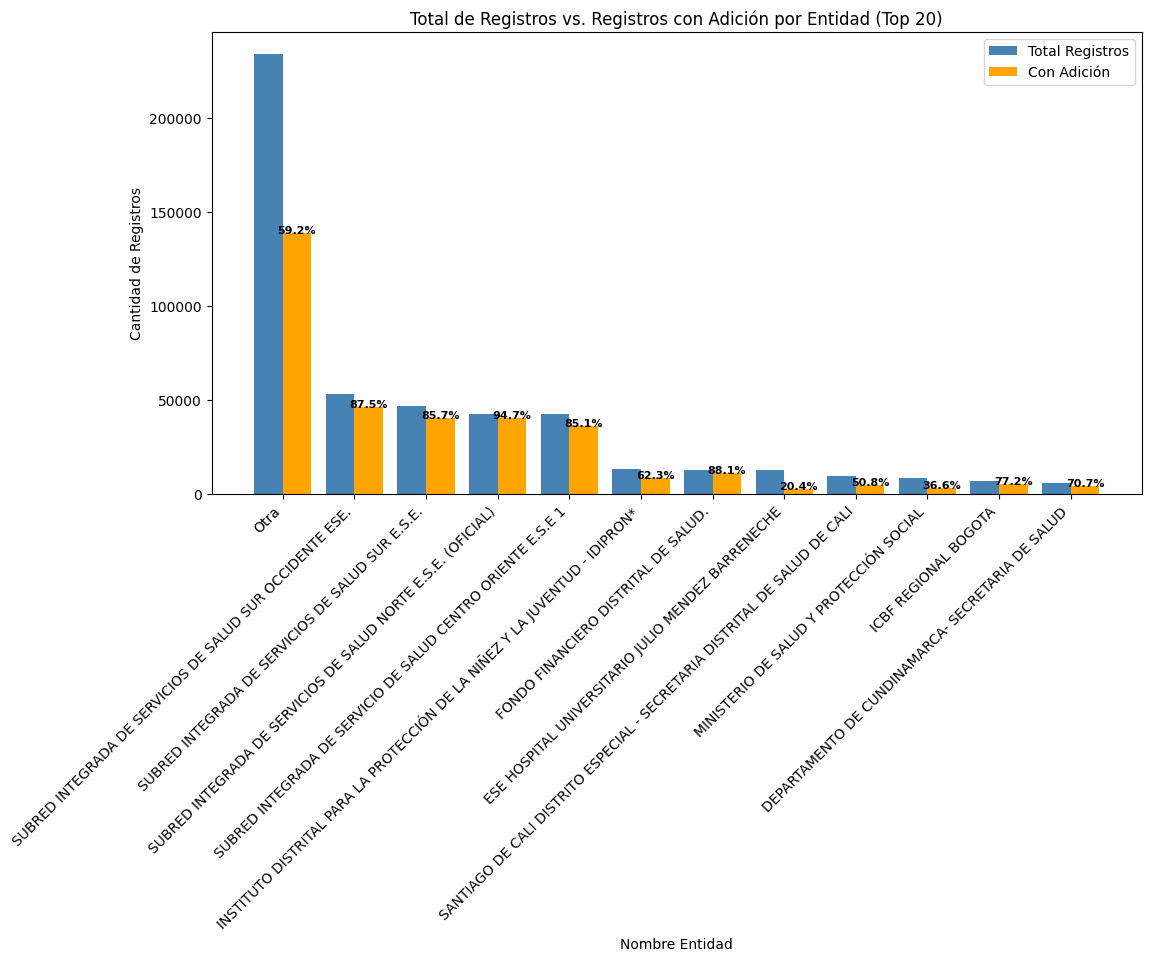

In [125]:

# Contar total de registros por entidad
total_por_entidad = df['nombre entidad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_entidad = df[df['Adicion'] == 1]['nombre entidad'].value_counts()

# Unir ambas series en un DataFrame
df_entidades = pd.DataFrame({'Total Registros': total_por_entidad, 'Con Adición': adicion_por_entidad}).fillna(0)

# Calcular el porcentaje de adición
df_entidades["% Adición"] = (df_entidades["Con Adición"] / df_entidades["Total Registros"]) * 100

# Seleccionar las 20 entidades con más registros
top_entidades = df_entidades.nlargest(20, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_entidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_entidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_entidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_entidades["% Adición"]):
    ax.text(x[i] + width/2, top_entidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=8, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_entidades.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Entidad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad (Top 20)")
ax.legend()

# Mostrar la gráfica
plt.show()



Variable departamento

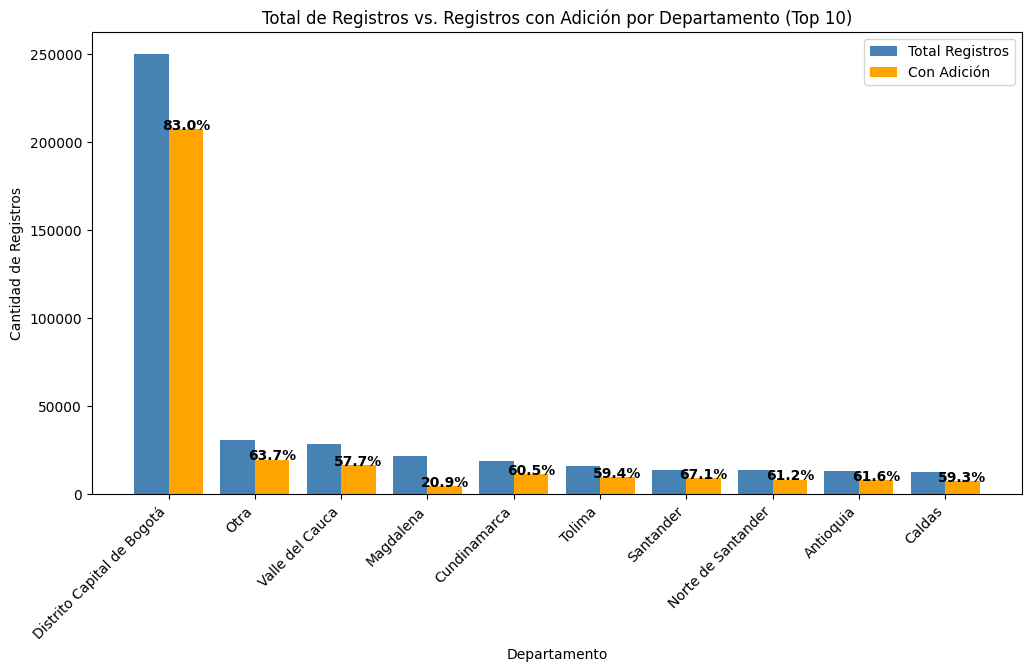

In [126]:


# Contar total de registros por departamento
total_por_departamento = df['departamento'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_departamento = df[df['Adicion'] == 1]['departamento'].value_counts()

# Unir ambas series en un DataFrame
df_departamentos = pd.DataFrame({'Total Registros': total_por_departamento, 'Con Adición': adicion_por_departamento}).fillna(0)

# Calcular el porcentaje de adición
df_departamentos["% Adición"] = (df_departamentos["Con Adición"] / df_departamentos["Total Registros"]) * 100

# Seleccionar los 10 departamentos con más registros
top_departamentos = df_departamentos.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_departamentos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_departamentos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_departamentos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_departamentos["% Adición"]):
    ax.text(x[i] + width/2, top_departamentos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_departamentos.index, rotation=45, ha="right")
ax.set_xlabel("Departamento")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Departamento (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable ciudad

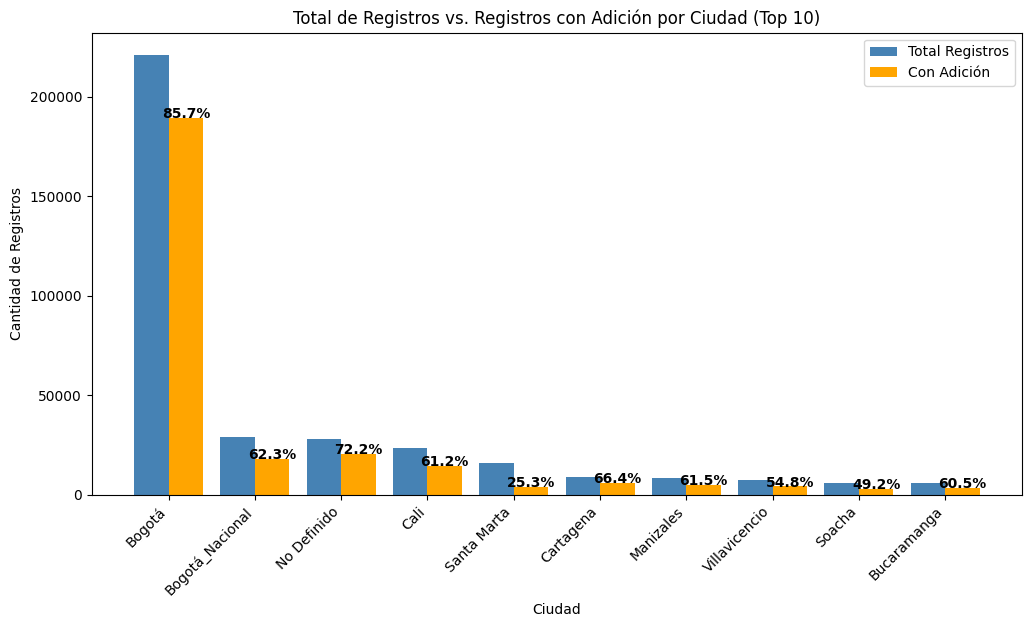

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por ciudad
total_por_ciudad = df['ciudad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ciudad = df[df['Adicion'] == 1]['ciudad'].value_counts()

# Unir ambas series en un DataFrame
df_ciudades = pd.DataFrame({'Total Registros': total_por_ciudad, 'Con Adición': adicion_por_ciudad}).fillna(0)

# Calcular el porcentaje de adición
df_ciudades["% Adición"] = (df_ciudades["Con Adición"] / df_ciudades["Total Registros"]) * 100

# Seleccionar las 10 ciudades con más registros
top_ciudades = df_ciudades.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ciudades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ciudades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ciudades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ciudades["% Adición"]):
    ax.text(x[i] + width/2, top_ciudades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ciudades.index, rotation=45, ha="right")
ax.set_xlabel("Ciudad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Ciudad (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable orden

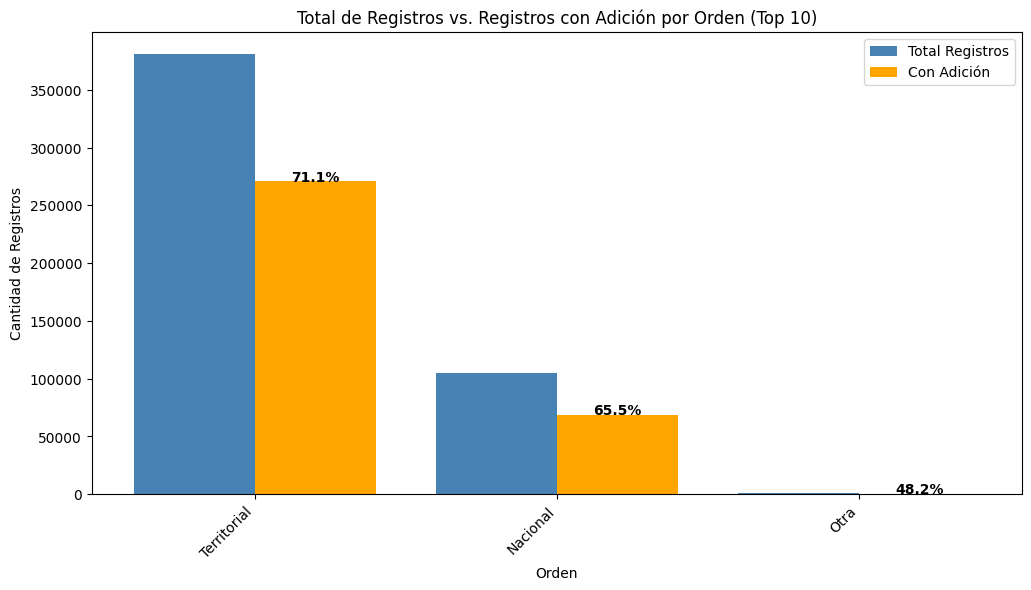

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por orden
total_por_orden = df['orden'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_orden = df[df['Adicion'] == 1]['orden'].value_counts()

# Unir ambas series en un DataFrame
df_orden = pd.DataFrame({'Total Registros': total_por_orden, 'Con Adición': adicion_por_orden}).fillna(0)

# Calcular el porcentaje de adición
df_orden["% Adición"] = (df_orden["Con Adición"] / df_orden["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_orden = df_orden.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_orden))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_orden['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_orden['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_orden["% Adición"]):
    ax.text(x[i] + width/2, top_orden["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_orden.index, rotation=45, ha="right")
ax.set_xlabel("Orden")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Orden (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable rama

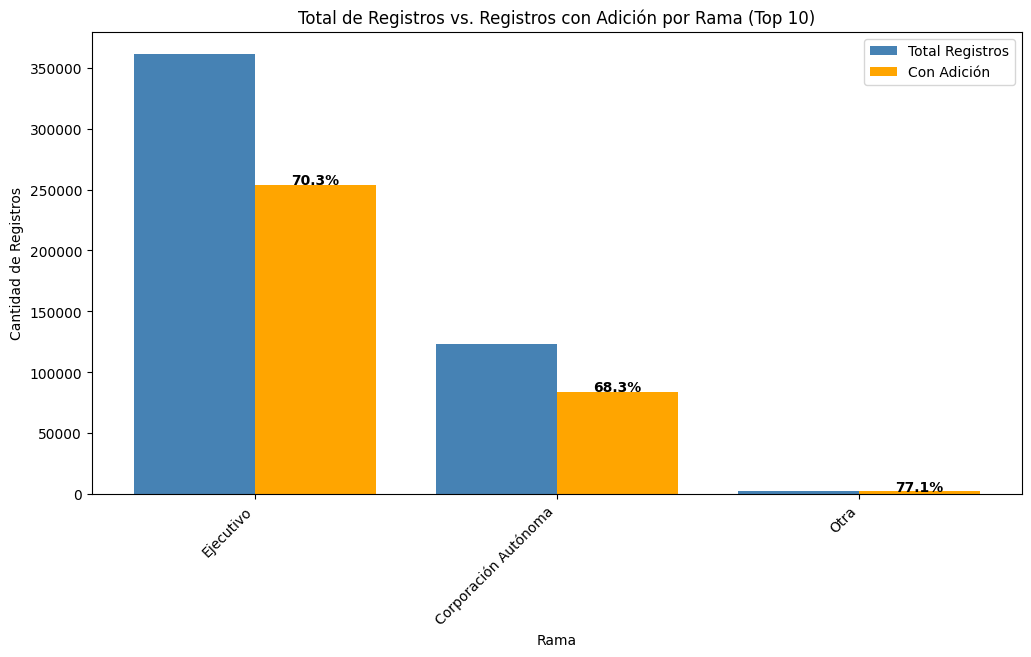

In [129]:

# Contar total de registros por rama
total_por_rama = df['rama'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_rama = df[df['Adicion'] == 1]['rama'].value_counts()

# Unir ambas series en un DataFrame
df_rama = pd.DataFrame({'Total Registros': total_por_rama, 'Con Adición': adicion_por_rama}).fillna(0)

# Calcular el porcentaje de adición
df_rama["% Adición"] = (df_rama["Con Adición"] / df_rama["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_ramas = df_rama.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ramas))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ramas['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ramas['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ramas["% Adición"]):
    ax.text(x[i] + width/2, top_ramas["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ramas.index, rotation=45, ha="right")
ax.set_xlabel("Rama")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Rama (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable entidad centralizada

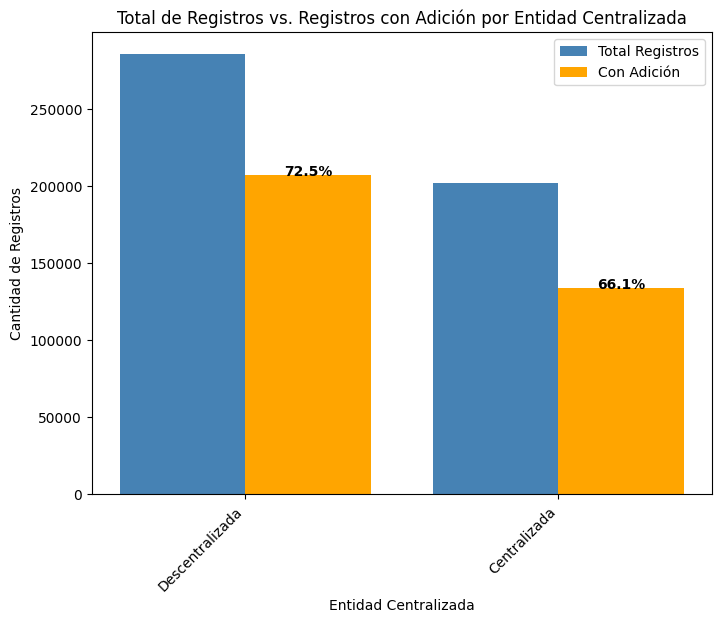

In [130]:
# Contar total de registros por entidad centralizada
total_por_centralizada = df['entidad centralizada'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_centralizada = df[df['Adicion'] == 1]['entidad centralizada'].value_counts()

# Unir ambas series en un DataFrame
df_centralizada = pd.DataFrame({'Total Registros': total_por_centralizada, 'Con Adición': adicion_por_centralizada}).fillna(0)

# Calcular el porcentaje de adición
df_centralizada["% Adición"] = (df_centralizada["Con Adición"] / df_centralizada["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_centralizada))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_centralizada['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_centralizada['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_centralizada["% Adición"]):
    ax.text(x[i] + width/2, df_centralizada["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_centralizada.index, rotation=45, ha="right")
ax.set_xlabel("Entidad Centralizada")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad Centralizada")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable estado contrato

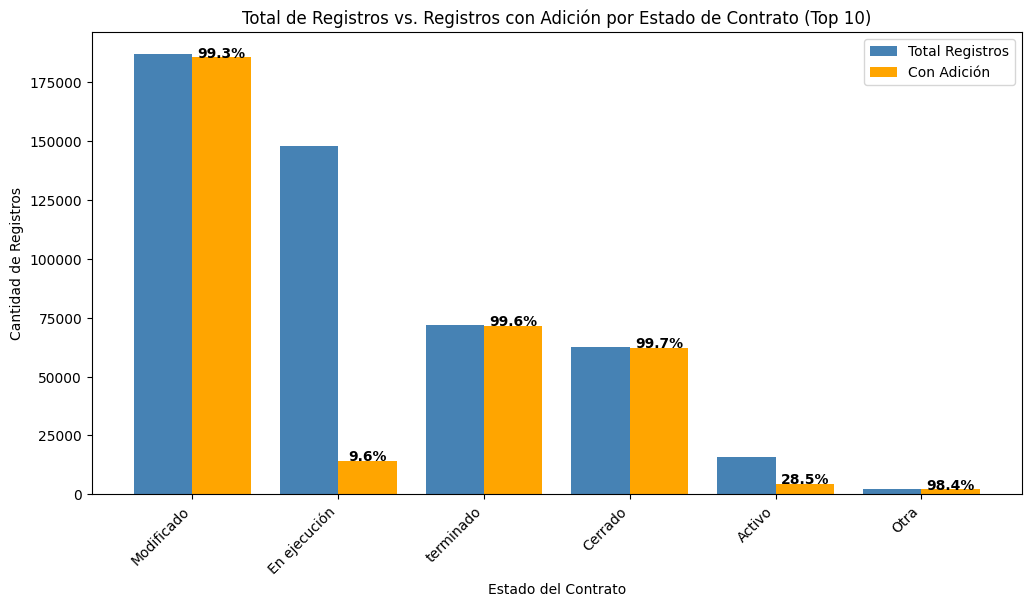

In [131]:
# Contar total de registros por estado contrato
total_por_estado = df['estado contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_estado = df[df['Adicion'] == 1]['estado contrato'].value_counts()

# Unir ambas series en un DataFrame
df_estado = pd.DataFrame({'Total Registros': total_por_estado, 'Con Adición': adicion_por_estado}).fillna(0)

# Calcular el porcentaje de adición
df_estado["% Adición"] = (df_estado["Con Adición"] / df_estado["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_estados = df_estado.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_estados))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_estados['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_estados['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_estados["% Adición"]):
    ax.text(x[i] + width/2, top_estados["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_estados.index, rotation=45, ha="right")
ax.set_xlabel("Estado del Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Estado de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable codigo de categoria principal

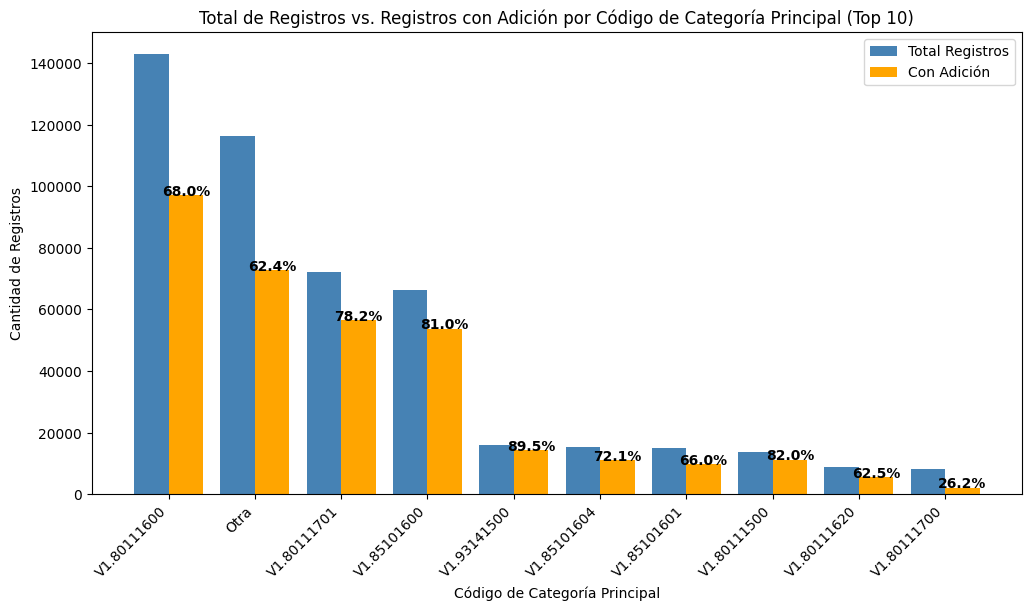

In [132]:
# Contar total de registros por código de categoría principal
total_por_categoria = df['codigo de categoria principal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_categoria = df[df['Adicion'] == 1]['codigo de categoria principal'].value_counts()

# Unir ambas series en un DataFrame
df_categoria = pd.DataFrame({'Total Registros': total_por_categoria, 'Con Adición': adicion_por_categoria}).fillna(0)

# Calcular el porcentaje de adición
df_categoria["% Adición"] = (df_categoria["Con Adición"] / df_categoria["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_categorias = df_categoria.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_categorias))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_categorias['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_categorias['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_categorias["% Adición"]):
    ax.text(x[i] + width/2, top_categorias["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_categorias.index, rotation=45, ha="right")
ax.set_xlabel("Código de Categoría Principal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Código de Categoría Principal (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable tipo de contrato

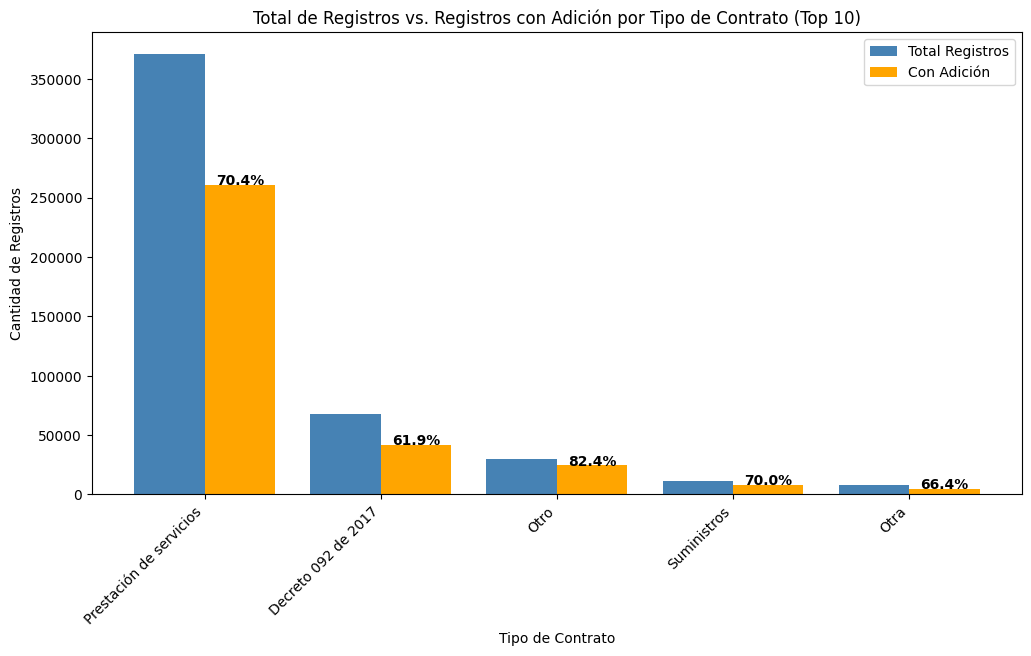

In [133]:
# Contar total de registros por tipo de contrato
total_por_tipo = df['tipo de contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_tipo = df[df['Adicion'] == 1]['tipo de contrato'].value_counts()

# Unir ambas series en un DataFrame
df_tipo_contrato = pd.DataFrame({'Total Registros': total_por_tipo, 'Con Adición': adicion_por_tipo}).fillna(0)

# Calcular el porcentaje de adición
df_tipo_contrato["% Adición"] = (df_tipo_contrato["Con Adición"] / df_tipo_contrato["Total Registros"]) * 100

# Seleccionar los 10 tipos de contrato con más registros
top_tipos = df_tipo_contrato.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_tipos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_tipos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_tipos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_tipos["% Adición"]):
    ax.text(x[i] + width/2, top_tipos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_tipos.index, rotation=45, ha="right")
ax.set_xlabel("Tipo de Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Tipo de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable modalidad de contratacion

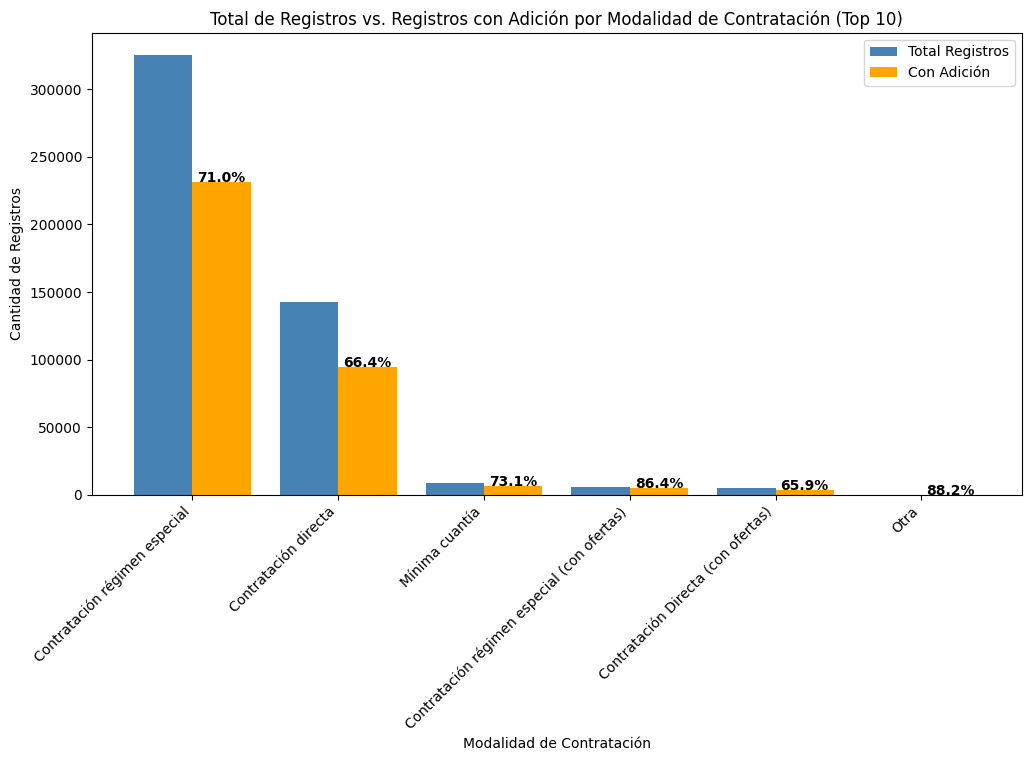

In [134]:
# Contar total de registros por modalidad de contratación
total_por_modalidad = df['modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_modalidad = df[df['Adicion'] == 1]['modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_modalidad = pd.DataFrame({'Total Registros': total_por_modalidad, 'Con Adición': adicion_por_modalidad}).fillna(0)

# Calcular el porcentaje de adición
df_modalidad["% Adición"] = (df_modalidad["Con Adición"] / df_modalidad["Total Registros"]) * 100

# Seleccionar las 10 modalidades con más registros
top_modalidades = df_modalidad.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_modalidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_modalidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_modalidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_modalidades["% Adición"]):
    ax.text(x[i] + width/2, top_modalidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_modalidades.index, rotation=45, ha="right")
ax.set_xlabel("Modalidad de Contratación")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Modalidad de Contratación (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable justificacion modalidad de contratacion

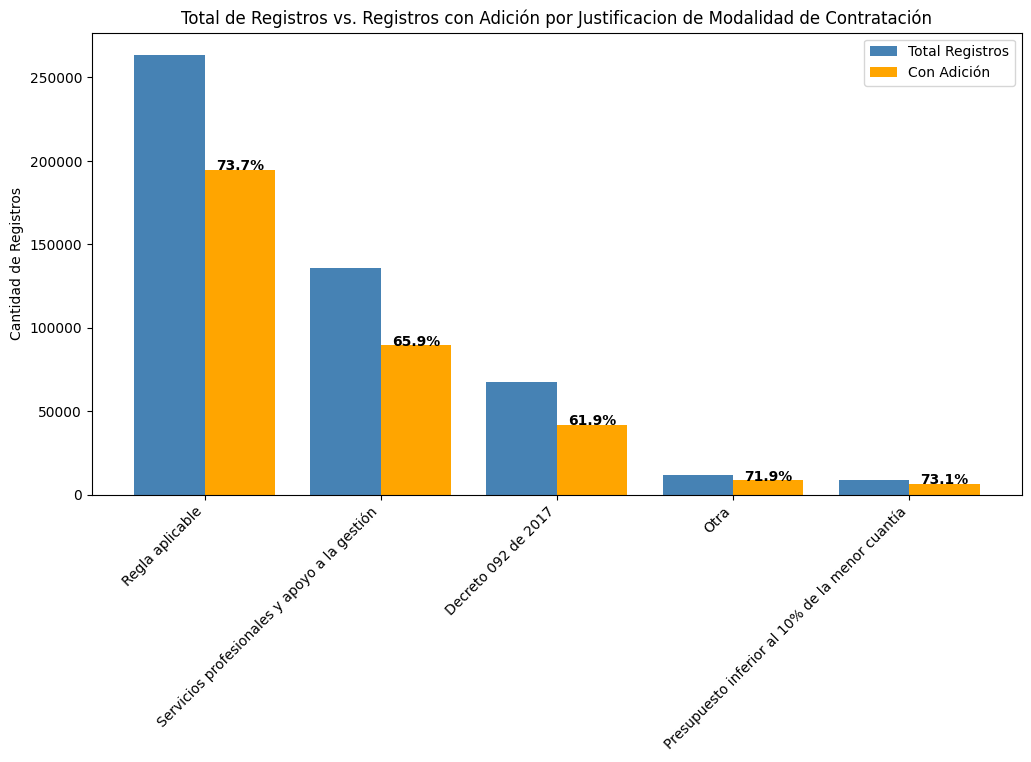

In [135]:
# Contar total de registros por modalidad de justificacion
total_por_justificacion= df['justificacion modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_justificacion = df[df['Adicion'] == 1]['justificacion modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_justificacion = pd.DataFrame({'Total Registros': total_por_justificacion, 'Con Adición': adicion_por_justificacion}).fillna(0)

# Calcular el porcentaje de adición
df_justificacion["% Adición"] = (df_justificacion["Con Adición"] / df_justificacion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_justificacion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_justificacion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_justificacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_justificacion["% Adición"]):
    ax.text(x[i] + width/2, df_justificacion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_justificacion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Justificacion de Modalidad de Contratación")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable condiciones de entrega

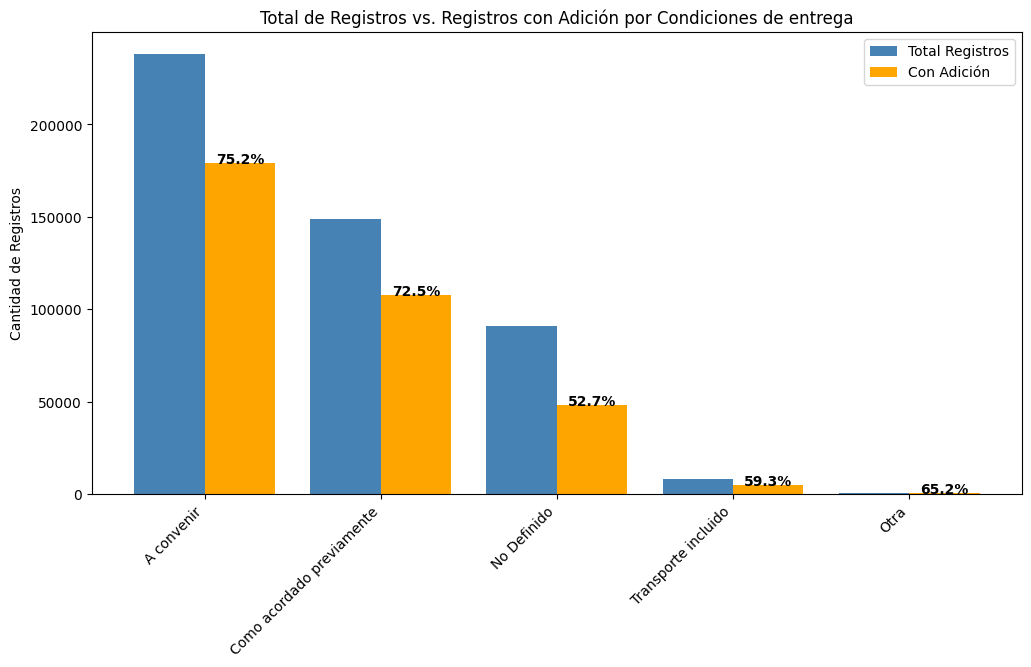

In [136]:
#Contar total de registros por condiciones de entrega
total_por_entrega = df['condiciones de entrega'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_entrega= df[df['Adicion'] == 1]['condiciones de entrega'].value_counts()

# Unir ambas series en un DataFrame
df_entrega = pd.DataFrame({'Total Registros': total_por_entrega, 'Con Adición': adicion_por_entrega}).fillna(0)

# Calcular el porcentaje de adición
df_entrega["% Adición"] = (df_entrega["Con Adición"] / df_entrega["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_entrega))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_entrega['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_entrega['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_entrega["% Adición"]):
    ax.text(x[i] + width/2, df_entrega["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_entrega.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Condiciones de entrega")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable es grupo- se debe eliminar

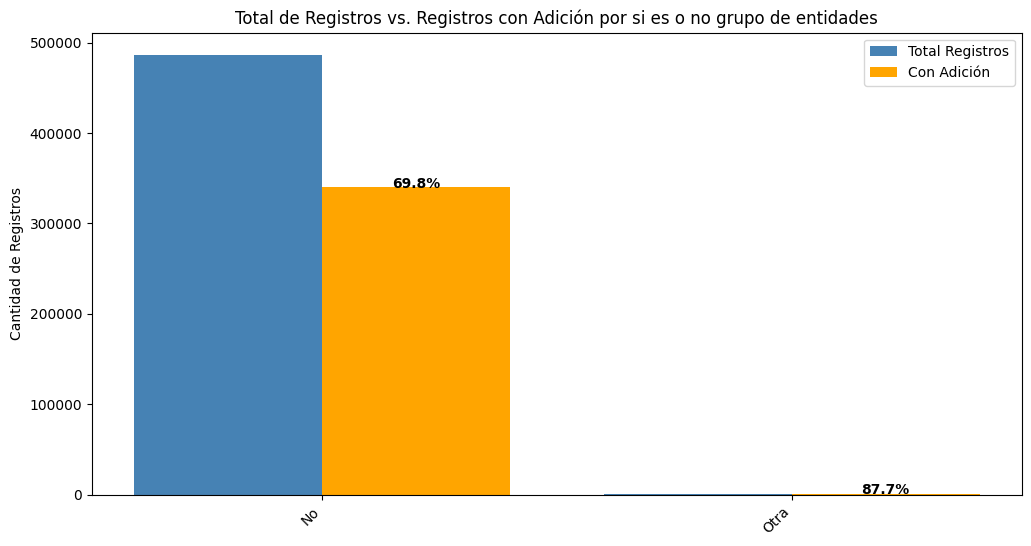

In [137]:
# Contar total de registros por si es o no grupo
total_por_grupo = df['es grupo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_grupo = df[df['Adicion'] == 1]['es grupo'].value_counts()

# Unir ambas series en un DataFrame
df_grupo = pd.DataFrame({'Total Registros': total_por_grupo, 'Con Adición': adicion_por_grupo}).fillna(0)

# Calcular el porcentaje de adición
df_grupo["% Adición"] = (df_grupo["Con Adición"] / df_grupo["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_grupo))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_grupo['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_grupo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_grupo["% Adición"]):
    ax.text(x[i] + width/2, df_grupo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_grupo.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si es o no grupo de entidades")
ax.legend()

# Mostrar la gráfica
plt.show()


In [138]:
df=df.drop("es grupo", axis=1)

Variable es pyme

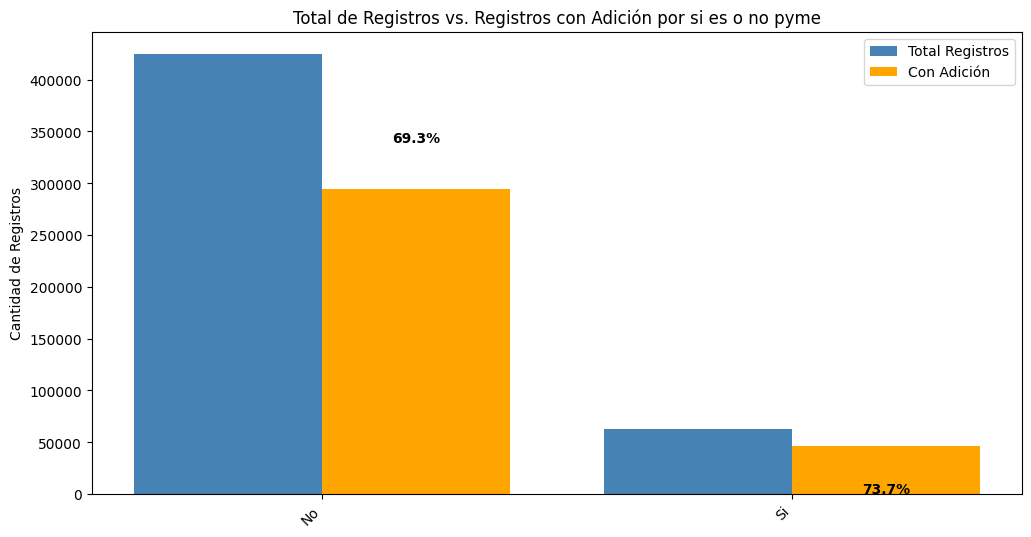

In [139]:


# Contar total de registros por si es o no pymes
total_por_pyme = df['es pyme'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_pyme = df[df['Adicion'] == 1]['es pyme'].value_counts()

# Unir ambas series en un DataFrame
df_pyme = pd.DataFrame({'Total Registros': total_por_pyme, 'Con Adición': adicion_por_pyme}).fillna(0)

# Calcular el porcentaje de adición
df_pyme["% Adición"] = (df_pyme["Con Adición"] / df_pyme["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_pyme))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_pyme['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_pyme['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_pyme["% Adición"]):
    ax.text(x[i] + width/2, df_grupo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_pyme.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si es o no pyme")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable liquidación

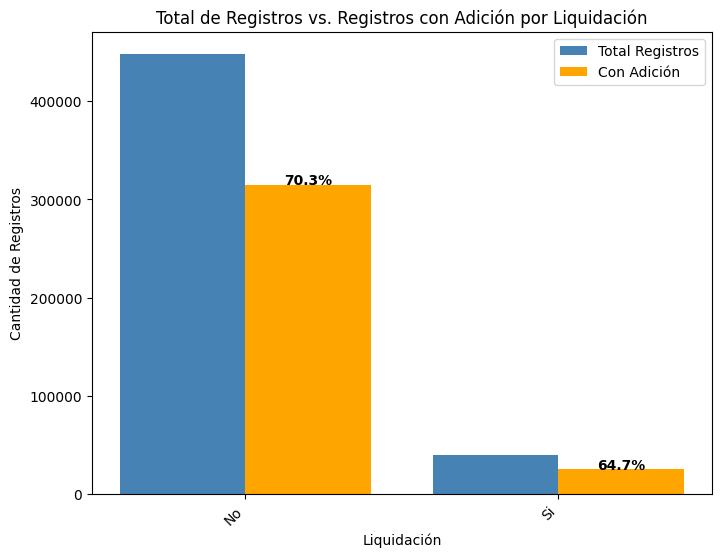

In [140]:
# Contar total de registros por liquidación
total_por_liquidacion = df['liquidación'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_liquidacion = df[df['Adicion'] == 1]['liquidación'].value_counts()

# Unir ambas series en un DataFrame
df_liquidacion = pd.DataFrame({'Total Registros': total_por_liquidacion, 'Con Adición': adicion_por_liquidacion}).fillna(0)

# Calcular el porcentaje de adición
df_liquidacion["% Adición"] = (df_liquidacion["Con Adición"] / df_liquidacion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_liquidacion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_liquidacion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_liquidacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_liquidacion["% Adición"]):
    ax.text(x[i] + width/2, df_liquidacion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_liquidacion.index, rotation=45, ha="right")
ax.set_xlabel("Liquidación")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Liquidación")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable obligación ambiental- se debe eliminar

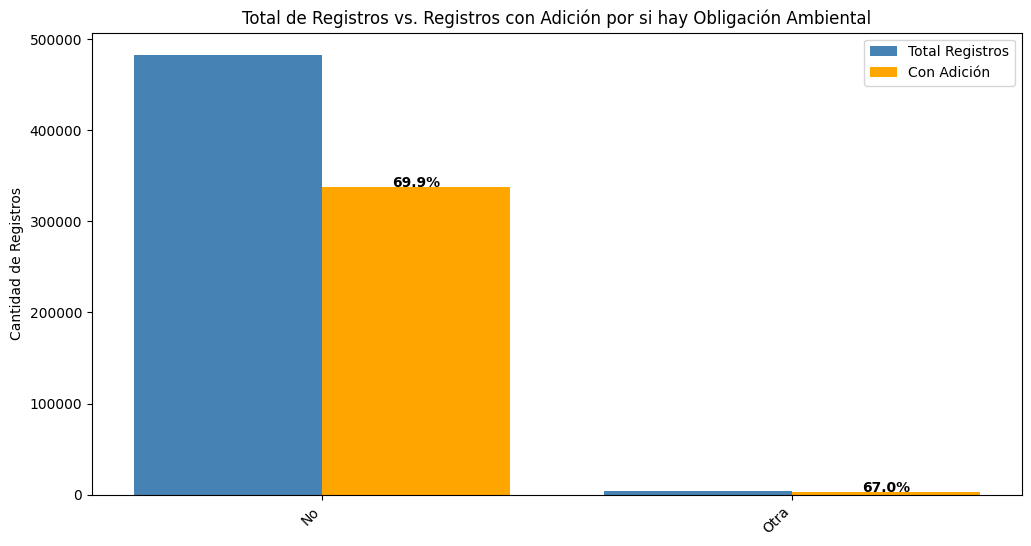

In [141]:
#Contar total de registros por si hay obligacion ambiental
total_por_obambiental = df['obligación ambiental'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_obambiental = df[df['Adicion'] == 1]['obligación ambiental'].value_counts()

# Unir ambas series en un DataFrame
df_obambiental = pd.DataFrame({'Total Registros': total_por_obambiental, 'Con Adición': adicion_por_obambiental}).fillna(0)

# Calcular el porcentaje de adición
df_obambiental["% Adición"] = (df_obambiental["Con Adición"] / df_obambiental["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_obambiental))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_obambiental['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_obambiental['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_obambiental["% Adición"]):
    ax.text(x[i] + width/2, df_obambiental["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_obambiental.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si hay Obligación Ambiental")
ax.legend()

# Mostrar la gráfica
plt.show()

In [142]:
df=df.drop("obligación ambiental", axis=1)


Variable obligaciones postconsumo- se debe eliminar

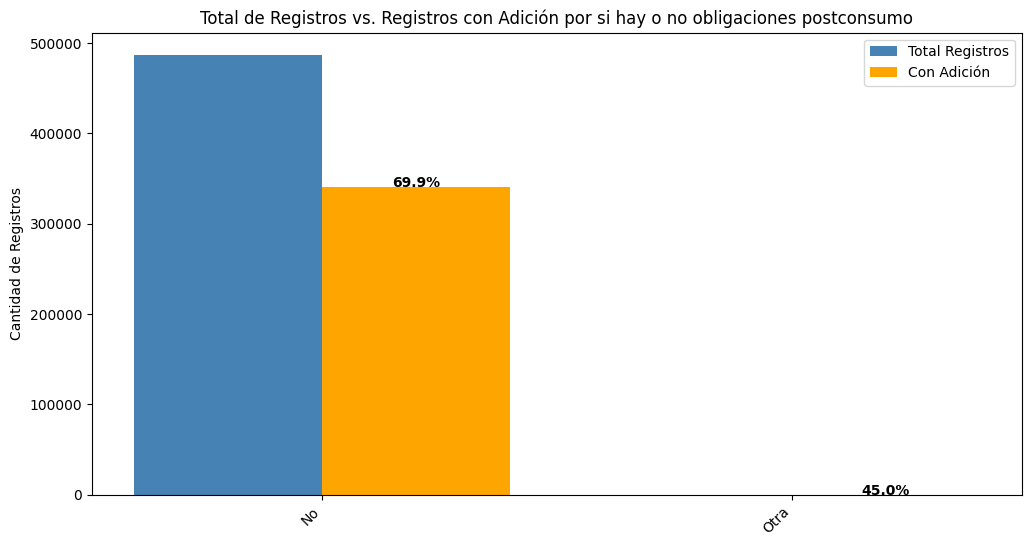

In [143]:
#Contar total de registros por si hay obligaciones postconsumo
total_por_postconsumo = df['obligaciones postconsumo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_postconsumo = df[df['Adicion'] == 1]['obligaciones postconsumo'].value_counts()

# Unir ambas series en un DataFrame
df_postconsumo = pd.DataFrame({'Total Registros': total_por_postconsumo, 'Con Adición': adicion_por_postconsumo}).fillna(0)

# Calcular el porcentaje de adición
df_postconsumo["% Adición"] = (df_postconsumo["Con Adición"] / df_postconsumo["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_postconsumo))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_postconsumo['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_postconsumo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_postconsumo["% Adición"]):
    ax.text(x[i] + width/2, df_postconsumo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_postconsumo.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si hay o no obligaciones postconsumo")
ax.legend()

# Mostrar la gráfica
plt.show()

In [144]:
df=df.drop("obligaciones postconsumo", axis=1)

Variable reversion- se debe eliminar

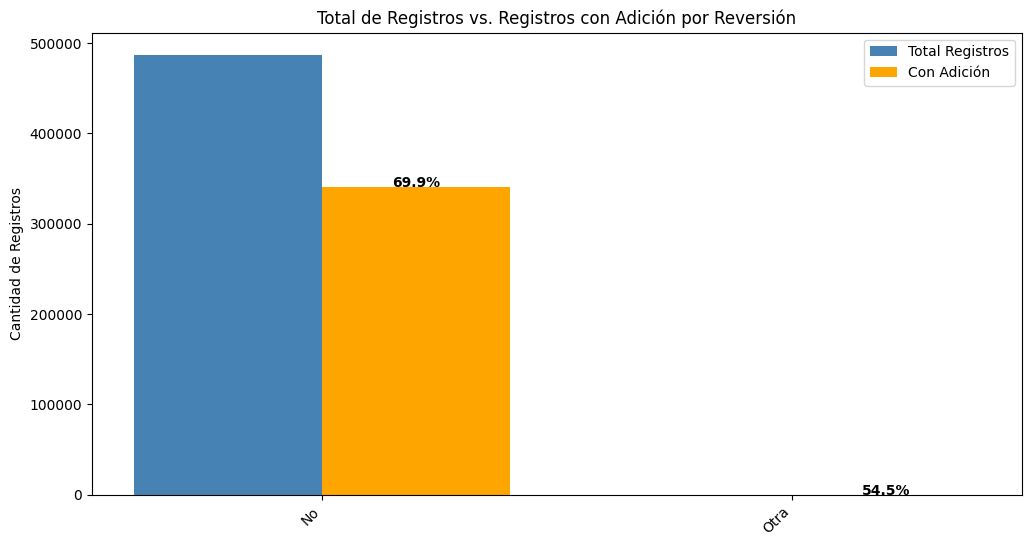

In [145]:
#Contar total de registros por reversion
total_por_reversion = df['reversion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_reversion= df[df['Adicion'] == 1]['reversion'].value_counts()

# Unir ambas series en un DataFrame
df_reversion = pd.DataFrame({'Total Registros': total_por_reversion, 'Con Adición': adicion_por_reversion}).fillna(0)

# Calcular el porcentaje de adición
df_reversion["% Adición"] = (df_reversion["Con Adición"] / df_reversion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_reversion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_reversion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_reversion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_reversion["% Adición"]):
    ax.text(x[i] + width/2, df_reversion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_reversion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Reversión")
ax.legend()

# Mostrar la gráfica
plt.show()

In [146]:
df=df.drop("reversion", axis=1)

Variable origen de los recursos

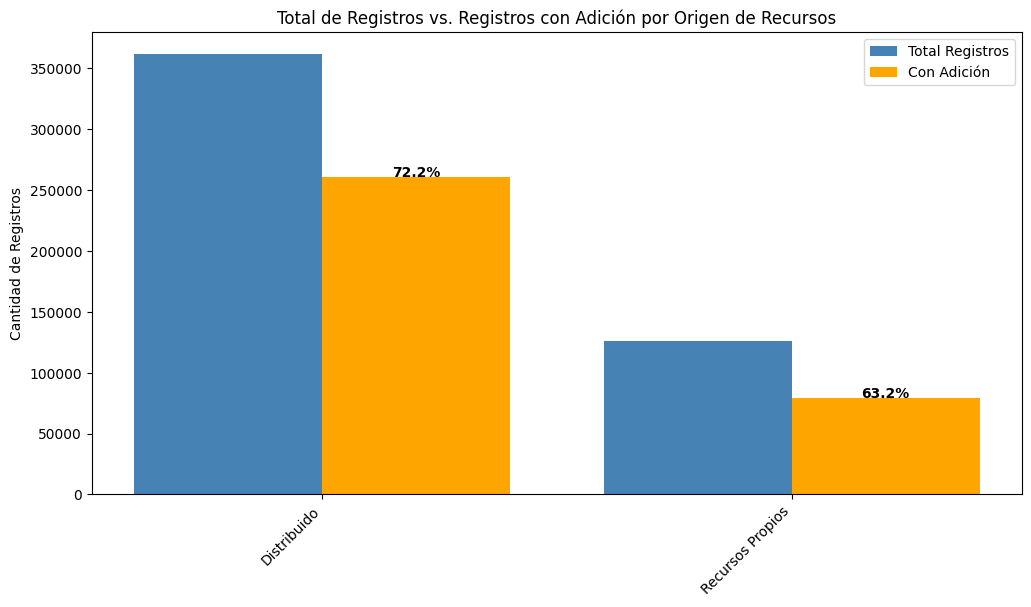

In [147]:
#Contar total de registros por origen de recursos
total_por_recursos = df['origen de los recursos'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_recursos= df[df['Adicion'] == 1]['origen de los recursos'].value_counts()

# Unir ambas series en un DataFrame
df_recursos = pd.DataFrame({'Total Registros': total_por_recursos, 'Con Adición': adicion_por_recursos}).fillna(0)

# Calcular el porcentaje de adición
df_recursos["% Adición"] = (df_recursos["Con Adición"] / df_recursos["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_recursos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_recursos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_recursos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_recursos["% Adición"]):
    ax.text(x[i] + width/2, df_recursos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_recursos.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Origen de Recursos")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable destino gasto

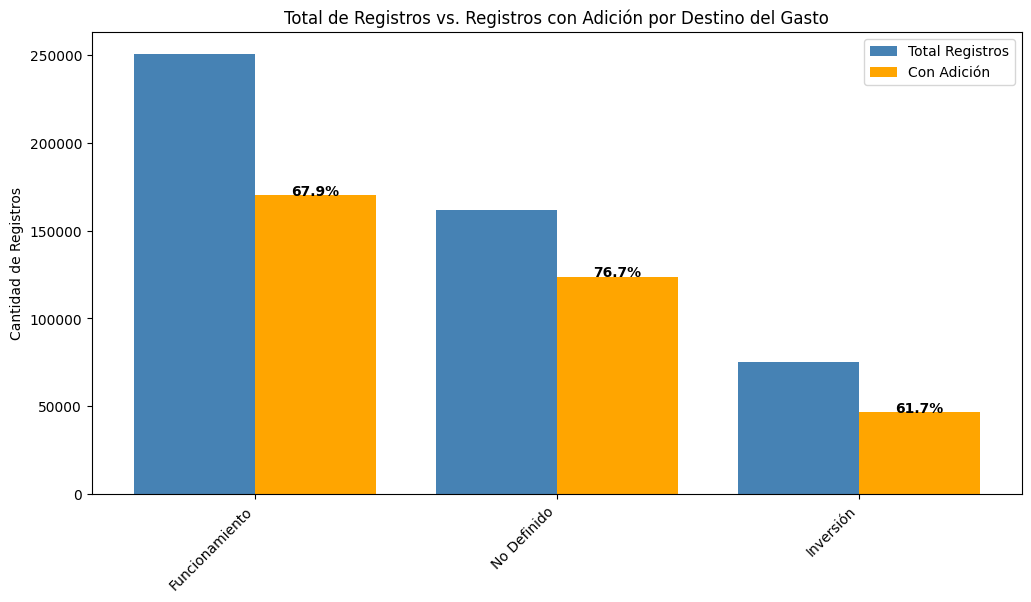

In [148]:
#Contar total de registros por destino del gasto
total_por_destino= df['destino gasto'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_destino = df[df['Adicion'] == 1]['destino gasto'].value_counts()

# Unir ambas series en un DataFrame
df_destino= pd.DataFrame({'Total Registros': total_por_destino, 'Con Adición': adicion_por_destino}).fillna(0)

# Calcular el porcentaje de adición
df_destino["% Adición"] = (df_destino["Con Adición"] / df_destino["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_destino))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_destino['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_destino['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_destino["% Adición"]):
    ax.text(x[i] + width/2, df_destino["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_destino.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Destino del Gasto")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable valor del contrato

In [149]:
df = df[df['valor del contrato'] != 0]
df = df.reset_index(drop=True)
df.shape

(484520, 73)

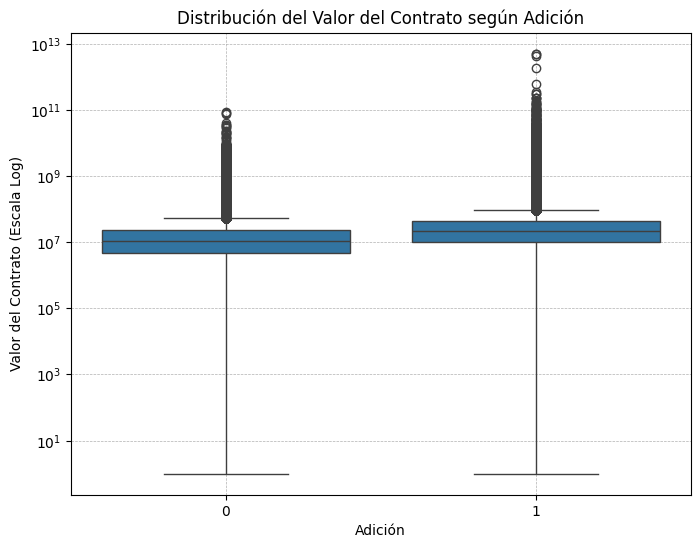

In [150]:
# Convertir 'valor del contrato' a numérico (en caso de que tenga caracteres como comas o símbolos)
df['valor del contrato'] = pd.to_numeric(df['valor del contrato'], errors='coerce')

# Crear el boxplot comparando contratos con y sin adición
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor del contrato', data=df)
plt.yscale('log')  # Escala logarítmica por si hay valores muy altos que distorsionen el gráfico
plt.xlabel('Adición')
plt.ylabel('Valor del Contrato (Escala Log)')
plt.title('Distribución del Valor del Contrato según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


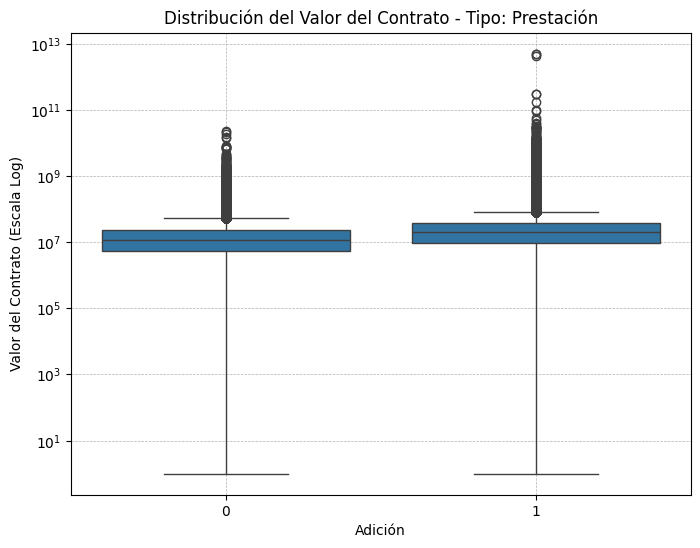

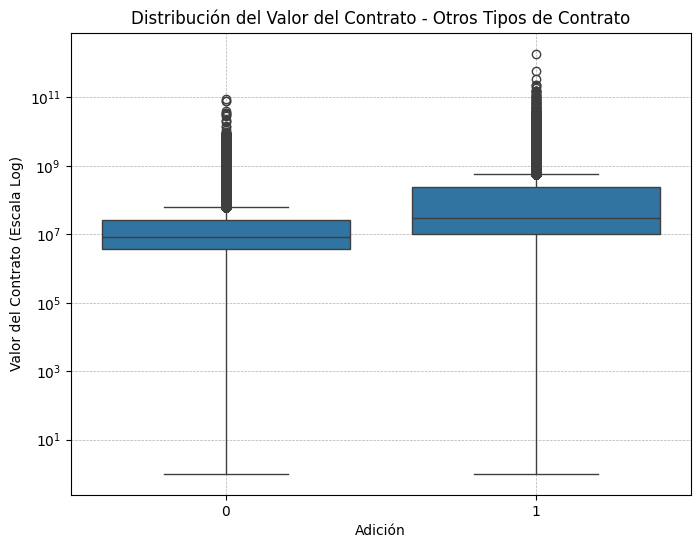

In [151]:

# Asegurar que 'valor del contrato' es numérico
df['valor del contrato'] = pd.to_numeric(df['valor del contrato'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor del contrato', data=df_prestacion)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor del Contrato (Escala Log)')
plt.title('Distribución del Valor del Contrato - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor del contrato', data=df_otros)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor del Contrato (Escala Log)')
plt.title('Distribución del Valor del Contrato - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


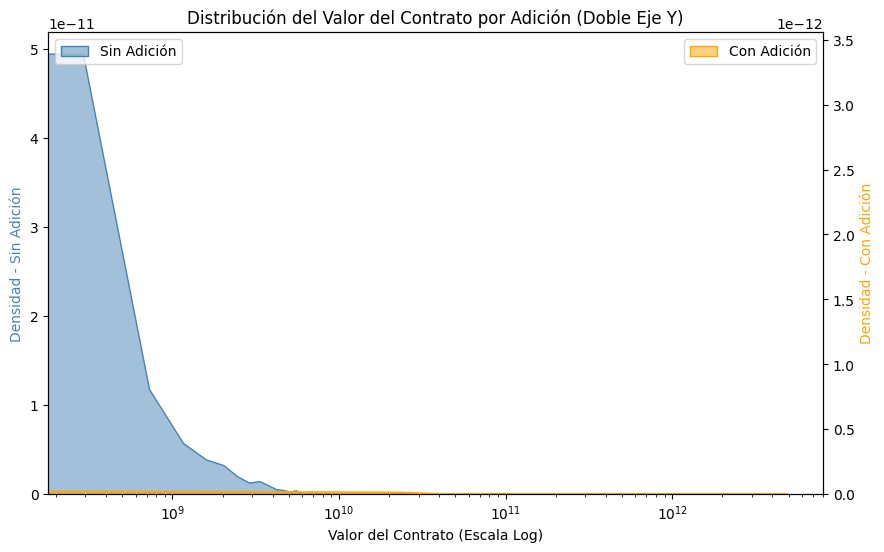

In [152]:
# Asegurar que 'valor del contrato' es numérico
df['valor del contrato'] = pd.to_numeric(df['valor del contrato'], errors='coerce')

# Filtrar NaN en valor del contrato
df_valido = df[['valor del contrato', 'Adicion']].dropna()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje secundario
ax2 = ax1.twinx()

# Densidad para Adición = 0
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor del contrato'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')

# Densidad para Adición = 1
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor del contrato'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')
ax2.set_ylabel('Densidad - Con Adición', color='orange')

# Escala logarítmica en X
ax1.set_xscale('log')
ax2.set_xscale('log')

# Configurar título y etiquetas
ax1.set_xlabel('Valor del Contrato (Escala Log)')
ax1.set_title('Distribución del Valor del Contrato por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()



Variable valor de pago adelantado- eliminar muchos 0

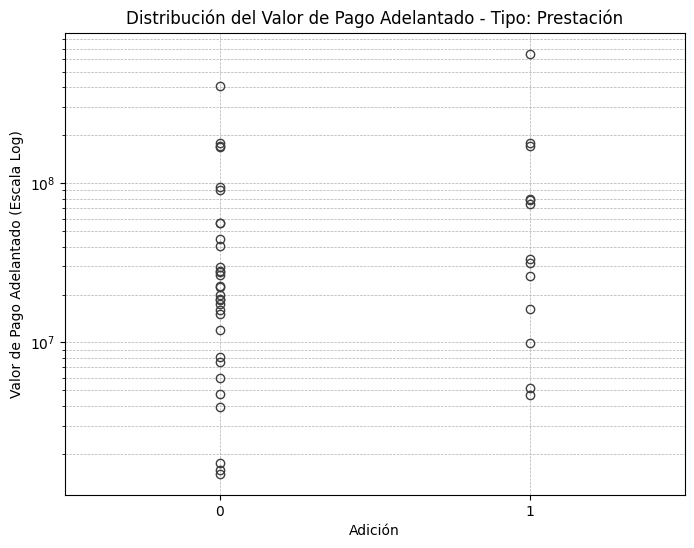

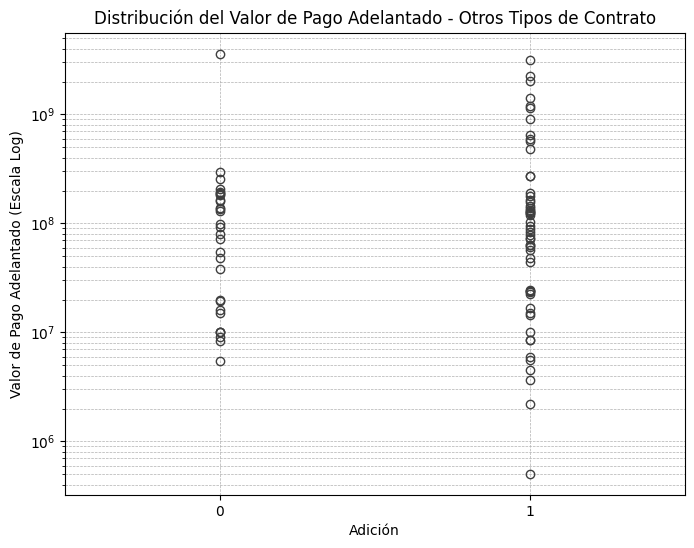

In [153]:
# Asegurar que 'valor de pago adelantado' es numérico
df['valor de pago adelantado'] = pd.to_numeric(df['valor de pago adelantado'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['valor de pago adelantado', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['valor de pago adelantado', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor de pago adelantado', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor de Pago Adelantado (Escala Log)')
plt.title('Distribución del Valor de Pago Adelantado - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor de pago adelantado', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor de Pago Adelantado (Escala Log)')
plt.title('Distribución del Valor de Pago Adelantado - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [154]:
(df['valor de pago adelantado'] == 0).sum()

484391

In [155]:
df=df.drop("valor de pago adelantado", axis=1)

Variable valor facturado


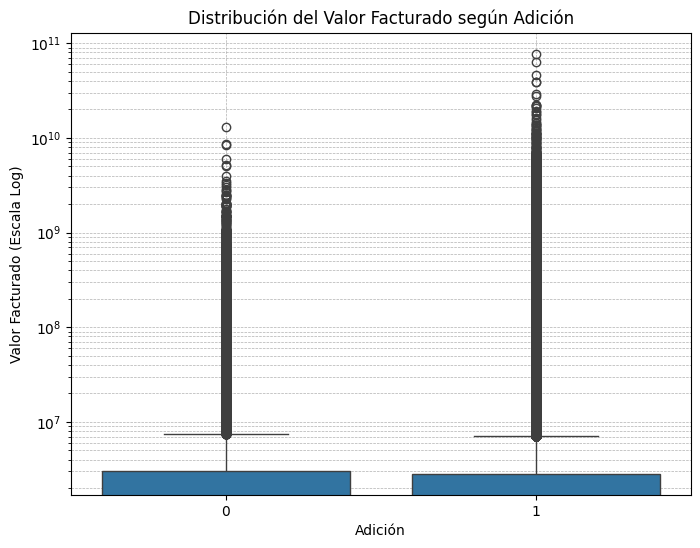

In [156]:

# Asegurar que 'valor facturado' es numérico
df['valor facturado'] = pd.to_numeric(df['valor facturado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor facturado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor facturado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Facturado (Escala Log)')
plt.title('Distribución del Valor Facturado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


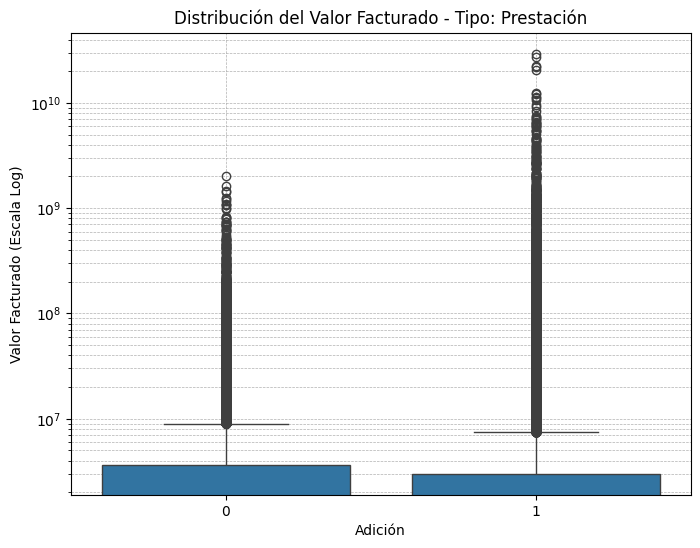

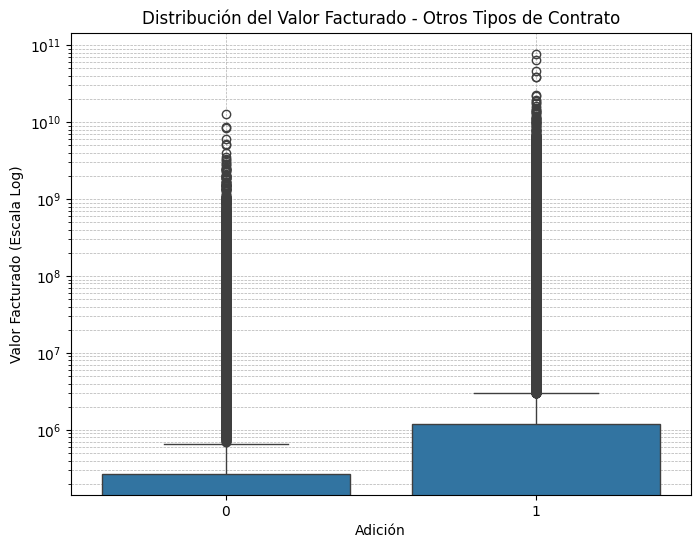

In [157]:
# Asegurar que 'valor facturado' es numérico
df['valor facturado'] = pd.to_numeric(df['valor facturado'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['valor facturado', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['valor facturado', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor facturado', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Facturado (Escala Log)')
plt.title('Distribución del Valor Facturado - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor facturado', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Facturado (Escala Log)')
plt.title('Distribución del Valor Facturado - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


Variable valor pendiente de pago

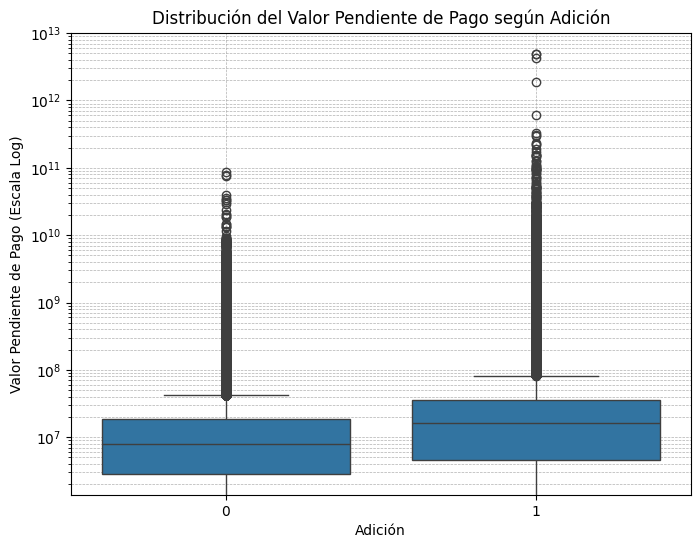

In [158]:
# Asegurar que 'valor pendiente de pago' es numérico
df['valor pendiente de pago'] = pd.to_numeric(df['valor pendiente de pago'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pendiente de pago', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de pago', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Pago (Escala Log)')
plt.title('Distribución del Valor Pendiente de Pago según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


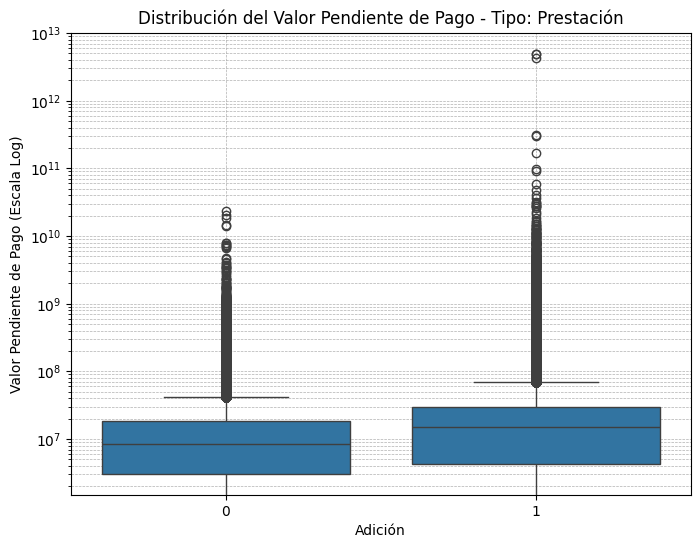

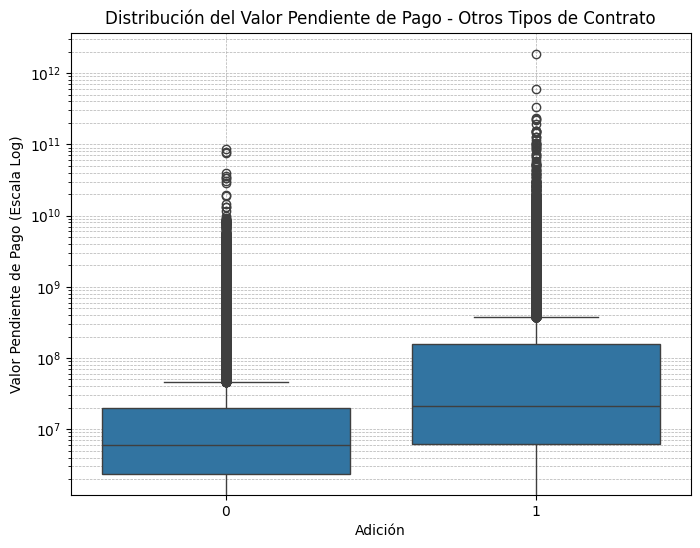

In [159]:
# Asegurar que 'valor pendiente de pago' es numérico
df['valor pendiente de pago'] = pd.to_numeric(df['valor pendiente de pago'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['valor pendiente de pago', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['valor pendiente de pago', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de pago', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Pago (Escala Log)')
plt.title('Distribución del Valor Pendiente de Pago - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de pago', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Pago (Escala Log)')
plt.title('Distribución del Valor Pendiente de Pago - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


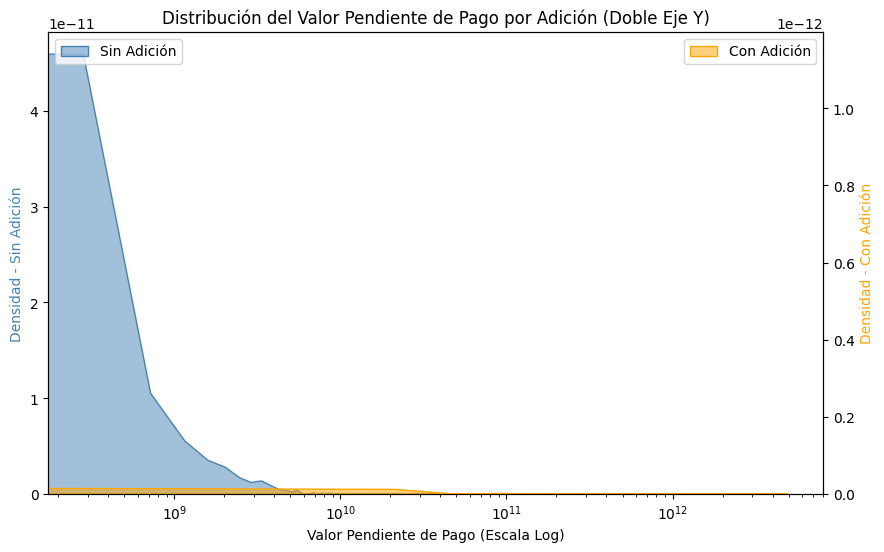

In [160]:


# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor pendiente de pago'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor pendiente de pago'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Pendiente de Pago (Escala Log)')
ax1.set_title('Distribución del Valor Pendiente de Pago por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable valor pagado

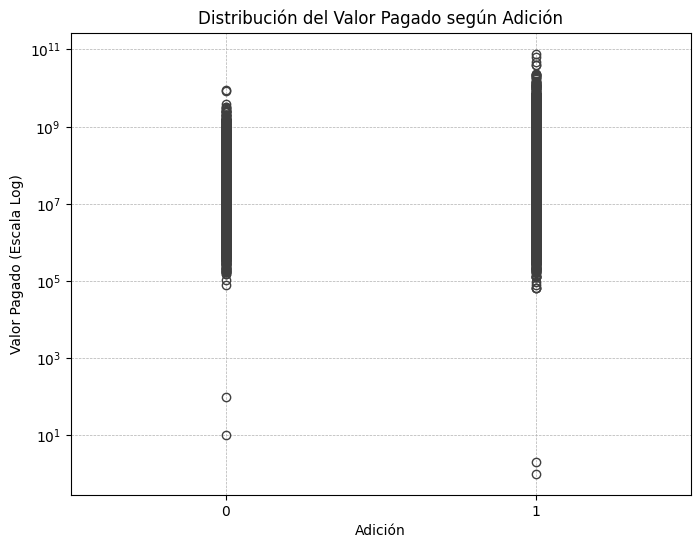

In [161]:

# Asegurar que 'valor pagado' es numérico
df['valor pagado'] = pd.to_numeric(df['valor pagado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pagado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pagado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pagado (Escala Log)')
plt.title('Distribución del Valor Pagado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


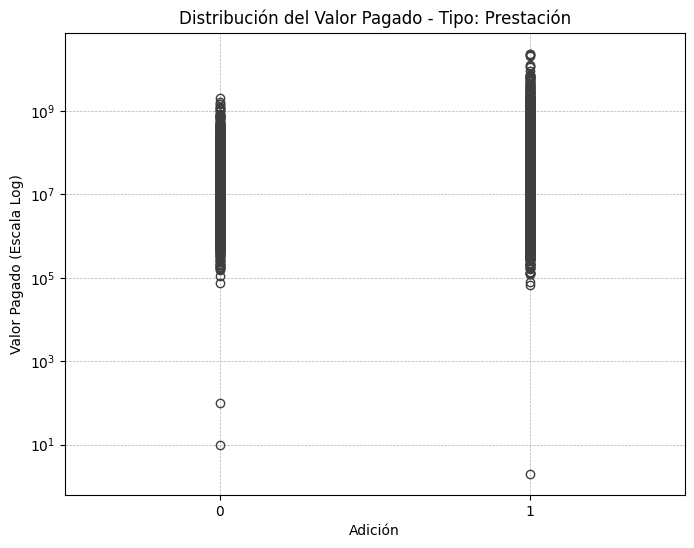

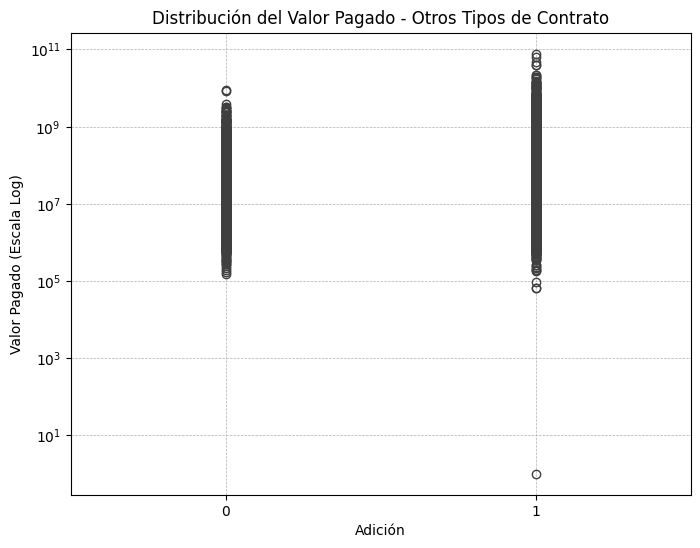

In [162]:
# Asegurar que 'valor pagado' es numérico
df['valor pagado'] = pd.to_numeric(df['valor pagado'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['valor pagado', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['valor pagado', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pagado', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pagado (Escala Log)')
plt.title('Distribución del Valor Pagado - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pagado', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pagado (Escala Log)')
plt.title('Distribución del Valor Pagado - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [163]:
(df['valor pagado'] == 0).sum()

375362

In [164]:
# Calcular porcentaje pagado de manera temporal
porcentaje_pagado = (df['valor pagado'] / df['valor del contrato']) * 100

# Generar cuantiles del valor del contrato (evitar NaN en el cálculo de cuantiles)
cuartiles_valor_contrato = pd.qcut(df['valor del contrato'], q=4, labels=['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto'], duplicates='drop')

# Crear función para categorizar porcentaje
def categorizar_porcentaje(p):
    if pd.isna(p):
        return np.nan
    elif p <= 25:
        return '0-25%'
    elif p <= 50:
        return '25-50%'
    elif p <= 75:
        return '50-75%'
    else:
        return '75-100%'

# Aplicar solo a los que tienen cuartiles válidos
df['porcentaje_pagado'] = porcentaje_pagado.apply(categorizar_porcentaje)




In [165]:
df['porcentaje_pagado'].value_counts()

porcentaje_pagado
0-25%      381164
75-100%     83592
50-75%       9888
25-50%       9876
Name: count, dtype: int64

Variable Porcentaje pagado

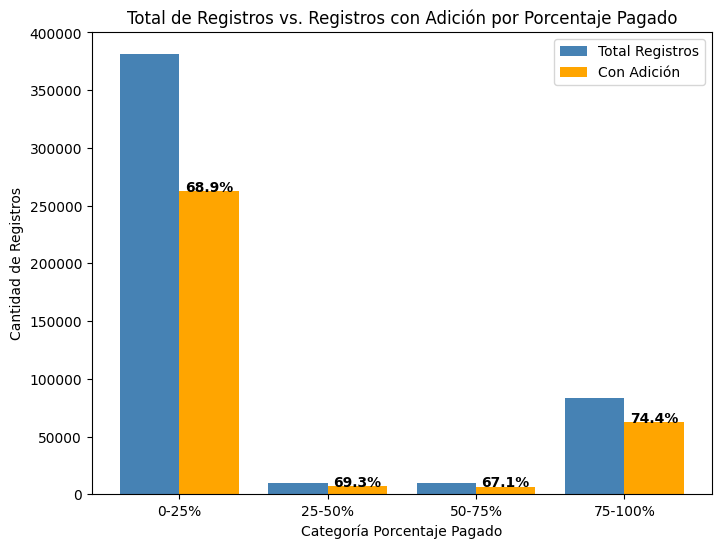

In [166]:
# Contar total de registros por categoría de porcentaje pagado
total_por_categoria = df['porcentaje_pagado'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_categoria = df[df['Adicion'] == 1]['porcentaje_pagado'].value_counts()

# Unir ambas series en un DataFrame
df_categoria_pago = pd.DataFrame({'Total Registros': total_por_categoria, 'Con Adición': adicion_por_categoria}).fillna(0)

# Calcular el porcentaje de adición
df_categoria_pago["% Adición"] = (df_categoria_pago["Con Adición"] / df_categoria_pago["Total Registros"]) * 100

# Ordenar por las categorías personalizadas
orden_categorias = ['0-25%', '25-50%', '50-75%', '75-100%']
df_categoria_pago = df_categoria_pago.reindex(orden_categorias)

# Configurar posiciones para las barras
x = np.arange(len(df_categoria_pago))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, df_categoria_pago['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_categoria_pago['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_categoria_pago["% Adición"]):
    ax.text(x[i] + width/2, df_categoria_pago["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_categoria_pago.index)
ax.set_xlabel("Categoría Porcentaje Pagado")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Porcentaje Pagado")
ax.legend()

# Mostrar gráfica
plt.show()


Variable Valor Amortizado

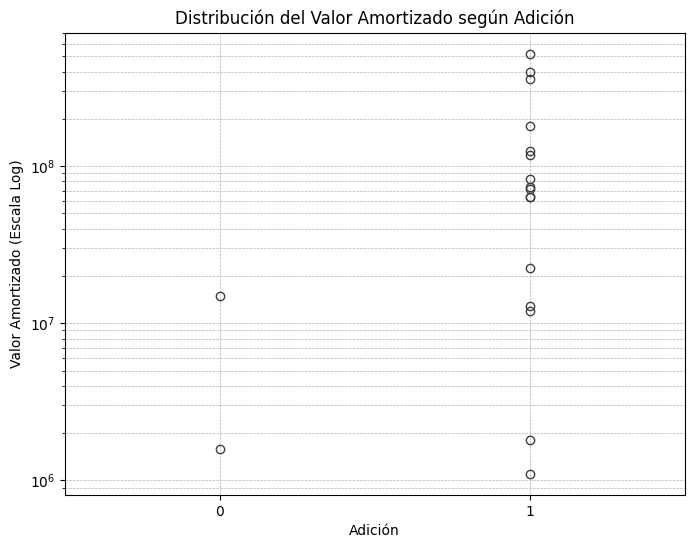

In [167]:
# Asegurar que 'valor amortizado' es numérico
df['valor amortizado'] = pd.to_numeric(df['valor amortizado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor amortizado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor amortizado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Amortizado (Escala Log)')
plt.title('Distribución del Valor Amortizado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [168]:
df=df.drop("valor amortizado",axis=1)

Variable valor pendiente de amortizacion

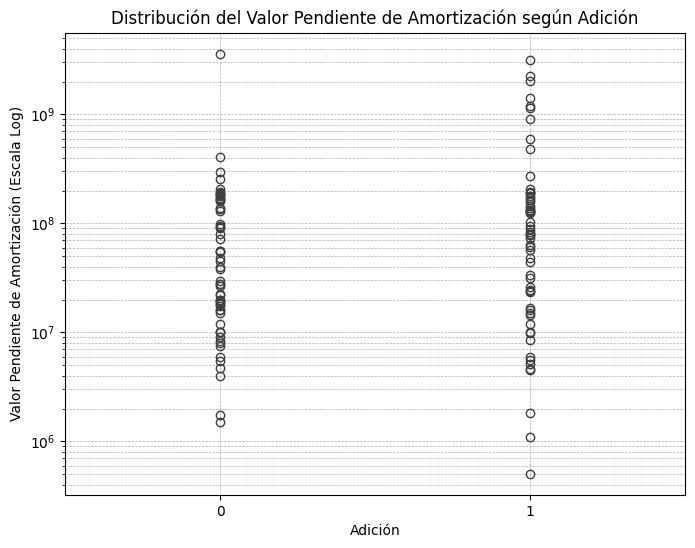

In [169]:

# Asegurar que 'valor pendiente de amortizacion' es numérico
df['valor pendiente de amortizacion'] = pd.to_numeric(df['valor pendiente de amortizacion'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pendiente de amortizacion', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de amortizacion', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Amortización (Escala Log)')
plt.title('Distribución del Valor Pendiente de Amortización según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [170]:
df=df.drop("valor pendiente de amortizacion",axis=1)

Variable valor pendiente de ejecucion

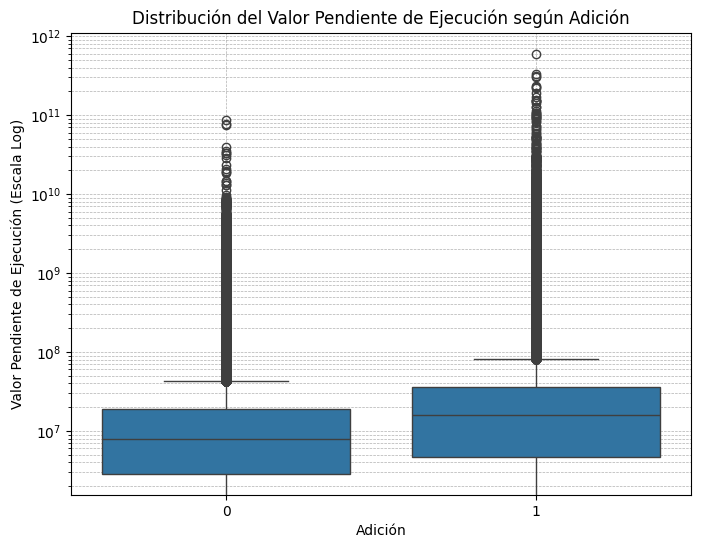

In [171]:
# Asegurar que 'valor pendiente de ejecucion' es numérico
df['valor pendiente de ejecucion'] = pd.to_numeric(df['valor pendiente de ejecucion'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pendiente de ejecucion', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de ejecucion', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Ejecución (Escala Log)')
plt.title('Distribución del Valor Pendiente de Ejecución según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


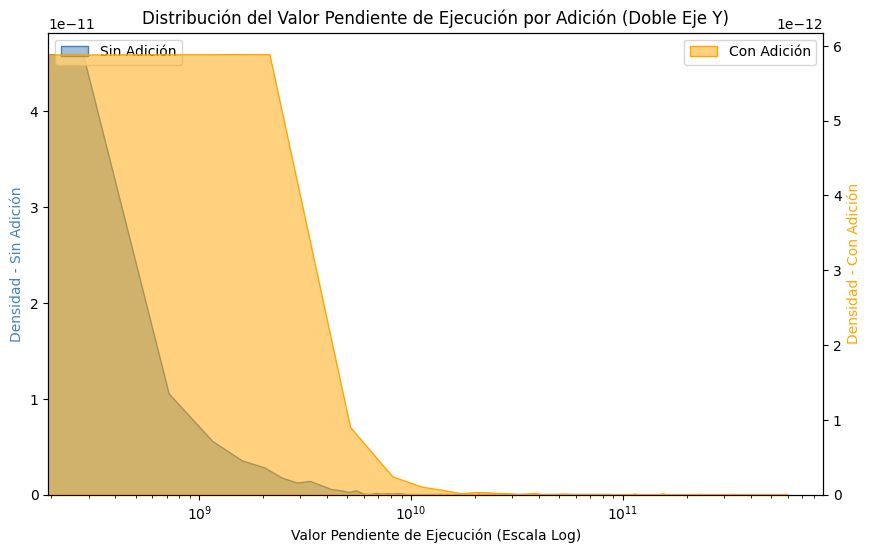

In [172]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor pendiente de ejecucion'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor pendiente de ejecucion'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Pendiente de Ejecución (Escala Log)')
ax1.set_title('Distribución del Valor Pendiente de Ejecución por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable estado bpin

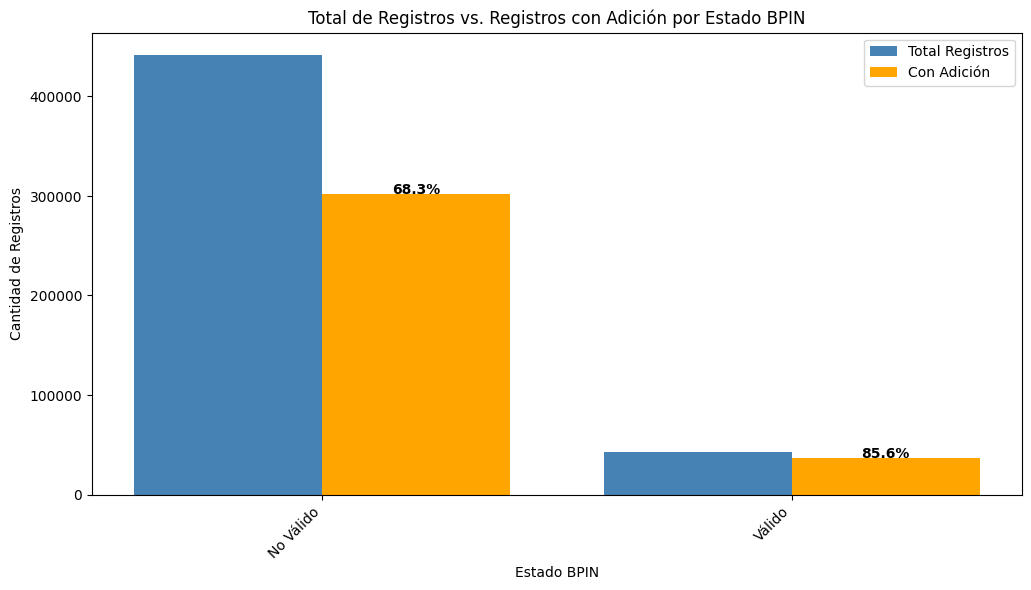

In [173]:

# Contar total de registros por estado bpin
total_por_bpin = df['estado bpin'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_bpin = df[df['Adicion'] == 1]['estado bpin'].value_counts()

# Unir ambas series en un DataFrame
df_bpin = pd.DataFrame({'Total Registros': total_por_bpin, 'Con Adición': adicion_por_bpin}).fillna(0)

# Calcular el porcentaje de adición
df_bpin["% Adición"] = (df_bpin["Con Adición"] / df_bpin["Total Registros"]) * 100

# Configurar posiciones para barras
x = np.arange(len(df_bpin))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Barras Total Registros
bars1 = ax.bar(x - width/2, df_bpin['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras Con Adición
bars2 = ax.bar(x + width/2, df_bpin['Con Adición'], width, label='Con Adición', color='orange')

# Añadir % Adición sobre barras
for i, v in enumerate(df_bpin["% Adición"]):
    ax.text(x[i] + width/2, df_bpin["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_bpin.index, rotation=45, ha='right')
ax.set_xlabel("Estado BPIN")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Estado BPIN")
ax.legend()

# Mostrar gráfica
plt.show()


Variable código bpin

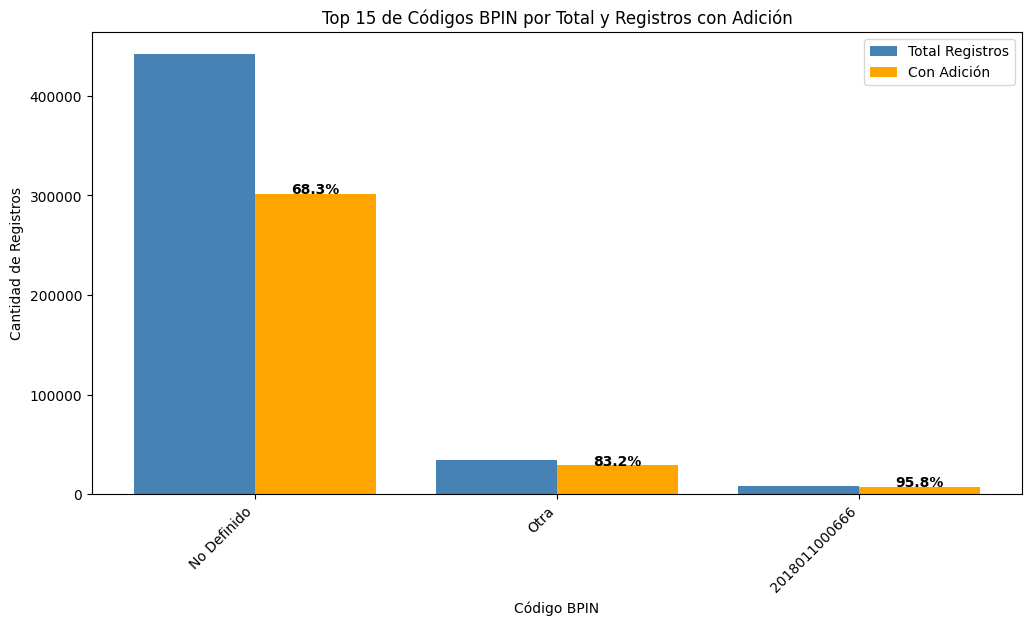

In [174]:


# Contar total de registros por código bpin
total_por_bpin = df['código bpin'].value_counts()

# Contar solo los registros con Adición = 1
adicion_por_bpin = df[df['Adicion'] == 1]['código bpin'].value_counts()

# Unir ambas series en un DataFrame
df_bpin = pd.DataFrame({'Total Registros': total_por_bpin, 'Con Adición': adicion_por_bpin}).fillna(0)

# Filtrar solo códigos BPIN que se repiten más de una vez
df_bpin = df_bpin[df_bpin['Total Registros'] > 1]

# Calcular el porcentaje de adición
df_bpin["% Adición"] = (df_bpin["Con Adición"] / df_bpin["Total Registros"]) * 100

# Tomar los 15 códigos con más registros
df_bpin = df_bpin.sort_values('Total Registros', ascending=False).head(15)

# Configurar las posiciones de las barras
x = np.arange(len(df_bpin))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_bpin['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_bpin['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_bpin["% Adición"]):
    ax.text(x[i] + width/2, df_bpin["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_bpin.index, rotation=45, ha="right")
ax.set_xlabel("Código BPIN")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Top 15 de Códigos BPIN por Total y Registros con Adición")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable anno bpin

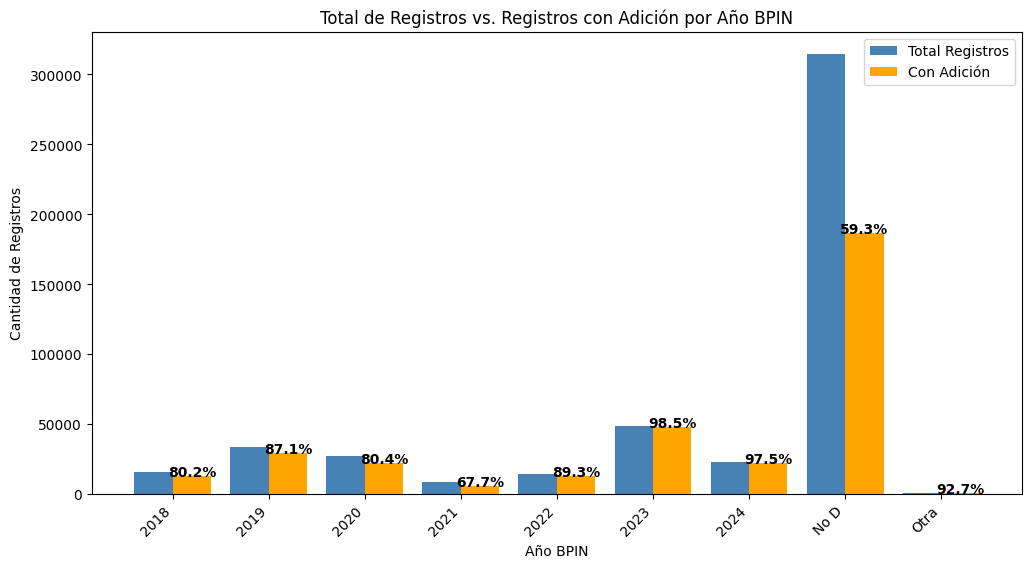

In [175]:
# Contar total de registros por año bpin
total_por_annobpin = df['anno bpin'].value_counts().sort_index()

# Contar solo los registros con Adicion = 1
adicion_por_annobpin = df[df['Adicion'] == 1]['anno bpin'].value_counts().sort_index()

# Unir ambas series en un DataFrame
df_annobpin = pd.DataFrame({'Total Registros': total_por_annobpin, 'Con Adición': adicion_por_annobpin}).fillna(0)

# Calcular el porcentaje de adición
df_annobpin["% Adición"] = (df_annobpin["Con Adición"] / df_annobpin["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_annobpin))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_annobpin['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_annobpin['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_annobpin["% Adición"]):
    ax.text(x[i] + width/2, df_annobpin["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_annobpin.index, rotation=45, ha="right")
ax.set_xlabel("Año BPIN")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Año BPIN")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable saldo cdp

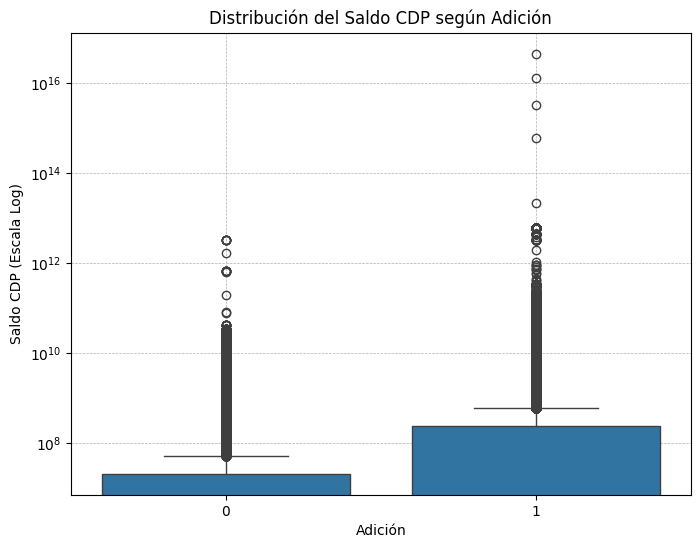

In [176]:

# Asegurar que 'saldo cdp' es numérico
df['saldo cdp'] = pd.to_numeric(df['saldo cdp'], errors='coerce')

# Filtrar NaN
df_valido = df[['saldo cdp', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='saldo cdp', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Saldo CDP (Escala Log)')
plt.title('Distribución del Saldo CDP según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


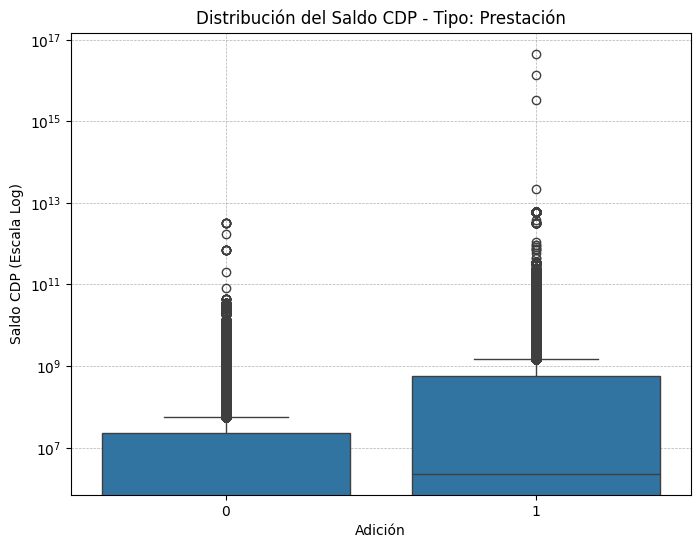

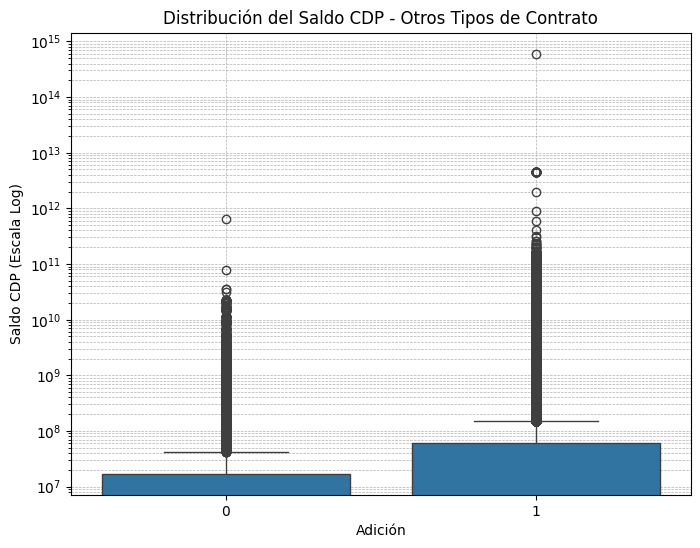

In [177]:
# Asegurar que 'saldo cdp' es numérico
df['saldo cdp'] = pd.to_numeric(df['saldo cdp'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['saldo cdp', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['saldo cdp', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='saldo cdp', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Saldo CDP (Escala Log)')
plt.title('Distribución del Saldo CDP - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='saldo cdp', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Saldo CDP (Escala Log)')
plt.title('Distribución del Saldo CDP - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [178]:
(df['saldo cdp'] == 0).sum()

252670

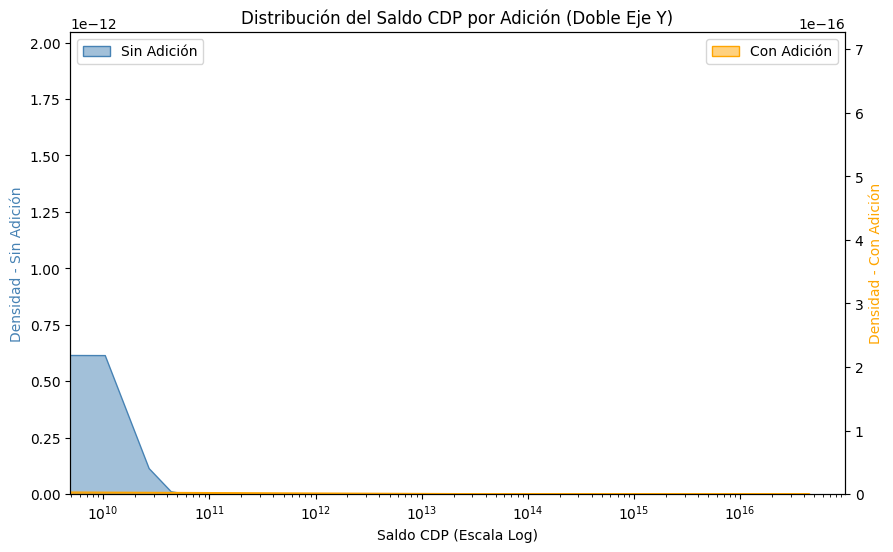

In [179]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['saldo cdp'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['saldo cdp'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Saldo CDP (Escala Log)')
ax1.set_title('Distribución del Saldo CDP por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable saldo vigencia- elimnado muchos 0

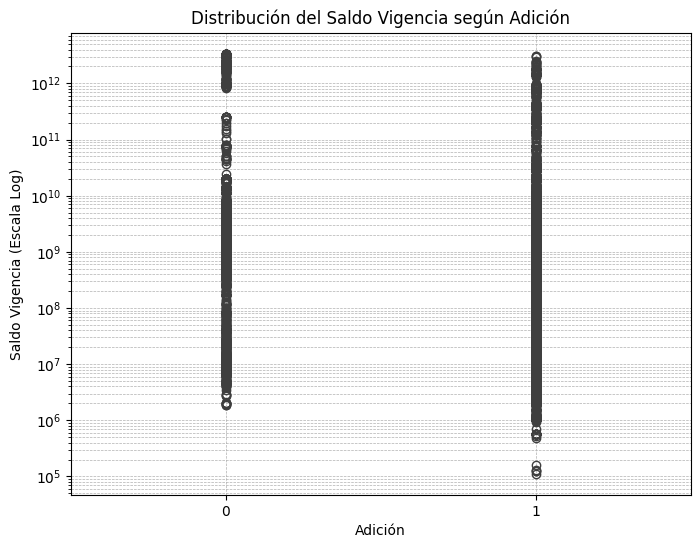

In [180]:

# Asegurar que 'saldo vigencia' es numérico
df['saldo vigencia'] = pd.to_numeric(df['saldo vigencia'], errors='coerce')

# Filtrar NaN
df_valido = df[['saldo vigencia', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='saldo vigencia', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Saldo Vigencia (Escala Log)')
plt.title('Distribución del Saldo Vigencia según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [181]:
(df['saldo vigencia'] == 0).sum()

474272

In [182]:
df=df.drop("saldo vigencia",axis=1)

Variable espostconflicto- Se debe eliminar

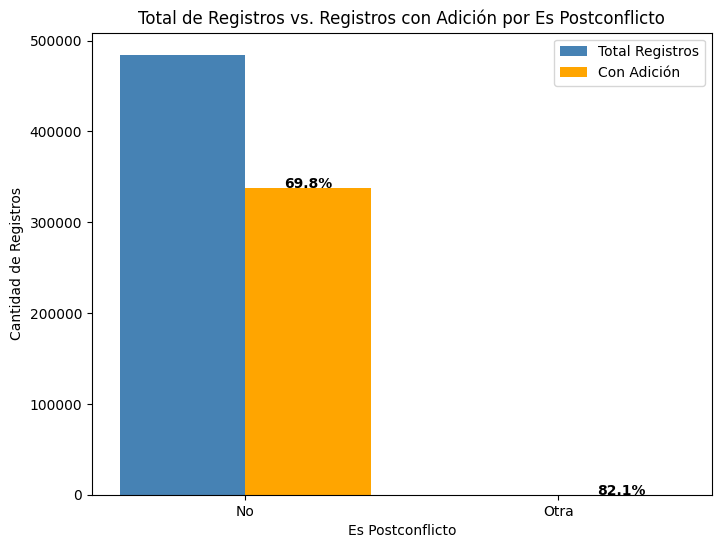

In [183]:
# Contar total de registros por espostconflicto
total_por_postconflicto = df['espostconflicto'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_postconflicto = df[df['Adicion'] == 1]['espostconflicto'].value_counts()

# Unir ambas series en un DataFrame
df_postconflicto = pd.DataFrame({'Total Registros': total_por_postconflicto, 'Con Adición': adicion_por_postconflicto}).fillna(0)

# Calcular el porcentaje de adición
df_postconflicto["% Adición"] = (df_postconflicto["Con Adición"] / df_postconflicto["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_postconflicto))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, df_postconflicto['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_postconflicto['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_postconflicto["% Adición"]):
    ax.text(x[i] + width/2, df_postconflicto["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_postconflicto.index, rotation=0)
ax.set_xlabel("Es Postconflicto")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Es Postconflicto")
ax.legend()

# Mostrar gráfica
plt.show()


In [184]:
df=df.drop("espostconflicto",axis=1)

Variable dias adicionados

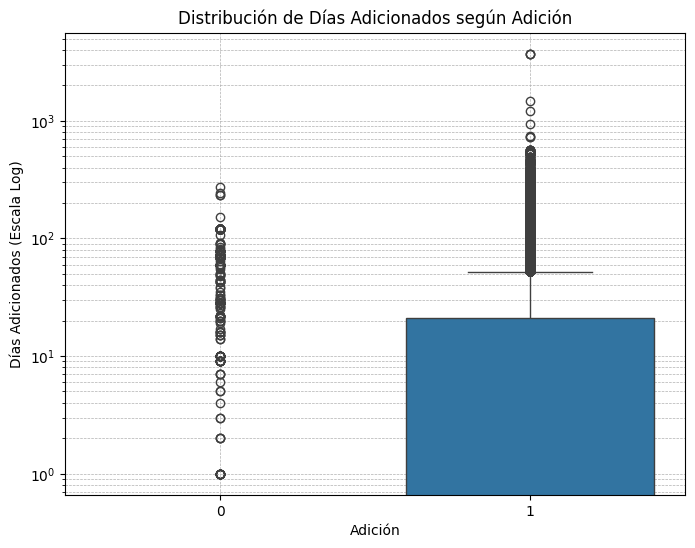

In [185]:
# Asegurar que 'dias adicionados' es numérico
df['dias adicionados'] = pd.to_numeric(df['dias adicionados'], errors='coerce')

# Filtrar NaN
df_valido = df[['dias adicionados', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='dias adicionados', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Días Adicionados (Escala Log)')
plt.title('Distribución de Días Adicionados según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


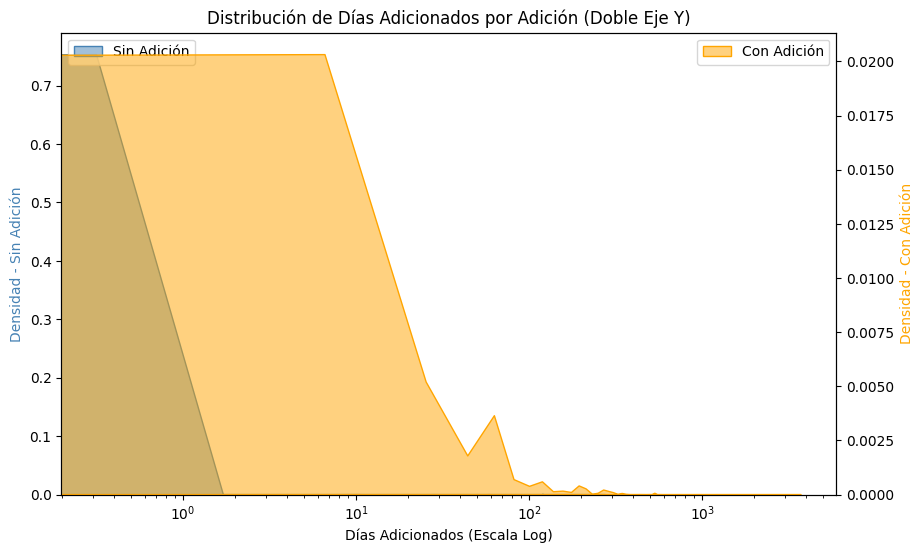

In [186]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['dias adicionados'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['dias adicionados'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Días Adicionados (Escala Log)')
ax1.set_title('Distribución de Días Adicionados por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable puntos del acuerdo-Se debe eliminar

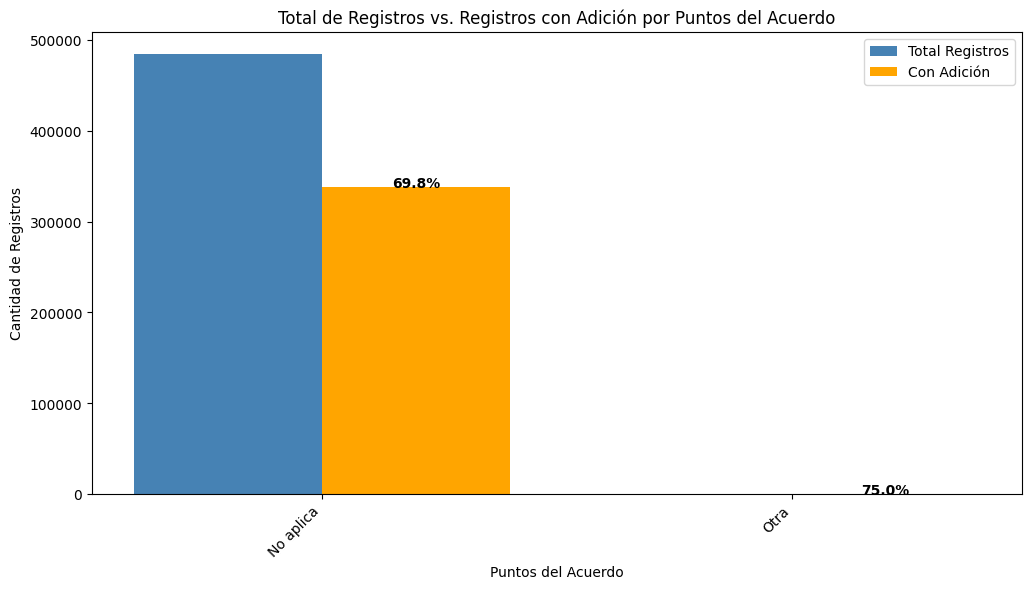

In [187]:
# Contar total de registros por puntos del acuerdo
total_por_puntos = df['puntos del acuerdo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_puntos = df[df['Adicion'] == 1]['puntos del acuerdo'].value_counts()

# Unir ambas series en un DataFrame
df_puntos = pd.DataFrame({'Total Registros': total_por_puntos, 'Con Adición': adicion_por_puntos}).fillna(0)

# Calcular el porcentaje de adición
df_puntos["% Adición"] = (df_puntos["Con Adición"] / df_puntos["Total Registros"]) * 100

# Tomar solo los más relevantes (por ejemplo, los 15 más comunes)
df_puntos = df_puntos.sort_values('Total Registros', ascending=False).head(15)

# Configurar posiciones para las barras
x = np.arange(len(df_puntos))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_puntos['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_puntos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_puntos["% Adición"]):
    ax.text(x[i] + width/2, df_puntos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_puntos.index, rotation=45, ha="right")
ax.set_xlabel("Puntos del Acuerdo")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Puntos del Acuerdo")
ax.legend()

# Mostrar gráfica
plt.show()


In [188]:
df=df.drop("puntos del acuerdo",axis=1)

Variable pilares del acuerdo- se debe eliminar

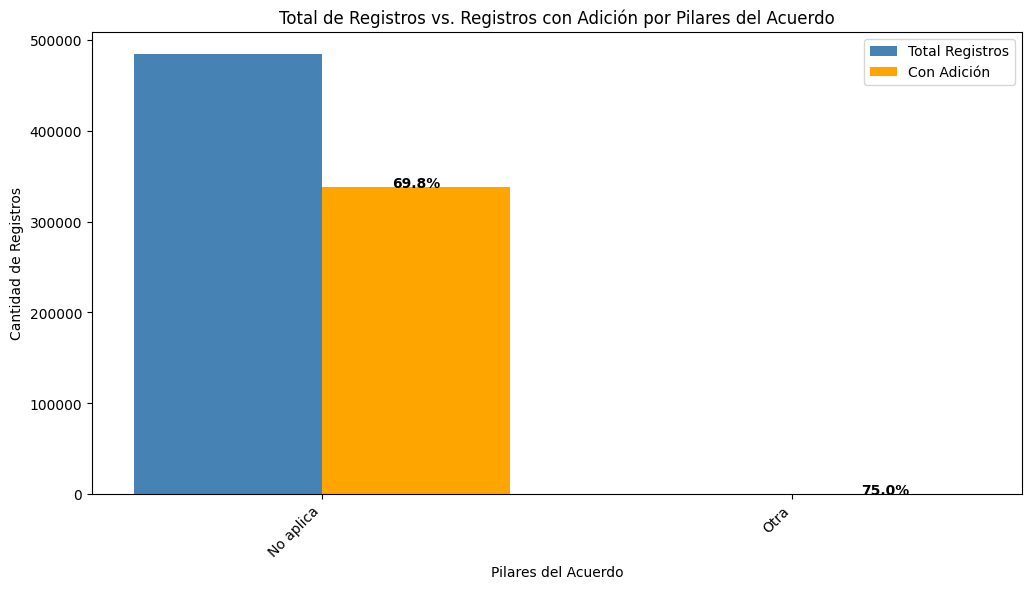

In [189]:
# Contar total de registros por pilares del acuerdo
total_por_pilares = df['pilares del acuerdo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_pilares = df[df['Adicion'] == 1]['pilares del acuerdo'].value_counts()

# Unir ambas series en un DataFrame
df_pilares = pd.DataFrame({'Total Registros': total_por_pilares, 'Con Adición': adicion_por_pilares}).fillna(0)

# Calcular el porcentaje de adición
df_pilares["% Adición"] = (df_pilares["Con Adición"] / df_pilares["Total Registros"]) * 100

# Tomar solo los más relevantes (por ejemplo, los 15 más comunes)
df_pilares = df_pilares.sort_values('Total Registros', ascending=False).head(15)

# Configurar posiciones para las barras
x = np.arange(len(df_pilares))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_pilares['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_pilares['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_pilares["% Adición"]):
    ax.text(x[i] + width/2, df_pilares["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_pilares.index, rotation=45, ha="right")
ax.set_xlabel("Pilares del Acuerdo")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Pilares del Acuerdo")
ax.legend()

# Mostrar gráfica
plt.show()


In [190]:
df=df.drop("pilares del acuerdo",axis=1)

Variable nombre representante legal-se debe eliminar

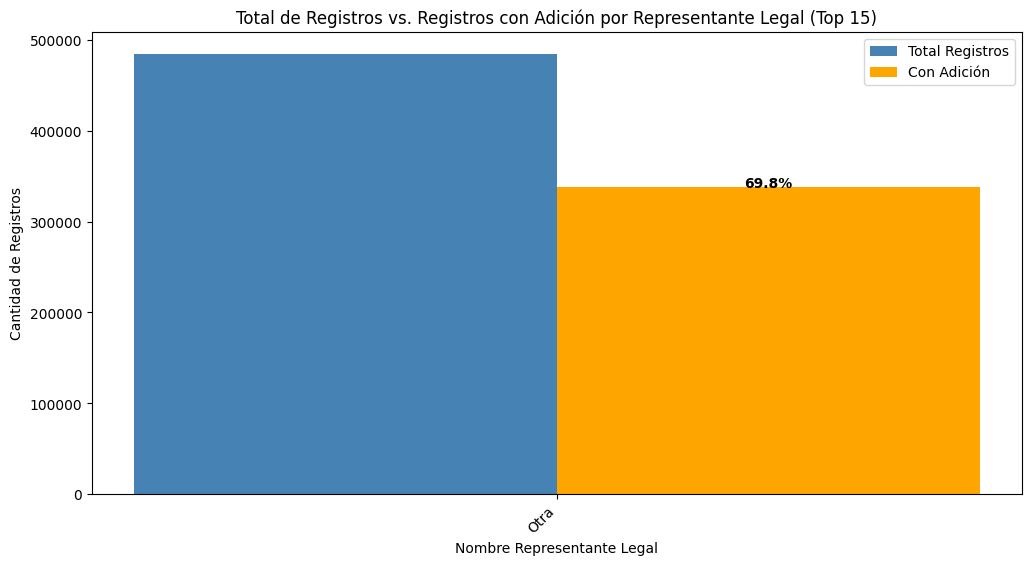

In [191]:
# Contar total de registros por nombre representante legal
total_por_representante = df['nombre representante legal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_representante = df[df['Adicion'] == 1]['nombre representante legal'].value_counts()

# Unir ambas series en un DataFrame
df_representante = pd.DataFrame({'Total Registros': total_por_representante, 'Con Adición': adicion_por_representante}).fillna(0)

# Filtrar solo los más frecuentes (ejemplo: top 15)
df_representante = df_representante.sort_values('Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_representante["% Adición"] = (df_representante["Con Adición"] / df_representante["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_representante))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_representante['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_representante['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_representante["% Adición"]):
    ax.text(x[i] + width/2, df_representante["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_representante.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Representante Legal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Representante Legal (Top 15)")
ax.legend()

# Mostrar gráfica
plt.show()


In [192]:
df=df.drop("nombre representante legal",axis=1)

Variable nacionalidad representante legal- se debe eliminar

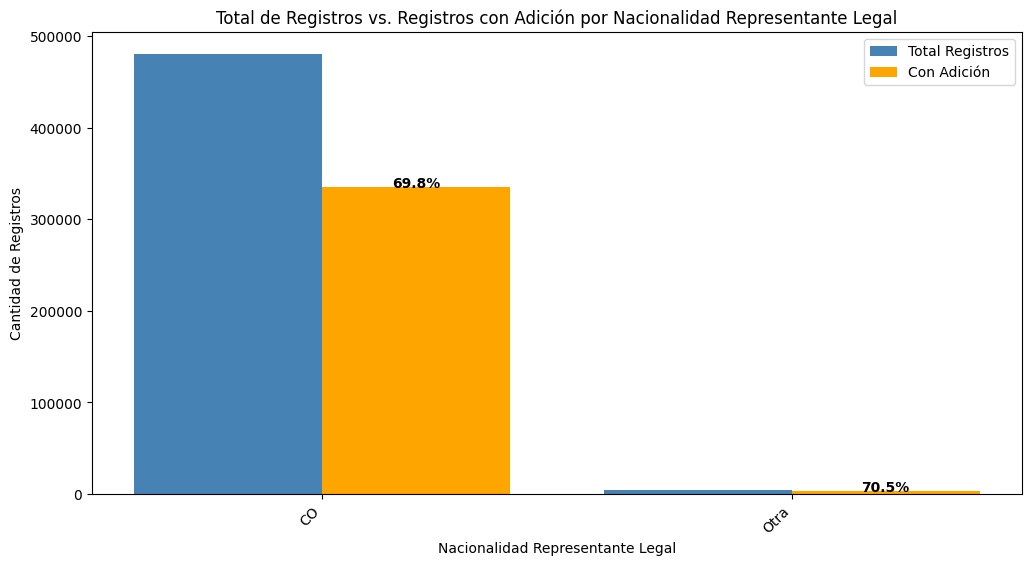

In [193]:
# Contar total de registros por nacionalidad
total_por_nacionalidad = df['nacionalidad representante legal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_nacionalidad = df[df['Adicion'] == 1]['nacionalidad representante legal'].value_counts()

# Unir ambas series en un DataFrame
df_nacionalidad = pd.DataFrame({'Total Registros': total_por_nacionalidad, 'Con Adición': adicion_por_nacionalidad}).fillna(0)

# Calcular el porcentaje de adición
df_nacionalidad["% Adición"] = (df_nacionalidad["Con Adición"] / df_nacionalidad["Total Registros"]) * 100

# Tomar solo las más relevantes (por ejemplo, las 15 más comunes)
df_nacionalidad = df_nacionalidad.sort_values('Total Registros', ascending=False).head(15)

# Configurar posiciones para las barras
x = np.arange(len(df_nacionalidad))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_nacionalidad['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_nacionalidad['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_nacionalidad["% Adición"]):
    ax.text(x[i] + width/2, df_nacionalidad["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_nacionalidad.index, rotation=45, ha="right")
ax.set_xlabel("Nacionalidad Representante Legal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Nacionalidad Representante Legal")
ax.legend()

# Mostrar gráfica
plt.show()


In [194]:
df=df.drop("nacionalidad representante legal",axis=1)

Variable presupuesto general de la nacion – pgn

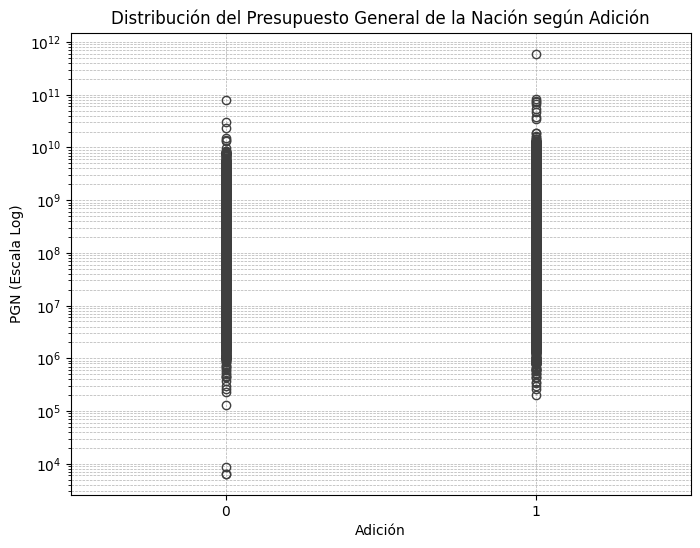

In [195]:
# Asegurar que 'presupuesto general de la nacion – pgn' es numérico
df['presupuesto general de la nacion – pgn'] = pd.to_numeric(df['presupuesto general de la nacion – pgn'], errors='coerce')

# Filtrar NaN
df_valido = df[['presupuesto general de la nacion – pgn', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='presupuesto general de la nacion – pgn', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('PGN (Escala Log)')
plt.title('Distribución del Presupuesto General de la Nación según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


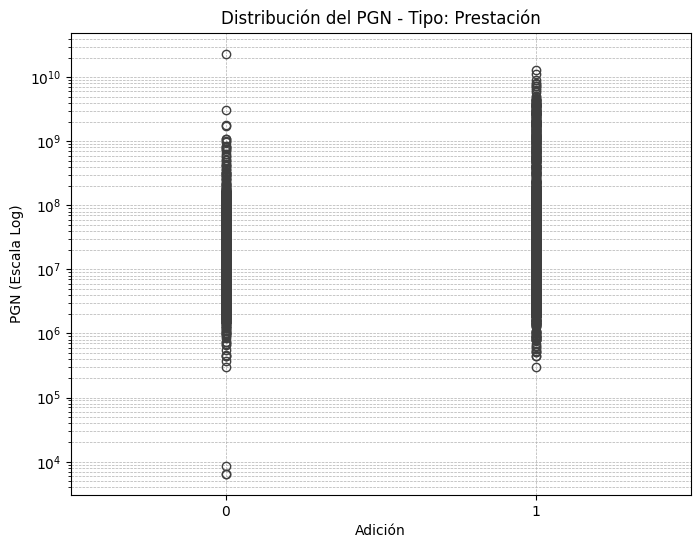

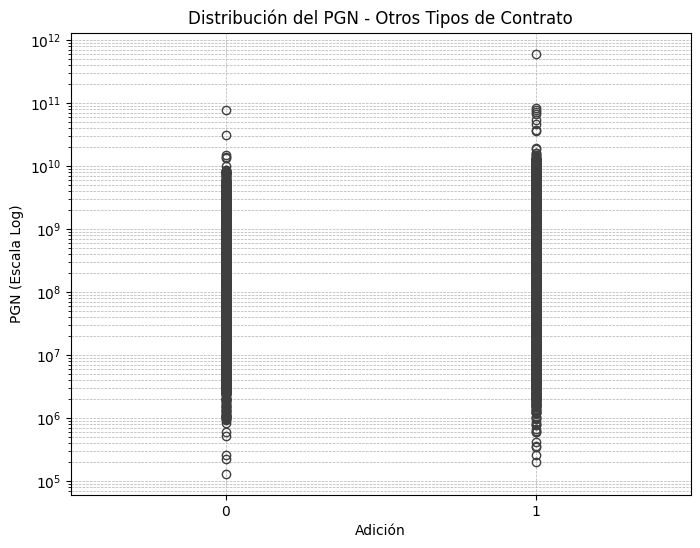

In [196]:
# Asegurar que 'presupuesto general de la nacion – pgn' es numérico
df['presupuesto general de la nacion – pgn'] = pd.to_numeric(df['presupuesto general de la nacion – pgn'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['presupuesto general de la nacion – pgn', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['presupuesto general de la nacion – pgn', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='presupuesto general de la nacion – pgn', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('PGN (Escala Log)')
plt.title('Distribución del PGN - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='presupuesto general de la nacion – pgn', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('PGN (Escala Log)')
plt.title('Distribución del PGN - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


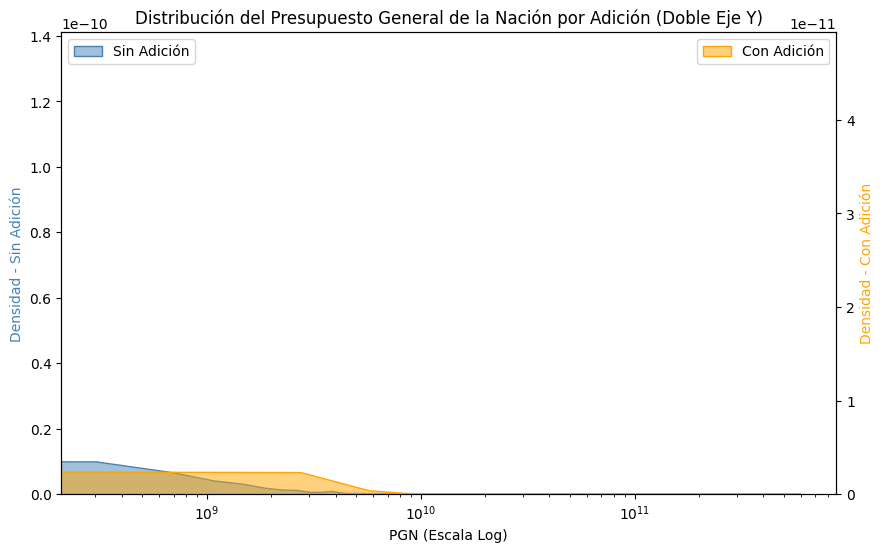

In [197]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['presupuesto general de la nacion – pgn'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['presupuesto general de la nacion – pgn'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('PGN (Escala Log)')
ax1.set_title('Distribución del Presupuesto General de la Nación por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable sistema general de participaciones

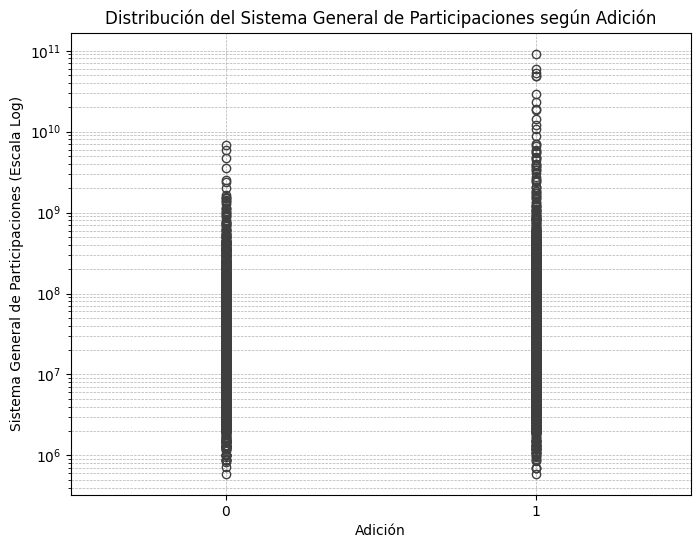

In [198]:
# Asegurar que 'sistema general de participaciones' es numérico
df['sistema general de participaciones'] = pd.to_numeric(df['sistema general de participaciones'], errors='coerce')

# Filtrar NaN
df_valido = df[['sistema general de participaciones', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='sistema general de participaciones', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Sistema General de Participaciones (Escala Log)')
plt.title('Distribución del Sistema General de Participaciones según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


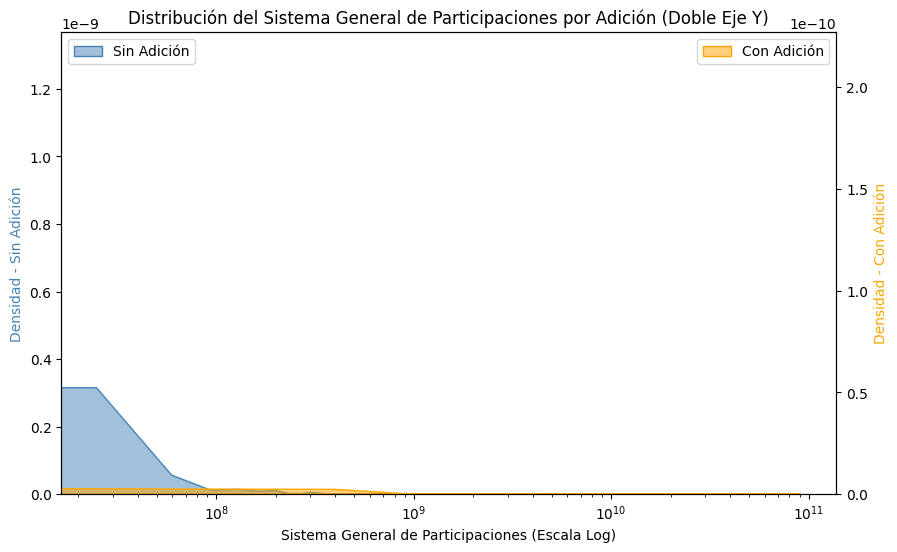

In [199]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['sistema general de participaciones'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['sistema general de participaciones'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Sistema General de Participaciones (Escala Log)')
ax1.set_title('Distribución del Sistema General de Participaciones por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable sistema general de regalías

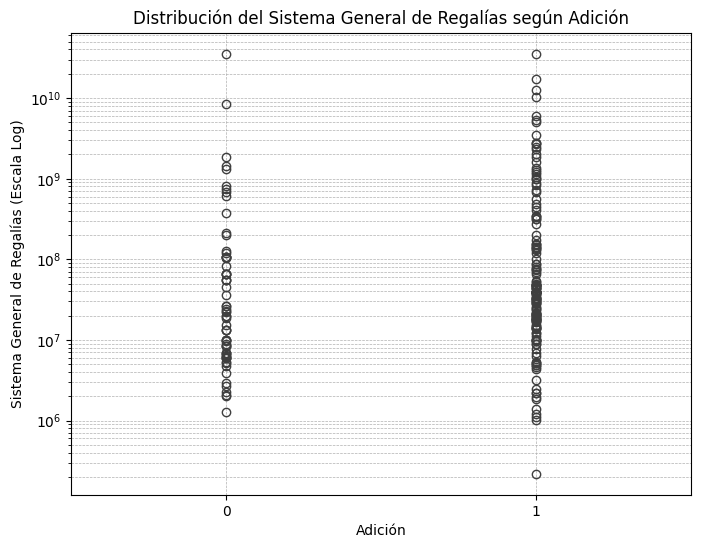

In [200]:
# Asegurar que 'sistema general de regalías' es numérico
df['sistema general de regalías'] = pd.to_numeric(df['sistema general de regalías'], errors='coerce')

# Filtrar NaN
df_valido = df[['sistema general de regalías', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='sistema general de regalías', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Sistema General de Regalías (Escala Log)')
plt.title('Distribución del Sistema General de Regalías según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


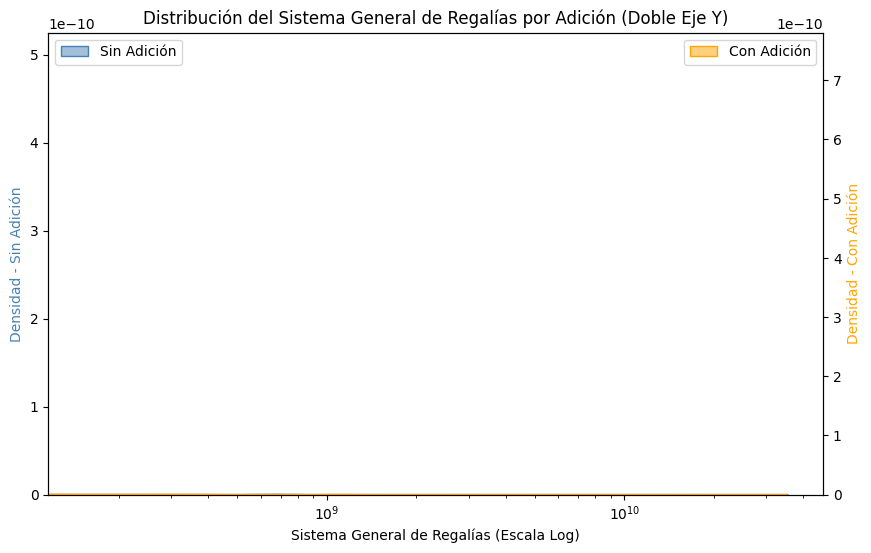

In [201]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['sistema general de regalías'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['sistema general de regalías'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Sistema General de Regalías (Escala Log)')
ax1.set_title('Distribución del Sistema General de Regalías por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable recursos propios (alcaldias_gobernaciones_resguardosindigenas)

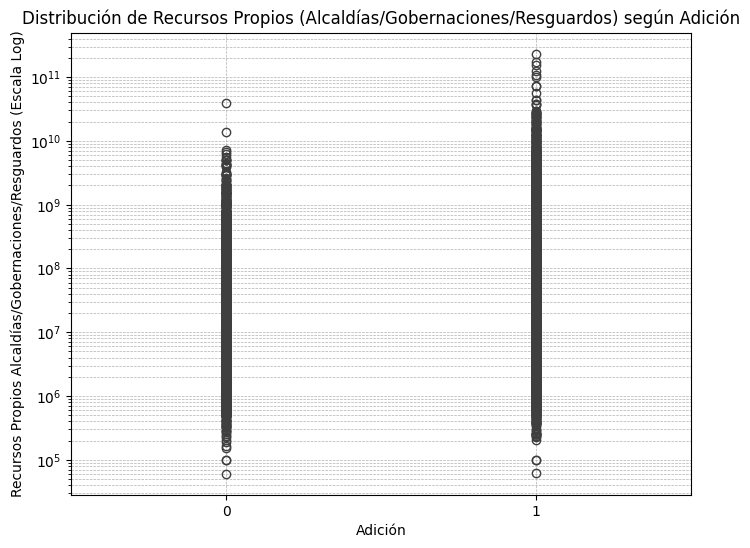

In [202]:
# Asegurar que 'recursos propios (alcaldias_gobernaciones_resguardosindigenas)' es numérico
df['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'] = pd.to_numeric(df['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'], errors='coerce')

# Filtrar NaN
df_valido = df[['recursos propios (alcaldias_gobernaciones_resguardosindigenas)', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='recursos propios (alcaldias_gobernaciones_resguardosindigenas)', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Recursos Propios Alcaldías/Gobernaciones/Resguardos (Escala Log)')
plt.title('Distribución de Recursos Propios (Alcaldías/Gobernaciones/Resguardos) según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


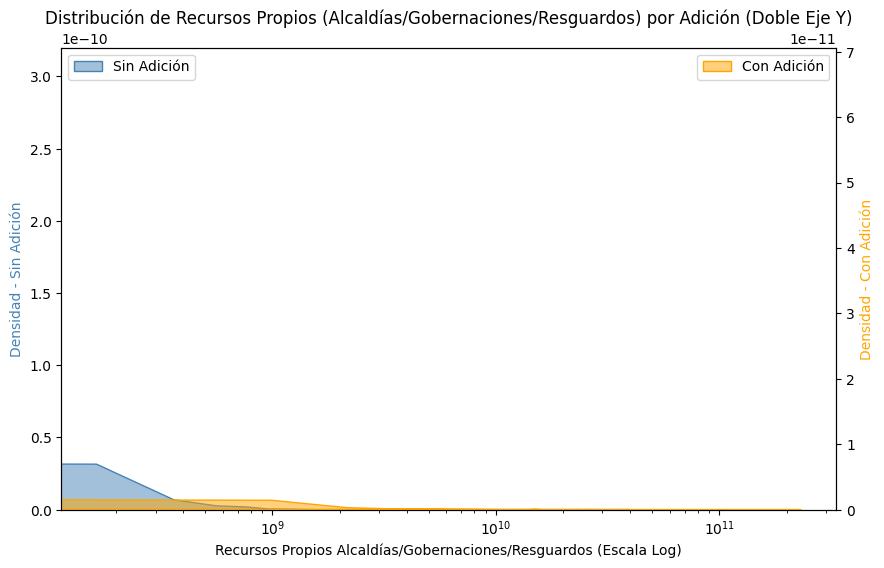

In [203]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Recursos Propios Alcaldías/Gobernaciones/Resguardos (Escala Log)')
ax1.set_title('Distribución de Recursos Propios (Alcaldías/Gobernaciones/Resguardos) por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable recursos de credito

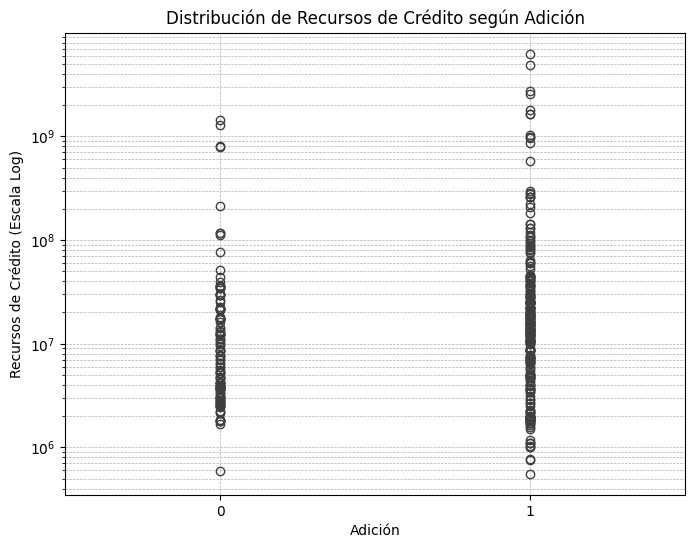

In [204]:
# Asegurar que 'recursos de credito' es numérico
df['recursos de credito'] = pd.to_numeric(df['recursos de credito'], errors='coerce')

# Filtrar NaN
df_valido = df[['recursos de credito', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='recursos de credito', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Recursos de Crédito (Escala Log)')
plt.title('Distribución de Recursos de Crédito según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


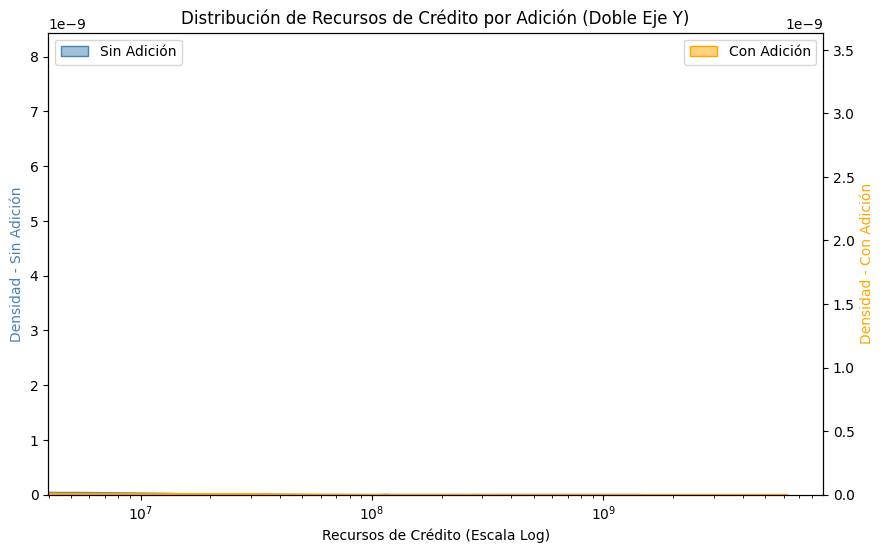

In [205]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['recursos de credito'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['recursos de credito'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Recursos de Crédito (Escala Log)')
ax1.set_title('Distribución de Recursos de Crédito por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable recursos propios

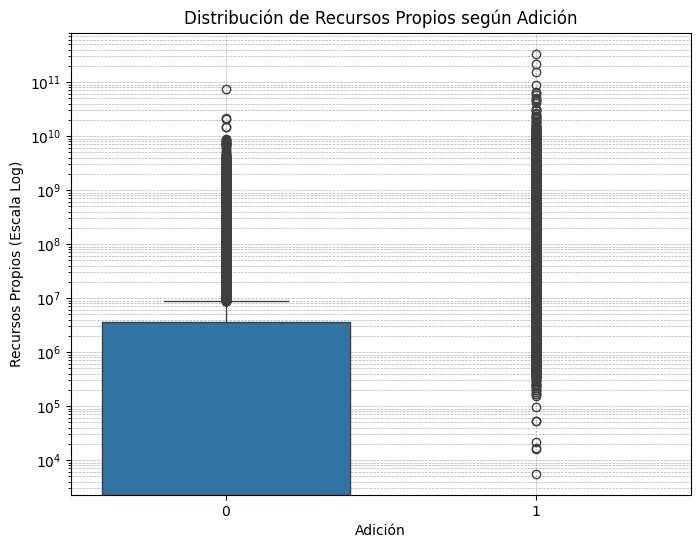

In [206]:

# Asegurar que 'recursos propios' es numérico
df['recursos propios'] = pd.to_numeric(df['recursos propios'], errors='coerce')

# Filtrar NaN
df_valido = df[['recursos propios', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='recursos propios', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Recursos Propios (Escala Log)')
plt.title('Distribución de Recursos Propios según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


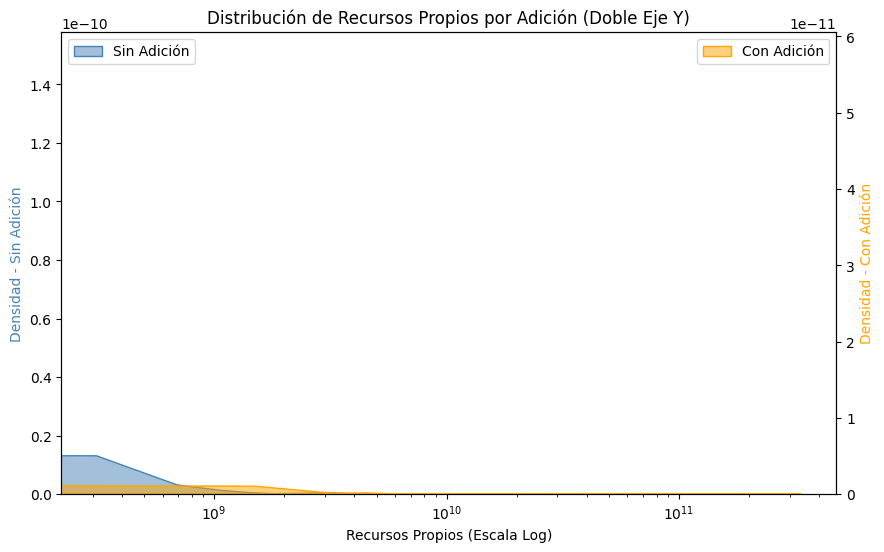

In [207]:

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['recursos propios'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['recursos propios'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Recursos Propios (Escala Log)')
ax1.set_title('Distribución de Recursos Propios por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable codigo entidad

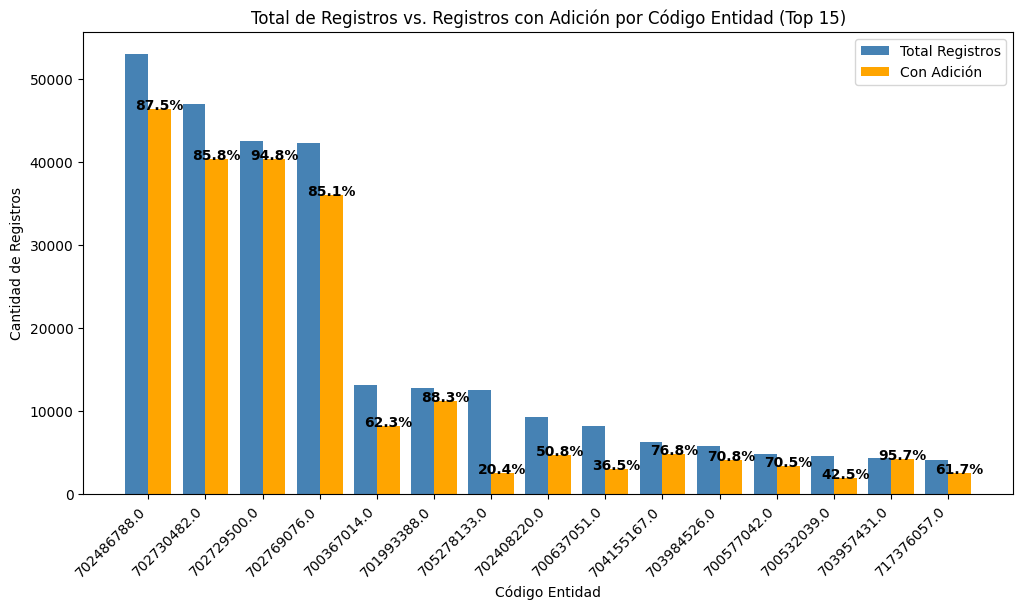

In [208]:
# Contar total de registros por código entidad
total_por_codigo = df['codigo entidad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_codigo = df[df['Adicion'] == 1]['codigo entidad'].value_counts()

# Unir ambas series en un DataFrame
df_codigo = pd.DataFrame({'Total Registros': total_por_codigo, 'Con Adición': adicion_por_codigo}).fillna(0)

# Tomar solo los más frecuentes (ejemplo: top 15)
df_codigo = df_codigo.sort_values('Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_codigo["% Adición"] = (df_codigo["Con Adición"] / df_codigo["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_codigo))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_codigo['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_codigo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_codigo["% Adición"]):
    ax.text(x[i] + width/2, df_codigo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_codigo.index, rotation=45, ha="right")
ax.set_xlabel("Código Entidad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Código Entidad (Top 15)")
ax.legend()

# Mostrar gráfica
plt.show()


Variable duración del contrato

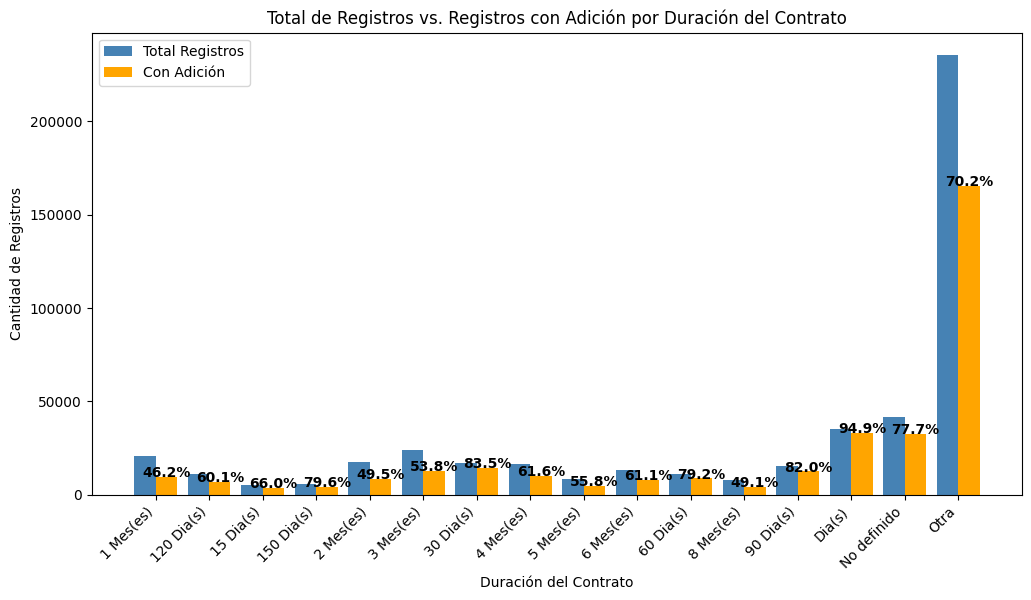

In [209]:
# Contar total de registros por duración del contrato
total_por_duracion = df['duración del contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_duracion = df[df['Adicion'] == 1]['duración del contrato'].value_counts()

# Unir ambas series en un DataFrame
df_duracion = pd.DataFrame({'Total Registros': total_por_duracion, 'Con Adición': adicion_por_duracion}).fillna(0)

# Calcular el porcentaje de adición
df_duracion["% Adición"] = (df_duracion["Con Adición"] / df_duracion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_duracion))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_duracion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_duracion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_duracion["% Adición"]):
    ax.text(x[i] + width/2, df_duracion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_duracion.index, rotation=45, ha="right")
ax.set_xlabel("Duración del Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Duración del Contrato")
ax.legend()

# Mostrar la gráfica
plt.show()



Variable el contrato puede ser prorrogado

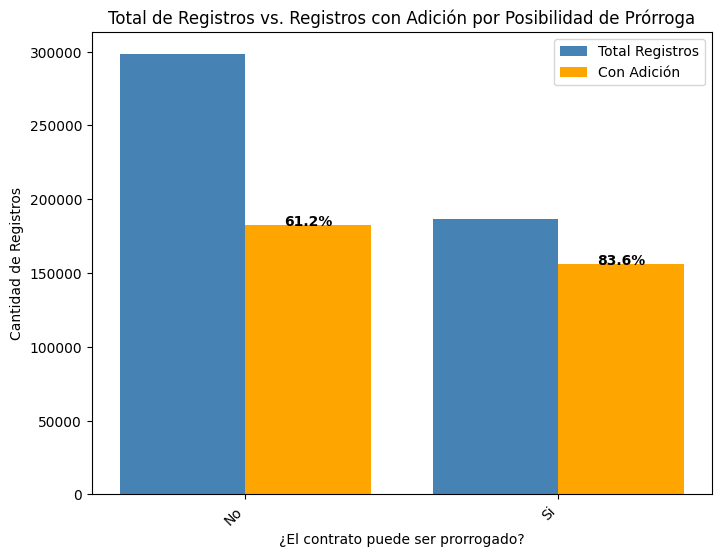

In [210]:
# Contar total de registros por si el contrato puede ser prorrogado
total_por_prorrogado = df['el contrato puede ser prorrogado'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_prorrogado = df[df['Adicion'] == 1]['el contrato puede ser prorrogado'].value_counts()

# Unir ambas series en un DataFrame
df_prorrogado = pd.DataFrame({'Total Registros': total_por_prorrogado, 'Con Adición': adicion_por_prorrogado}).fillna(0)

# Calcular el porcentaje de adición
df_prorrogado["% Adición"] = (df_prorrogado["Con Adición"] / df_prorrogado["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_prorrogado))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, df_prorrogado['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_prorrogado['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_prorrogado["% Adición"]):
    ax.text(x[i] + width/2, df_prorrogado["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_prorrogado.index, rotation=45, ha="right")
ax.set_xlabel("¿El contrato puede ser prorrogado?")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Posibilidad de Prórroga")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable nombre ordenador del gasto

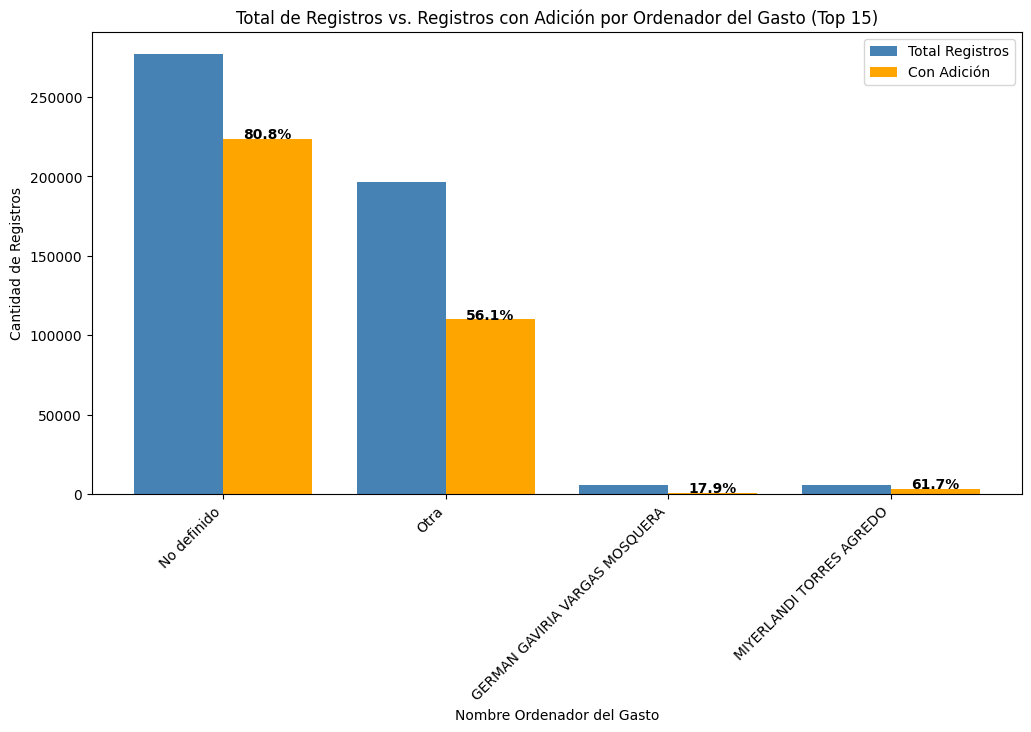

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Contar total de registros por nombre ordenador del gasto
total_por_ordenador = df['nombre ordenador del gasto'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ordenador = df[df['Adicion'] == 1]['nombre ordenador del gasto'].value_counts()

# Unir ambas series en un DataFrame
df_ordenador = pd.DataFrame({'Total Registros': total_por_ordenador, 'Con Adición': adicion_por_ordenador}).fillna(0)

# Filtrar solo los más frecuentes (ejemplo: top 15)
df_ordenador = df_ordenador.sort_values('Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_ordenador["% Adición"] = (df_ordenador["Con Adición"] / df_ordenador["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_ordenador))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_ordenador['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_ordenador['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_ordenador["% Adición"]):
    ax.text(x[i] + width/2, df_ordenador["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_ordenador.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Ordenador del Gasto")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Ordenador del Gasto (Top 15)")
ax.legend()

# Mostrar gráfica
plt.show()


In [212]:
df=df.drop("nombre ordenador del gasto",axis=1)

In [213]:
df["Adicion"].value_counts()

Adicion
1    338292
0    146228
Name: count, dtype: int64

In [214]:
print(list(df.columns))

['nombre entidad', 'nit entidad', 'departamento', 'ciudad', 'orden', 'rama', 'entidad centralizada', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'condiciones de entrega', 'es pyme', 'habilita pago adelantado', 'liquidación', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'dias adicionados', 'presupuesto general de la nacion – pgn', 'sistema general de participaciones', 'sistema general de regalías', 'recursos propios (alcaldias_gobernaciones_resguardosindigenas)', 'recursos de credito', 'recursos propios', 'codigo entidad', 'duración del contrato', 'el contrato puede ser prorrogado', 'nombre supervisor', 'nombre ordenador de pago', 'fase', 'fecha de ultima publicación', 'fecha de publicacion (fase selecci

Variable de nombre de supervisor- se debe eliminar 

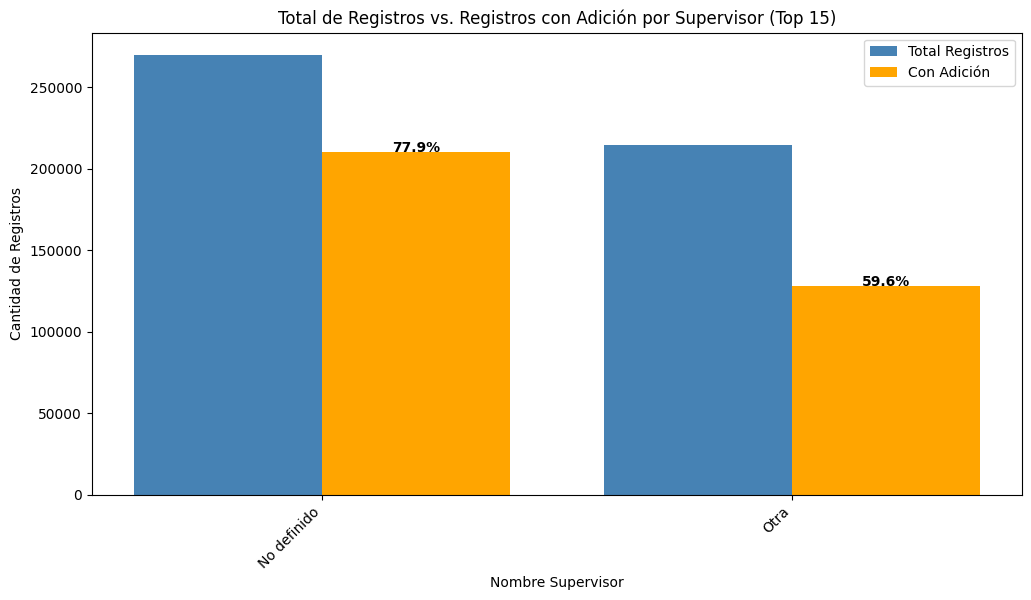

In [215]:
# Contar total de registros por supervisor
total_por_supervisor = df['nombre supervisor'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_supervisor = df[df['Adicion'] == 1]['nombre supervisor'].value_counts()

# Unir ambas series en un DataFrame
df_supervisor = pd.DataFrame({'Total Registros': total_por_supervisor, 'Con Adición': adicion_por_supervisor}).fillna(0)

# Seleccionar solo los más frecuentes (ejemplo: Top 15)
df_supervisor = df_supervisor.sort_values(by='Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_supervisor['% Adición'] = (df_supervisor['Con Adición'] / df_supervisor['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_supervisor))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_supervisor['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_supervisor['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_supervisor['% Adición']):
    ax.text(x[i] + width/2, df_supervisor['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_supervisor.index, rotation=45, ha='right')
ax.set_xlabel('Nombre Supervisor')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Supervisor (Top 15)')
ax.legend()

# Mostrar gráfica
plt.show()


In [216]:
df=df.drop("nombre supervisor",axis=1)

Variable nombre ordenador de pago

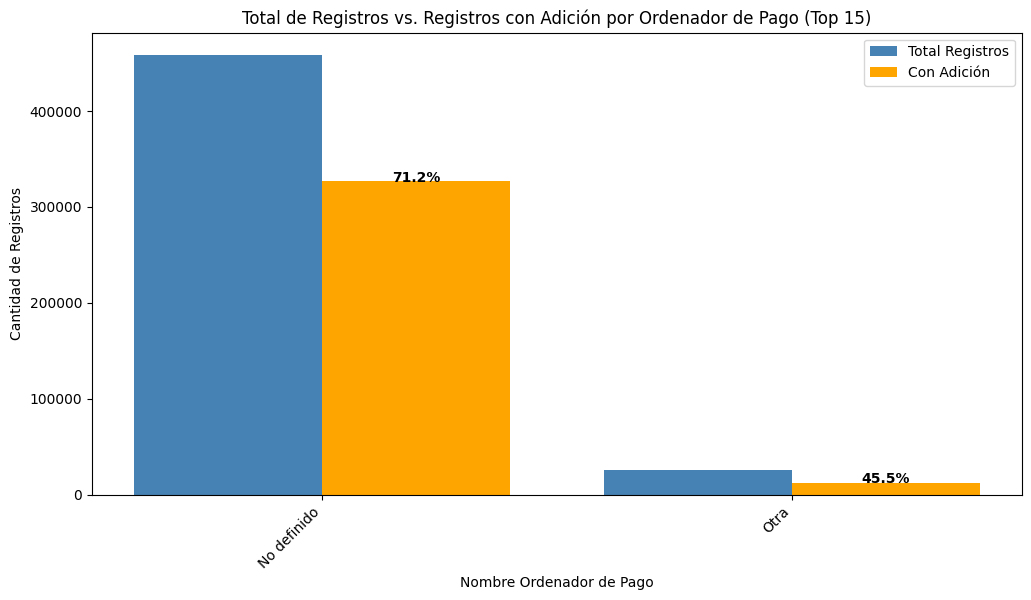

In [217]:
# Contar total de registros por nombre ordenador de pago
total_por_ordenador = df['nombre ordenador de pago'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ordenador = df[df['Adicion'] == 1]['nombre ordenador de pago'].value_counts()

# Unir ambas series en un DataFrame
df_ordenador = pd.DataFrame({'Total Registros': total_por_ordenador, 'Con Adición': adicion_por_ordenador}).fillna(0)

# Seleccionar solo los más frecuentes (ejemplo: Top 15)
df_ordenador = df_ordenador.sort_values(by='Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_ordenador['% Adición'] = (df_ordenador['Con Adición'] / df_ordenador['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_ordenador))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_ordenador['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_ordenador['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_ordenador['% Adición']):
    ax.text(x[i] + width/2, df_ordenador['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_ordenador.index, rotation=45, ha='right')
ax.set_xlabel('Nombre Ordenador de Pago')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Ordenador de Pago (Top 15)')
ax.legend()

# Mostrar gráfica
plt.show()


In [218]:
df=df.drop("nombre ordenador de pago",axis=1)

Variable fase

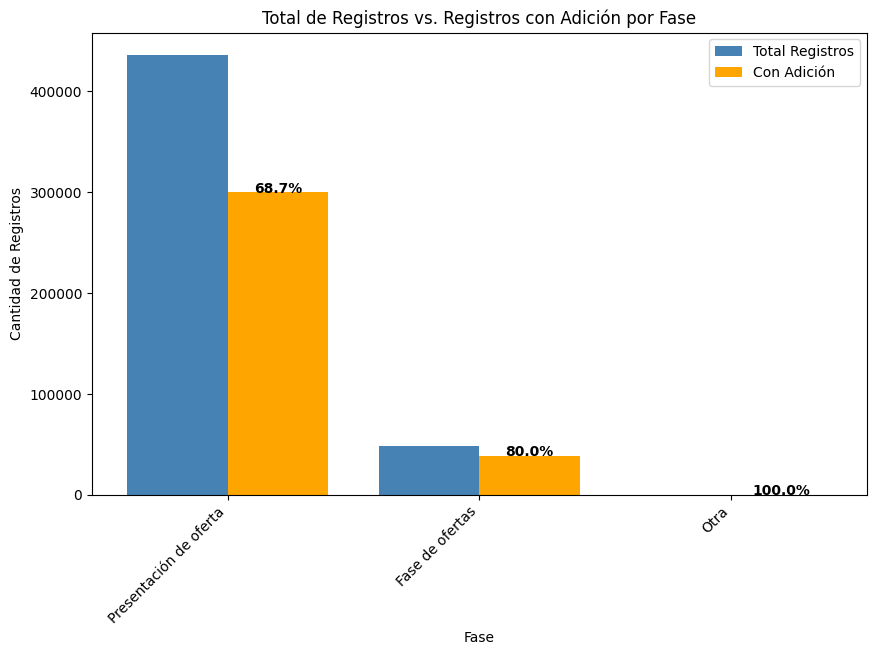

In [219]:
# Contar total de registros por fase
total_por_fase = df['fase'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_fase = df[df['Adicion'] == 1]['fase'].value_counts()

# Unir ambas series en un DataFrame
df_fase = pd.DataFrame({'Total Registros': total_por_fase, 'Con Adición': adicion_por_fase}).fillna(0)

# Calcular el porcentaje de adición
df_fase['% Adición'] = (df_fase['Con Adición'] / df_fase['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_fase))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_fase['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_fase['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje sobre las barras
for i, v in enumerate(df_fase['% Adición']):
    ax.text(x[i] + width/2, df_fase['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_fase.index, rotation=45, ha='right')
ax.set_xlabel('Fase')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Fase')
ax.legend()

# Mostrar gráfica
plt.show()


Variable fecha de ultima publicación

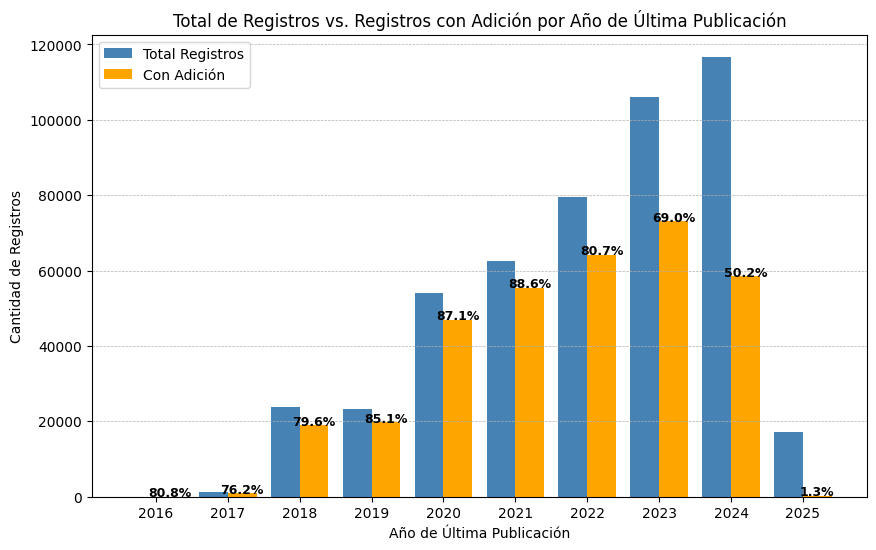

In [220]:
# Convertir a datetime
df['fecha de ultima publicación'] = pd.to_datetime(df['fecha de ultima publicación'], errors='coerce')

# Extraer año
df['año_publicacion'] = df['fecha de ultima publicación'].dt.year

# Contar total por año
total_por_año = df['año_publicacion'].value_counts().sort_index()

# Contar adiciones por año
adicion_por_año = df[df['Adicion'] == 1]['año_publicacion'].value_counts().sort_index()

# Crear DataFrame
df_año = pd.DataFrame({'Total Registros': total_por_año, 'Con Adición': adicion_por_año}).fillna(0)

# Calcular el porcentaje de adición
df_año['% Adición'] = (df_año['Con Adición'] / df_año['Total Registros']) * 100

# Gráfica
fig, ax = plt.subplots(figsize=(10, 6))
x = df_año.index

ax.bar(x - 0.2, df_año['Total Registros'], width=0.4, label='Total Registros', color='steelblue')
ax.bar(x + 0.2, df_año['Con Adición'], width=0.4, label='Con Adición', color='orange')

# Agregar porcentaje de adición sobre las barras de "Con Adición"
for i, v in enumerate(df_año['% Adición']):
    ax.text(x[i] + 0.2, df_año['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=9, color='black', fontweight='bold')

ax.set_xlabel('Año de Última Publicación')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Año de Última Publicación')
ax.legend()

plt.xticks(x)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Variable fecha de publicacion (fase seleccion)

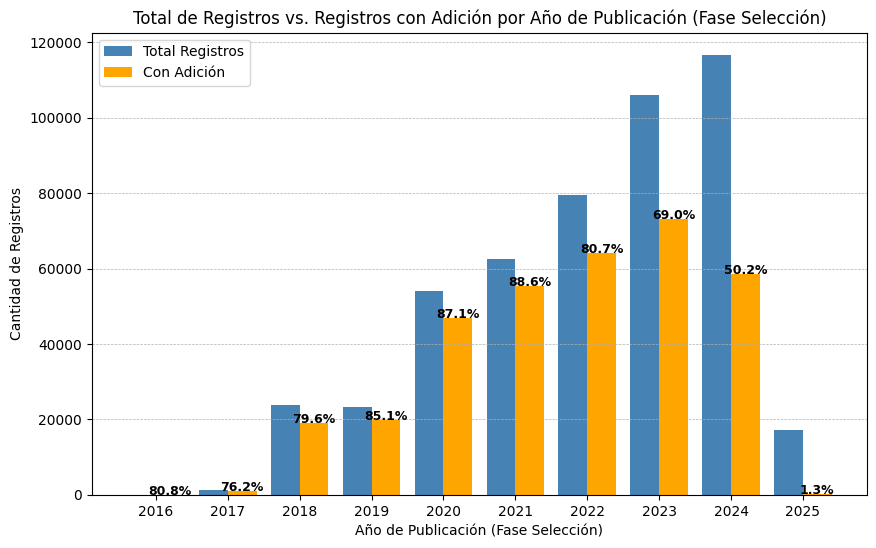

In [221]:
# Convertir a datetime
df['fecha de publicacion (fase seleccion)'] = pd.to_datetime(df['fecha de publicacion (fase seleccion)'], errors='coerce')

# Extraer año
df['año_publicacion_fase'] = df['fecha de publicacion (fase seleccion)'].dt.year

# Contar total por año
total_por_año_fase = df['año_publicacion_fase'].value_counts().sort_index()

# Contar adiciones por año
adicion_por_año_fase = df[df['Adicion'] == 1]['año_publicacion_fase'].value_counts().sort_index()

# Crear DataFrame
df_año_fase = pd.DataFrame({'Total Registros': total_por_año_fase, 'Con Adición': adicion_por_año_fase}).fillna(0)

# Calcular el porcentaje de adición
df_año_fase['% Adición'] = (df_año_fase['Con Adición'] / df_año_fase['Total Registros']) * 100

# Gráfica
fig, ax = plt.subplots(figsize=(10, 6))
x = df_año_fase.index

ax.bar(x - 0.2, df_año_fase['Total Registros'], width=0.4, label='Total Registros', color='steelblue')
ax.bar(x + 0.2, df_año_fase['Con Adición'], width=0.4, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_año_fase['% Adición']):
    ax.text(x[i] + 0.2, df_año_fase['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=9, color='black', fontweight='bold')

ax.set_xlabel('Año de Publicación (Fase Selección)')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Año de Publicación (Fase Selección)')
ax.legend()

plt.xticks(x)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Variable precio base

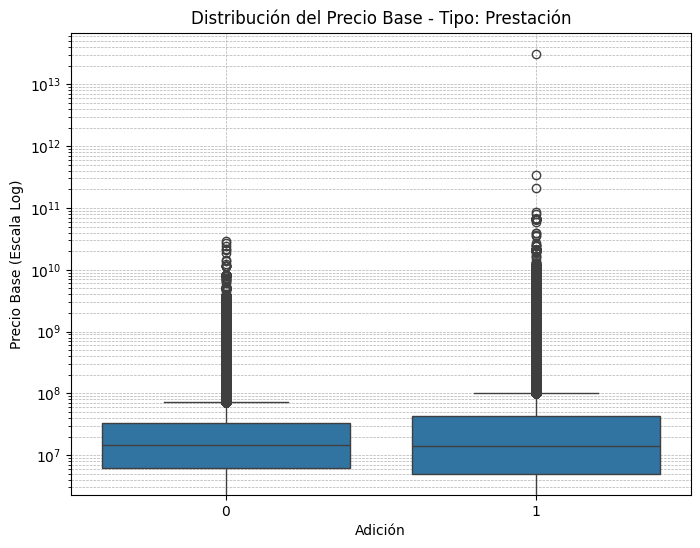

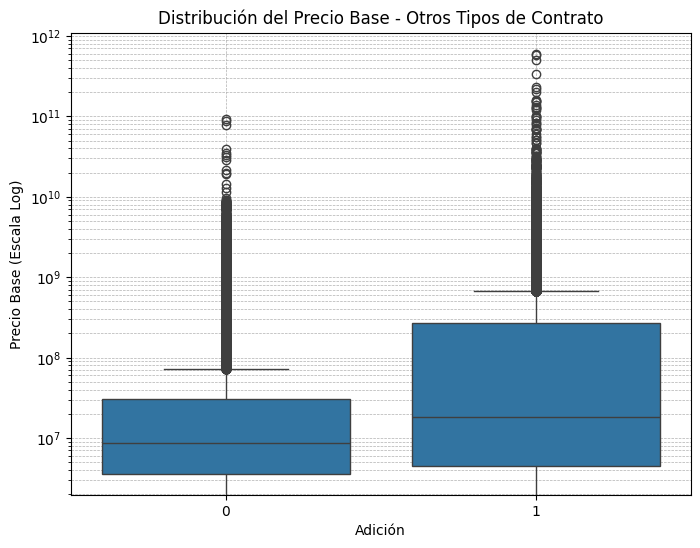

In [229]:
# Asegurar que 'precio base' es numérico
df['precio base'] = pd.to_numeric(df['precio base'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['precio base', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['precio base', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='precio base', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Precio Base (Escala Log)')
plt.title('Distribución del Precio Base - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='precio base', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Precio Base (Escala Log)')
plt.title('Distribución del Precio Base - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


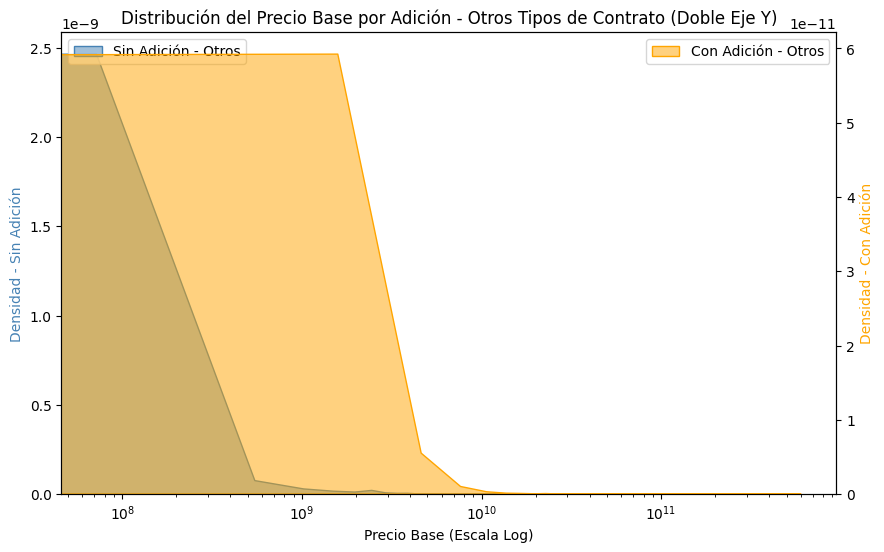

In [230]:

# Verificar que no estén vacíos
sin_adicion = df_otros_valido[df_otros_valido['Adicion'] == 0]['precio base'].dropna()
con_adicion = df_otros_valido[df_otros_valido['Adicion'] == 1]['precio base'].dropna()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición - Solo si hay datos
if not sin_adicion.empty:
    sns.kdeplot(sin_adicion, ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición - Otros')

# KDE Con Adición - Solo si hay datos
if not con_adicion.empty:
    sns.kdeplot(con_adicion, ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición - Otros')

ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Precio Base (Escala Log)')
ax1.set_title('Distribución del Precio Base por Adición - Otros Tipos de Contrato (Doble Eje Y)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Variable duracion_proceso

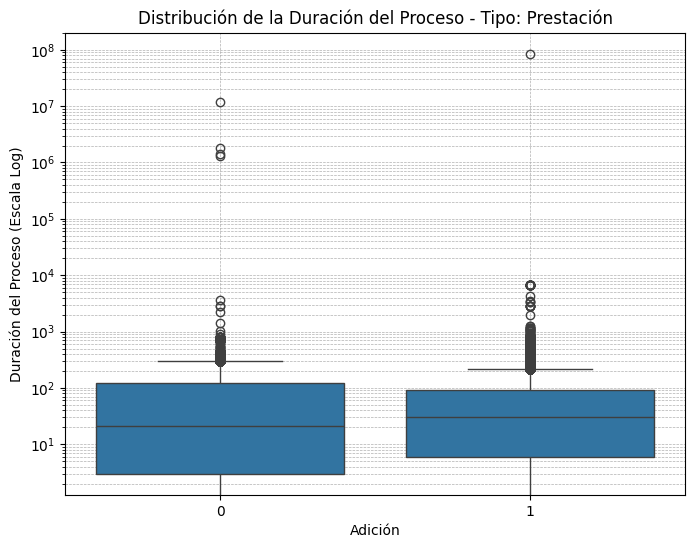

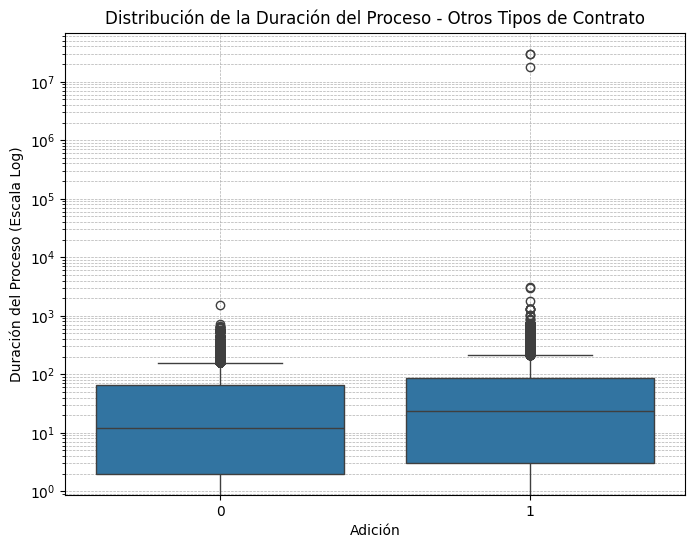

In [226]:

# Asegurar que 'duracion_proceso' es numérico
df['duracion_proceso'] = pd.to_numeric(df['duracion_proceso'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['duracion_proceso', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['duracion_proceso', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='duracion_proceso', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Duración del Proceso (Escala Log)')
plt.title('Distribución de la Duración del Proceso - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='duracion_proceso', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Duración del Proceso (Escala Log)')
plt.title('Distribución de la Duración del Proceso - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


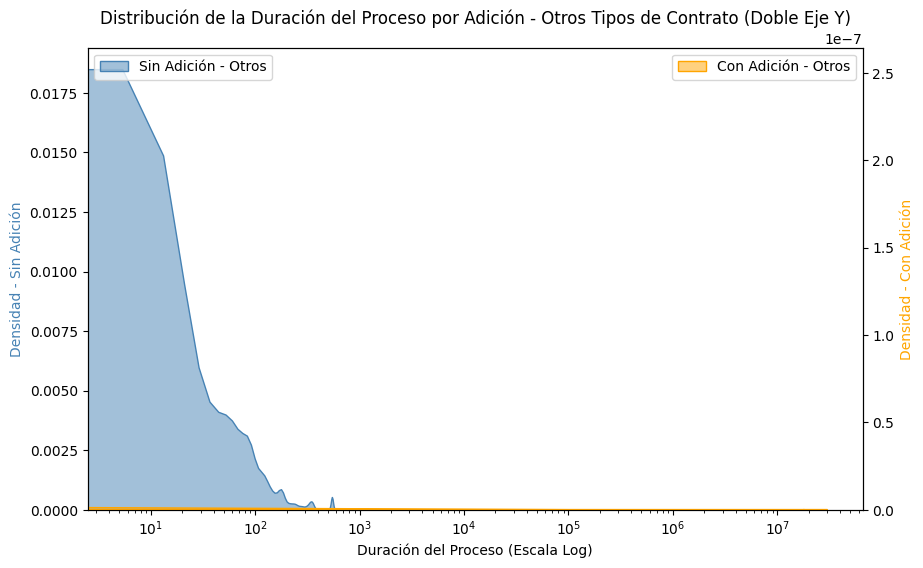

In [227]:


# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición - Otros Tipos
sns.kdeplot(df_otros_valido[df_otros_valido['Adicion'] == 0]['duracion_proceso'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición - Otros')

# KDE Con Adición - Otros Tipos
sns.kdeplot(df_otros_valido[df_otros_valido['Adicion'] == 1]['duracion_proceso'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición - Otros')

ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Duración del Proceso (Escala Log)')
ax1.set_title('Distribución de la Duración del Proceso por Adición - Otros Tipos de Contrato (Doble Eje Y)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



Variable unidad de duracion_proceso

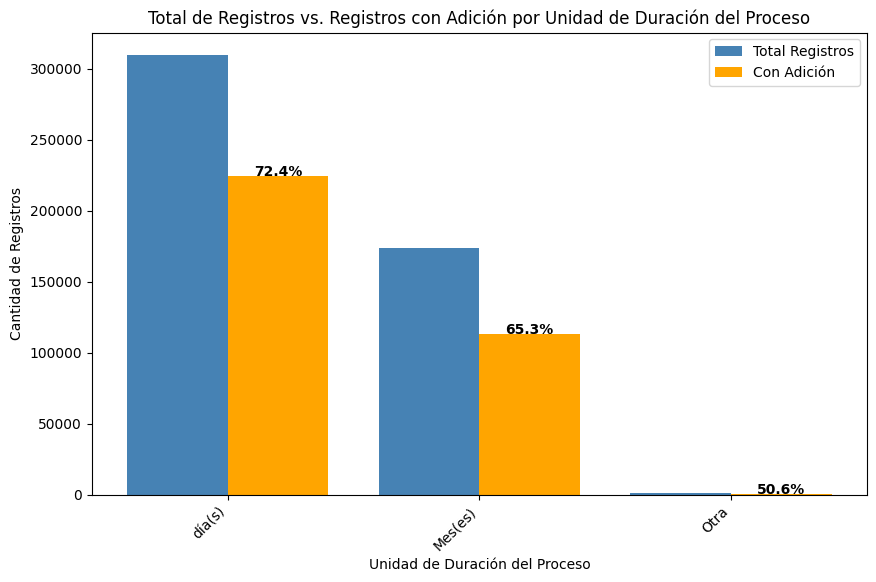

In [228]:
# Contar total de registros por unidad de duración
total_por_unidad = df['unidad de duracion_proceso'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_unidad = df[df['Adicion'] == 1]['unidad de duracion_proceso'].value_counts()

# Unir ambas series en un DataFrame
df_unidad = pd.DataFrame({'Total Registros': total_por_unidad, 'Con Adición': adicion_por_unidad}).fillna(0)

# Calcular el porcentaje de adición
df_unidad['% Adición'] = (df_unidad['Con Adición'] / df_unidad['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_unidad))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, df_unidad['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_unidad['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_unidad['% Adición']):
    ax.text(x[i] + width/2, df_unidad['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_unidad.index, rotation=45, ha='right')
ax.set_xlabel('Unidad de Duración del Proceso')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Unidad de Duración del Proceso')
ax.legend()

# Mostrar gráfica
plt.show()


Variable ciudad de la unidad de contratación- se elimina por ser la misma ciudad

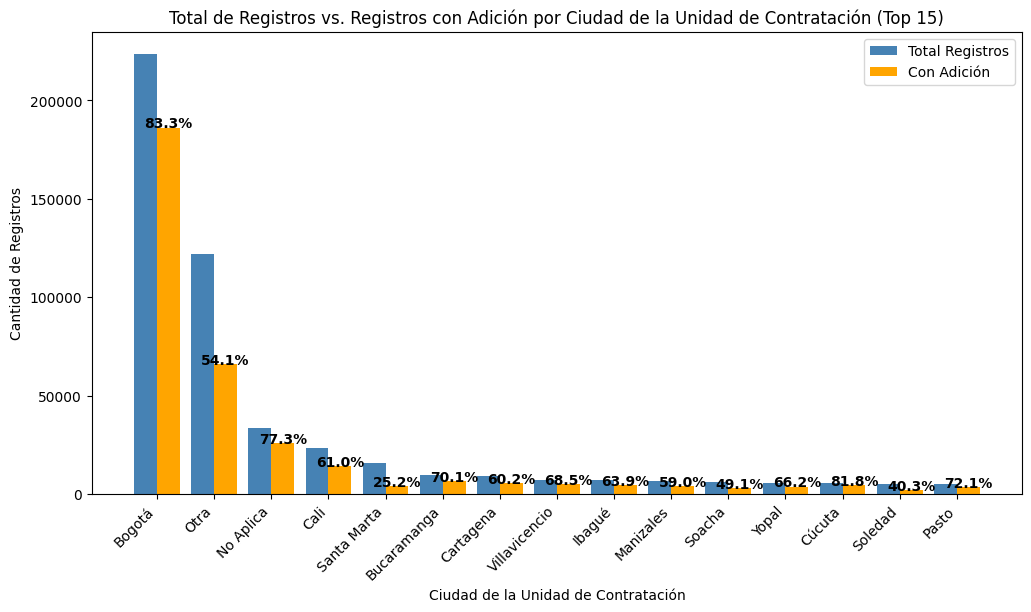

In [ ]:
# Contar total de registros por ciudad de la unidad de contratación
total_por_ciudad_unidad = df['ciudad de la unidad de contratación'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ciudad_unidad = df[df['Adicion'] == 1]['ciudad de la unidad de contratación'].value_counts()

# Unir ambas series en un DataFrame
df_ciudad_unidad = pd.DataFrame({'Total Registros': total_por_ciudad_unidad, 'Con Adición': adicion_por_ciudad_unidad}).fillna(0)

# Seleccionar solo los más frecuentes (Top 15)
df_ciudad_unidad = df_ciudad_unidad.sort_values(by='Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_ciudad_unidad['% Adición'] = (df_ciudad_unidad['Con Adición'] / df_ciudad_unidad['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_ciudad_unidad))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_ciudad_unidad['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_ciudad_unidad['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_ciudad_unidad['% Adición']):
    ax.text(x[i] + width/2, df_ciudad_unidad['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_ciudad_unidad.index, rotation=45, ha='right')
ax.set_xlabel('Ciudad de la Unidad de Contratación')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Ciudad de la Unidad de Contratación (Top 15)')
ax.legend()

# Mostrar gráfica
plt.show()


In [ ]:
df=df.drop("ciudad de la unidad de contratación",axis=1)


Variable nombre de la unidad de contratación

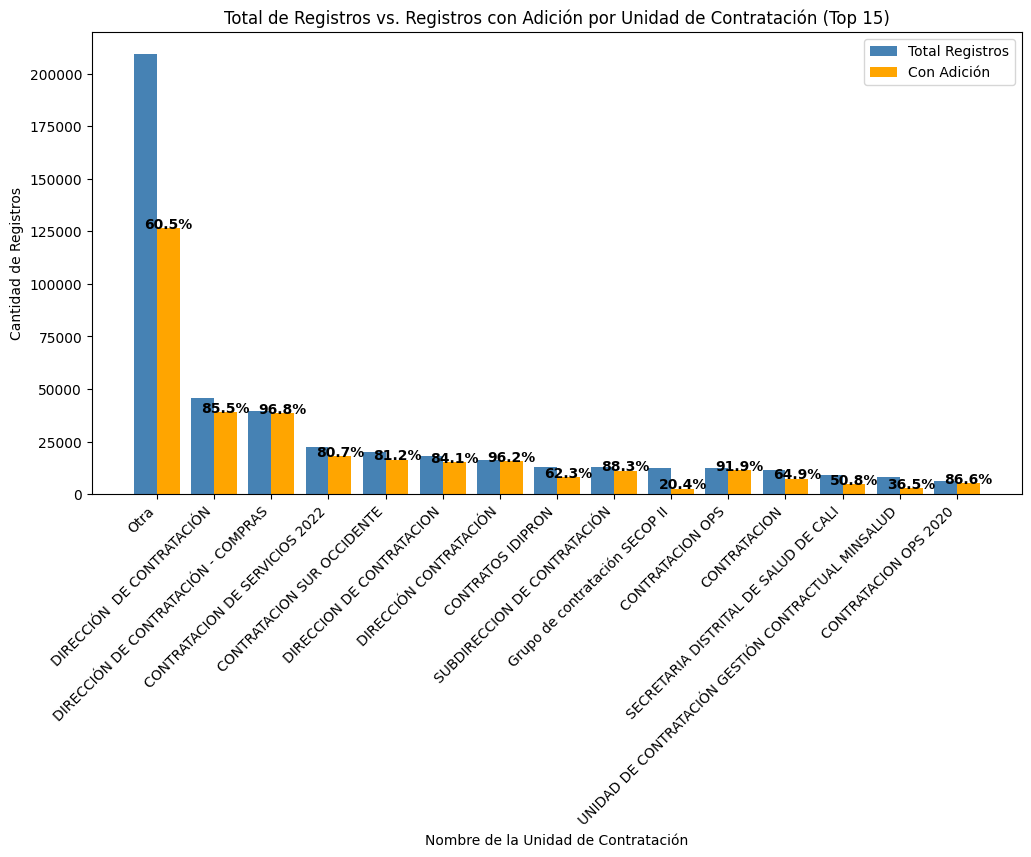

In [ ]:
# Contar total de registros por unidad de contratación
total_por_unidad_contratacion = df['nombre de la unidad de contratación'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_unidad_contratacion = df[df['Adicion'] == 1]['nombre de la unidad de contratación'].value_counts()

# Unir ambas series en un DataFrame
df_unidad_contratacion = pd.DataFrame({'Total Registros': total_por_unidad_contratacion, 'Con Adición': adicion_por_unidad_contratacion}).fillna(0)

# Seleccionar solo los más frecuentes (Top 15)
df_unidad_contratacion = df_unidad_contratacion.sort_values(by='Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_unidad_contratacion['% Adición'] = (df_unidad_contratacion['Con Adición'] / df_unidad_contratacion['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_unidad_contratacion))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_unidad_contratacion['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_unidad_contratacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_unidad_contratacion['% Adición']):
    ax.text(x[i] + width/2, df_unidad_contratacion['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_unidad_contratacion.index, rotation=45, ha='right')
ax.set_xlabel('Nombre de la Unidad de Contratación')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Unidad de Contratación (Top 15)')
ax.legend()

# Mostrar gráfica
plt.show()


Variable visualizaciones del procedimiento- se debe eliminar

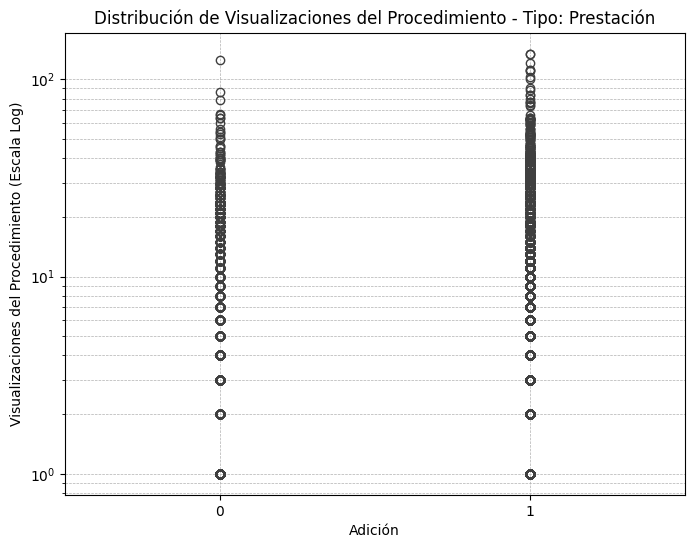

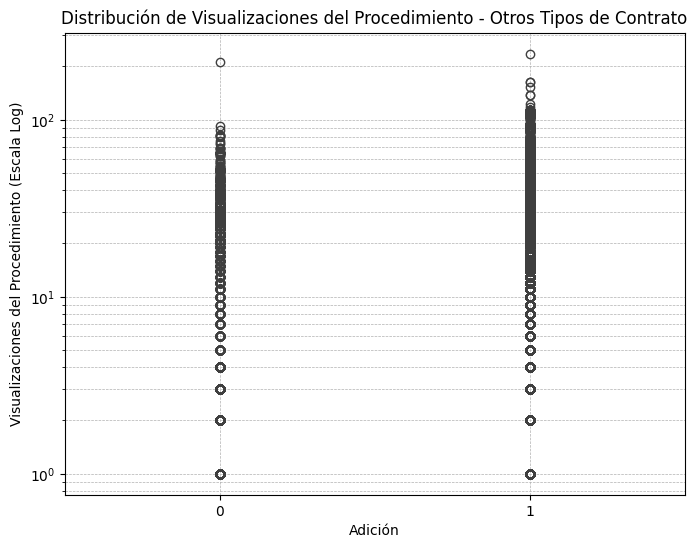

In [ ]:
# Asegurar que 'visualizaciones del procedimiento' es numérico
df['visualizaciones del procedimiento'] = pd.to_numeric(df['visualizaciones del procedimiento'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['visualizaciones del procedimiento', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['visualizaciones del procedimiento', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='visualizaciones del procedimiento', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Visualizaciones del Procedimiento (Escala Log)')
plt.title('Distribución de Visualizaciones del Procedimiento - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='visualizaciones del procedimiento', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Visualizaciones del Procedimiento (Escala Log)')
plt.title('Distribución de Visualizaciones del Procedimiento - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
df=df.drop("visualizaciones del procedimiento",axis=1)

Variable respuestas al procedimiento- Se debe eliminar

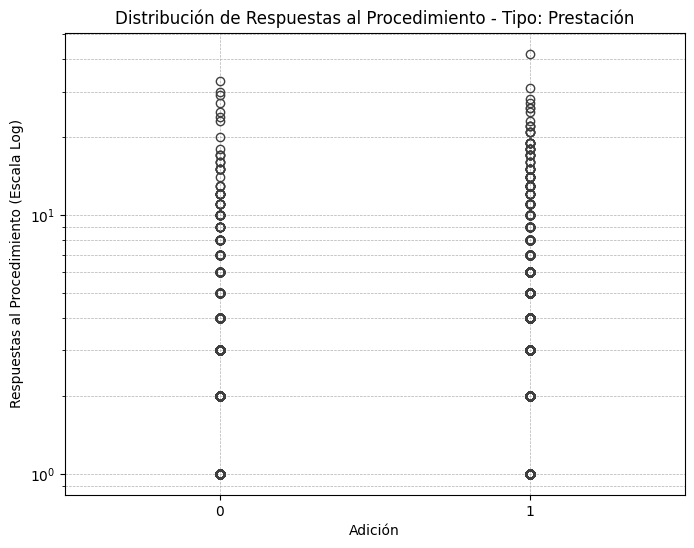

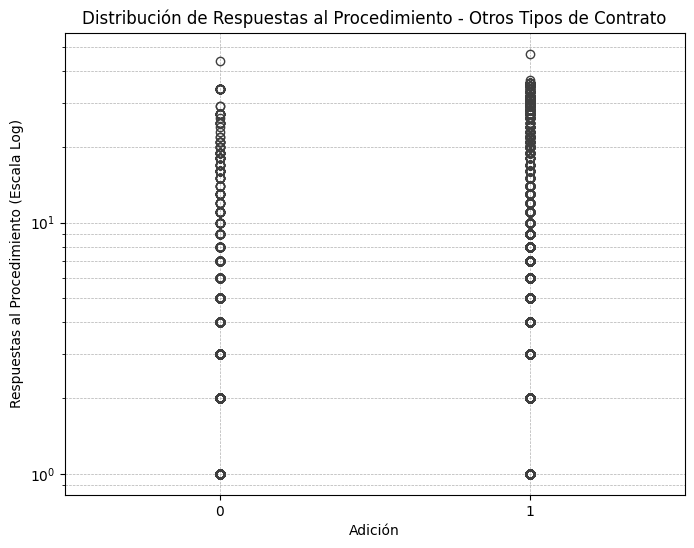

In [ ]:
# Asegurar que 'respuestas al procedimiento' es numérico
df['respuestas al procedimiento'] = pd.to_numeric(df['respuestas al procedimiento'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['respuestas al procedimiento', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['respuestas al procedimiento', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='respuestas al procedimiento', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Respuestas al Procedimiento (Escala Log)')
plt.title('Distribución de Respuestas al Procedimiento - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='respuestas al procedimiento', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Respuestas al Procedimiento (Escala Log)')
plt.title('Distribución de Respuestas al Procedimiento - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
df=df.drop("respuestas al procedimiento",axis=1)

Variable proveedores unicos con respuestas-Se debe eliminar

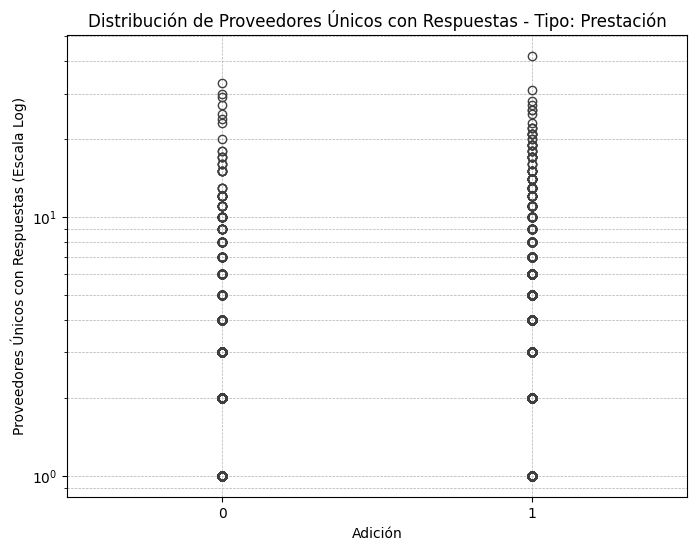

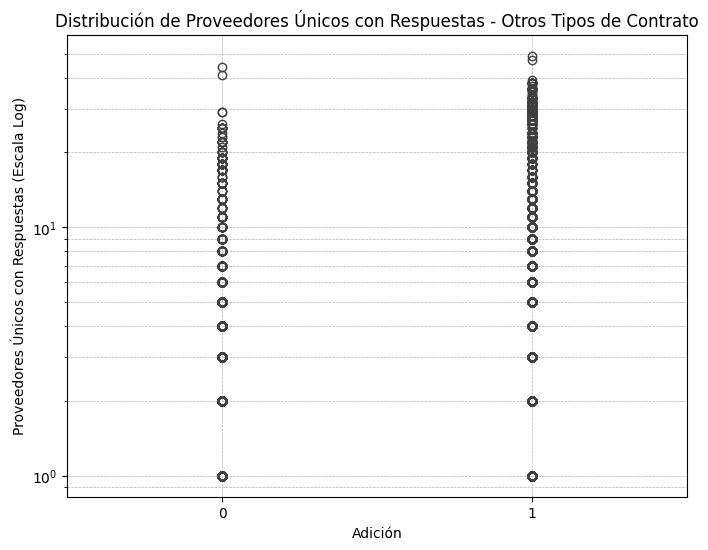

In [231]:
# Asegurar que 'proveedores unicos con respuestas' es numérico
df['proveedores unicos con respuestas'] = pd.to_numeric(df['proveedores unicos con respuestas'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['proveedores unicos con respuestas', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['proveedores unicos con respuestas', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='proveedores unicos con respuestas', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Proveedores Únicos con Respuestas (Escala Log)')
plt.title('Distribución de Proveedores Únicos con Respuestas - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='proveedores unicos con respuestas', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Proveedores Únicos con Respuestas (Escala Log)')
plt.title('Distribución de Proveedores Únicos con Respuestas - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [119]:
df=df.drop("proveedores unicos con respuestas",axis=1)

Variable numero de lotes- se debe eliminar

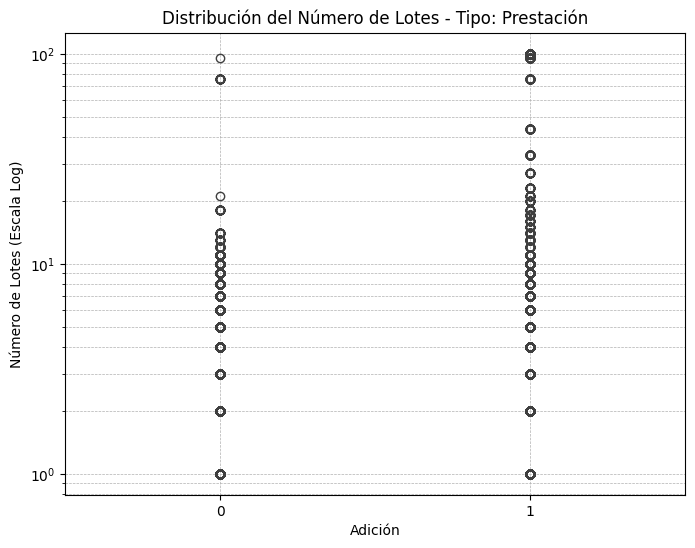

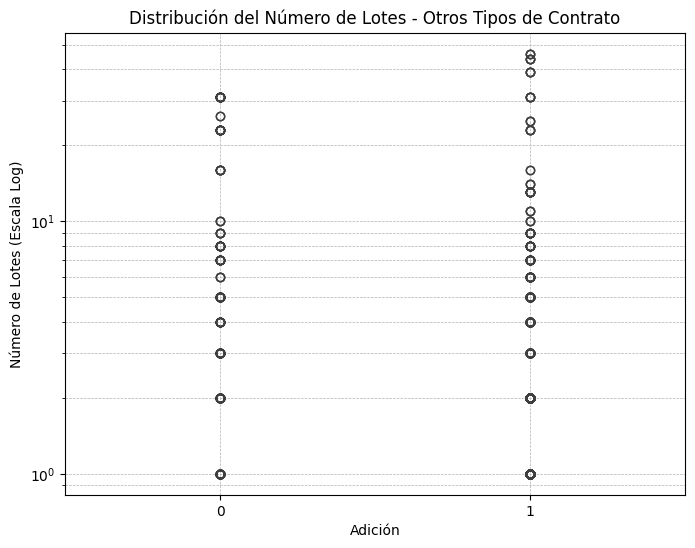

In [233]:
# Asegurar que 'numero de lotes' es numérico
df['numero de lotes'] = pd.to_numeric(df['numero de lotes'], errors='coerce')

# Filtrar por tipo de contrato 'prestación'
df_prestacion = df[df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_prestacion_valido = df_prestacion[['numero de lotes', 'Adicion']].dropna()

# Filtrar por otros tipos de contrato
df_otros = df[~df['tipo de contrato'].str.contains('prestación', case=False, na=False)]
df_otros_valido = df_otros[['numero de lotes', 'Adicion']].dropna()

# Boxplot para 'prestación'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='numero de lotes', data=df_prestacion_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Número de Lotes (Escala Log)')
plt.title('Distribución del Número de Lotes - Tipo: Prestación')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Boxplot para 'otros tipos'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='numero de lotes', data=df_otros_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Número de Lotes (Escala Log)')
plt.title('Distribución del Número de Lotes - Otros Tipos de Contrato')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [235]:
df=df.drop("numero de lotes",axis=1)

Variable id estado del procedimiento- Se debe eliminar

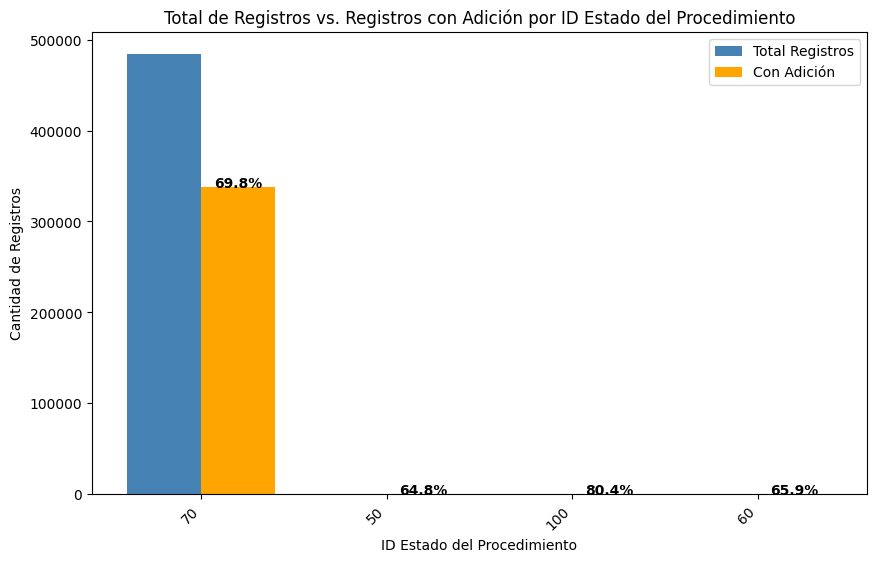

In [236]:
# Contar total de registros por id estado del procedimiento
total_por_estado = df['id estado del procedimiento'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_estado = df[df['Adicion'] == 1]['id estado del procedimiento'].value_counts()

# Unir ambas series en un DataFrame
df_estado = pd.DataFrame({'Total Registros': total_por_estado, 'Con Adición': adicion_por_estado}).fillna(0)

# Calcular el porcentaje de adición
df_estado['% Adición'] = (df_estado['Con Adición'] / df_estado['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_estado))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, df_estado['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_estado['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_estado['% Adición']):
    ax.text(x[i] + width/2, df_estado['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_estado.index, rotation=45, ha='right')
ax.set_xlabel('ID Estado del Procedimiento')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por ID Estado del Procedimiento')
ax.legend()

# Mostrar gráfica
plt.show()


In [237]:
df=df.drop("id estado del procedimiento",axis=1)

Variable adjudicado

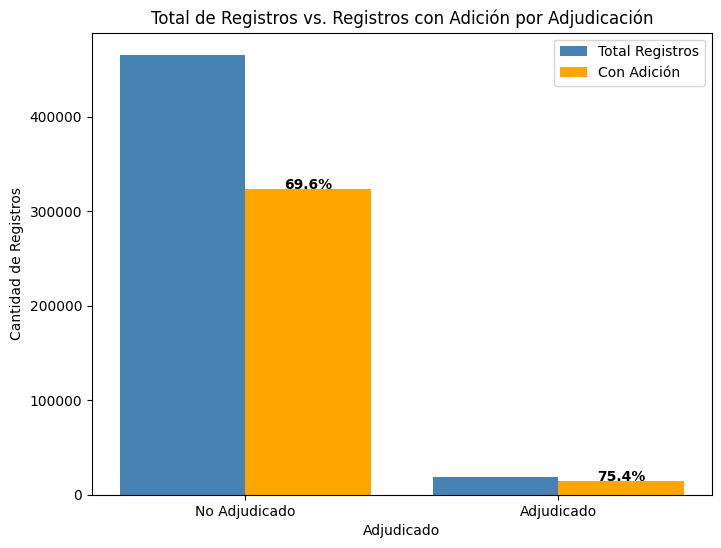

In [239]:
# Contar total de registros por adjudicado
total_por_adjudicado = df['adjudicado'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_adjudicado = df[df['Adicion'] == 1]['adjudicado'].value_counts()

# Unir ambas series en un DataFrame
df_adjudicado = pd.DataFrame({'Total Registros': total_por_adjudicado, 'Con Adición': adicion_por_adjudicado}).fillna(0)

# Calcular el porcentaje de adición
df_adjudicado['% Adición'] = (df_adjudicado['Con Adición'] / df_adjudicado['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_adjudicado))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, df_adjudicado['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_adjudicado['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_adjudicado['% Adición']):
    ax.text(x[i] + width/2, df_adjudicado['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(['No Adjudicado', 'Adjudicado'])
ax.set_xlabel('Adjudicado')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Adjudicación')
ax.legend()

# Mostrar gráfica
plt.show()


Variable id adjudicacion

In [247]:
df=df.drop("id adjudicacion",axis=1)


Variable departamento proveedor

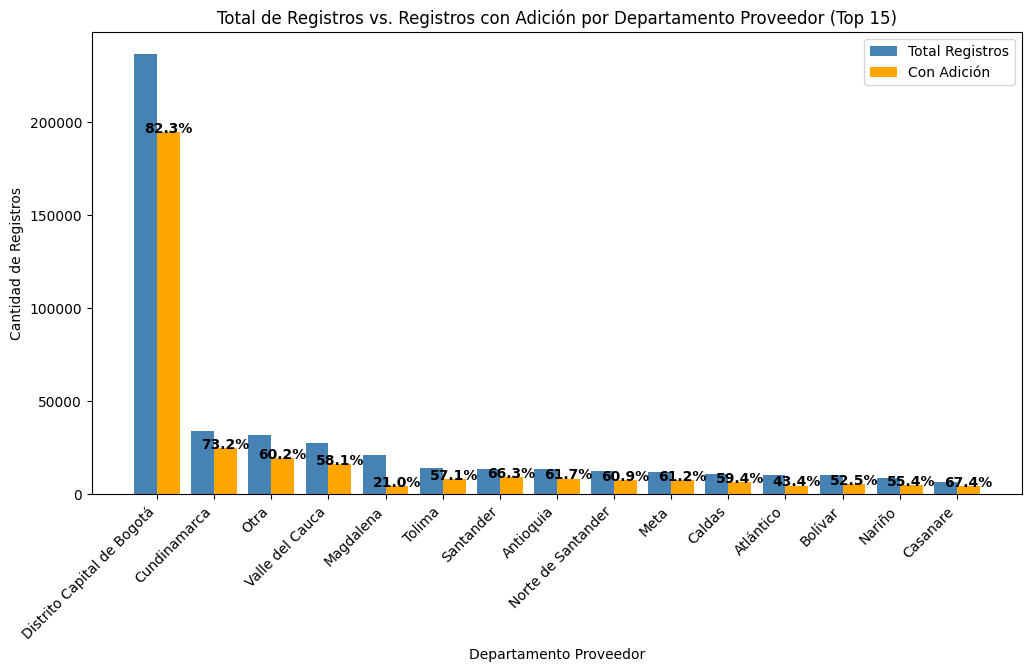

In [243]:
# Contar total de registros por departamento proveedor
total_por_departamento = df['departamento proveedor'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_departamento = df[df['Adicion'] == 1]['departamento proveedor'].value_counts()

# Unir ambas series en un DataFrame
df_departamento = pd.DataFrame({'Total Registros': total_por_departamento, 'Con Adición': adicion_por_departamento}).fillna(0)

# Seleccionar solo los más frecuentes (Top 15)
df_departamento = df_departamento.sort_values(by='Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_departamento['% Adición'] = (df_departamento['Con Adición'] / df_departamento['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_departamento))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_departamento['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_departamento['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_departamento['% Adición']):
    ax.text(x[i] + width/2, df_departamento['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_departamento.index, rotation=45, ha='right')
ax.set_xlabel('Departamento Proveedor')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Departamento Proveedor (Top 15)')
ax.legend()

# Mostrar gráfica
plt.show()


Variable ciudad proveedor

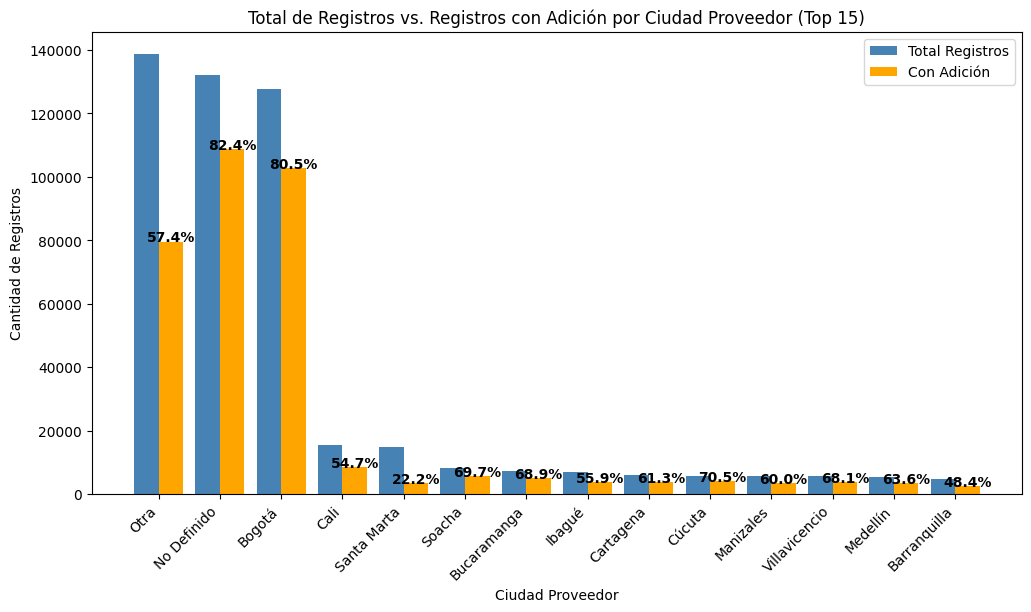

In [245]:
# Contar total de registros por ciudad proveedor
total_por_ciudad = df['ciudad proveedor'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ciudad = df[df['Adicion'] == 1]['ciudad proveedor'].value_counts()

# Unir ambas series en un DataFrame
df_ciudad_proveedor = pd.DataFrame({'Total Registros': total_por_ciudad, 'Con Adición': adicion_por_ciudad}).fillna(0)

# Seleccionar solo los más frecuentes (Top 15)
df_ciudad_proveedor = df_ciudad_proveedor.sort_values(by='Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_ciudad_proveedor['% Adición'] = (df_ciudad_proveedor['Con Adición'] / df_ciudad_proveedor['Total Registros']) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_ciudad_proveedor))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_ciudad_proveedor['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_ciudad_proveedor['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras de "Con Adición"
for i, v in enumerate(df_ciudad_proveedor['% Adición']):
    ax.text(x[i] + width/2, df_ciudad_proveedor['Con Adición'].iloc[i] + 5, f"{v:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_ciudad_proveedor.index, rotation=45, ha='right')
ax.set_xlabel('Ciudad Proveedor')
ax.set_ylabel('Cantidad de Registros')
ax.set_title('Total de Registros vs. Registros con Adición por Ciudad Proveedor (Top 15)')
ax.legend()

# Mostrar gráfica
plt.show()


### División de categoricas y númericas

In [ ]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns


In [ ]:
catcols

In [ ]:
#No cuentan como duplicados debido a que los contratos pueden ser parecido pero se diferencian por la entidad, id contrato, etc que ya fueron eliminados

duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

In [ ]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

In [ ]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

## Selección variables importantes con metodo de xgboost y RF

In [ ]:
# Separar variables independientes y dependiente
X = df.drop('adicion', axis=1)
y = df['adicion']

In [ ]:
# Identificar columnas categóricas y numéricas
catcols = [col for col in X.columns if X[col].dtype == 'object']
numcols = [col for col in X.columns if col not in catcols]

# Codificar las columnas categóricas
label_encoders = {}
for col in catcols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Desconocido').astype(str))
    label_encoders[col] = le



### Random Forest

In [ ]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener las importancias y almacenarlas en un DataFrame
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})
# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_random = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con RF más importantes son:")
print(top_10_features_random)


### XGBOOST

In [ ]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Obtener las importancias de las variables
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_xgboost = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con xgboost más importantes son:")
print(top_10_features_xgboost)

### Listado final y generacion de df

In [ ]:
# Lista de variables importantes que quieres conservar
variables_importantes = ["estado contrato", "anno bpin", "estado bpin","destino gasto","orden","ciudad","tiempo duracion (dias)","obligación ambiental","recursos_propios_alcaldias_gobernaciones_resguardos","justificacion modalidad de contratacion"] 
variables_importantes.append("adicion")
# Eliminar todas las columnas excepto las de la lista 'variables_importantes'
df_importantes = df[variables_importantes]


In [ ]:
df_importantes

## Dummies

In [ ]:
catcols2=[]
for i in catcols:
    if i in variables_importantes:
        catcols2.append(i)

In [ ]:
catcols2

In [ ]:

# Codificación de variables categóricas
df_dummies = pd.get_dummies(df_importantes, columns=catcols2, dtype=int, drop_first=True)

# Identificar las categorías excluidas
excluded_categories = {}
for col in catcols2:
    unique_values = df_importantes[col].unique()
    excluded_categories[col] = unique_values[0]  # La primera categoría es la excluida

# Mostrar las categorías excluidas
print("Categorías excluidas por multicolinealidad:")
for col, category in excluded_categories.items():
    print(f"{col}: {category}")

# Visualizar el DataFrame con variables dummies
df_dummies


In [ ]:


cols = [col for col in df_dummies.columns if col != "adicion"] + ["adicion"]
df_dummies = df_dummies[cols]

# Mostrar el DataFrame con la columna 'adiciones' al final
df_dummies.head()


## Limpieza datos atipicos, etc

In [ ]:
X=df_dummies
var_ret=[]
for i in X.columns:
    if X[i].sum() <6068: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
df_dummies.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


df_dummies.columns

In [ ]:
df_dummies